# Regression project

------
------
1. Imporations
   - Librairies
   - Data

2. Data Preprocessing
   - Conclusions du pretraitement :

3. Statistiques Descriptives
   - Conclusions des statistiques descriptives :

4. Analyse Bivariée :
   - Selection des variables à fortes corrélation pour la régression :

5. RLS
   - Conclusion RLS :
     - Conclusion Cross validation :

6. Régularisation :
   - Lasso
   - Ridge

7. RLM

8. Random forest regressor

9. XGBoost

-----
----

## Imporations 

### Librairies ###

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

### Data ### 

In [3]:

data_path = 'DB_regression.xlsx'

data = pd.read_excel(data_path)

## Data Preprocessing 

In [4]:
data.head()

,Country Name,Country Code,Time,Time Code,Age dependency ratio (% of working-age population) [SP.POP.DPND],"Age dependency ratio, old [SP.POP.DPND.OL]","Age dependency ratio, young [SP.POP.DPND.YG]","Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]","Death rate, crude (per 1,000 people) [SP.DYN.CDRT.IN]","Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]",...,Net migration [SM.POP.NETM],Urban population [SP.URB.TOTL],Urban population growth (annual %) [SP.URB.GROW],Rural population growth (annual %) [SP.RUR.TOTL.ZG],Rural population [SP.RUR.TOTL],"Population, total [SP.POP.TOTL]",Population growth (annual %) [SP.POP.GROW],"Population ages 65 and above, total [SP.POP.65UP.TO]","Population ages 15-64, total [SP.POP.1564.TO]","Mortality rate, infant (per 1,000 live births) [SP.DYN.IMRT.IN]"
0,Morocco,MAR,1960,YR1960,93.386101,5.401622,87.984479,50.975,22.745,7.04,...,-19418,3455253,4.277859,1.91693,8314521,11769774,2.658267,328751,6086153,146.0
1,Morocco,MAR,1961,YR1961,95.525101,5.508818,90.016282,50.317,21.213,7.072,...,-41561,3606271,4.277859,1.91693,8475442,12081713,2.615827,340396,6179111,143.8
2,Morocco,MAR,1962,YR1962,97.435846,5.619480,91.816366,50.087,20.732,7.088,...,-29267,3764224,4.286746,1.929147,8640533,12404757,2.638704,353068,6282930,141.5
3,Morocco,MAR,1963,YR1963,99.112444,5.735102,93.377341,48.847,20.153,7,...,-57523,3925674,4.199633,1.840244,8801012,12726686,2.562102,366571,6391708,139.1
4,Morocco,MAR,1964,YR1964,100.062913,5.849257,94.213656,48.192,19.57,6.969,...,-47413,4089765,4.094945,1.728826,8954489,13044254,2.464668,381376,6520076,136.6


In [5]:
data.sample(10)

,Country Name,Country Code,Time,Time Code,Age dependency ratio (% of working-age population) [SP.POP.DPND],"Age dependency ratio, old [SP.POP.DPND.OL]","Age dependency ratio, young [SP.POP.DPND.YG]","Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]","Death rate, crude (per 1,000 people) [SP.DYN.CDRT.IN]","Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]",...,Net migration [SM.POP.NETM],Urban population [SP.URB.TOTL],Urban population growth (annual %) [SP.URB.GROW],Rural population growth (annual %) [SP.RUR.TOTL.ZG],Rural population [SP.RUR.TOTL],"Population, total [SP.POP.TOTL]",Population growth (annual %) [SP.POP.GROW],"Population ages 65 and above, total [SP.POP.65UP.TO]","Population ages 15-64, total [SP.POP.1564.TO]","Mortality rate, infant (per 1,000 live births) [SP.DYN.IMRT.IN]"
9,Morocco,MAR,1969,YR1969,100.167284,6.233920,93.933364,44.8,16.808,6.72,...,-25803,5050140,4.199745,1.84045,9826842,14876982,2.635112,463322,7432274,123.7
27,Morocco,MAR,1987,YR1987,81.284327,4.954262,76.330065,32.446,8.573,4.538,...,-110291,10759753,3.54823,0.64425,12520182,23279935,1.975968,636210,12841670,71.2
16,Morocco,MAR,1976,YR1976,93.505072,5.676293,87.828779,41.566,13.99,6.139,...,-58073,6819390,4.273954,1.342725,10937126,17756516,2.458324,520871,9176253,107.8
21,Morocco,MAR,1981,YR1981,87.447713,4.941551,82.506163,39.086,11.334,5.652,...,-26896,8471303,4.364972,1.441719,11736957,20208260,2.656761,532736,10780745,90.9
57,Morocco,MAR,2017,YR2017,51.453494,9.588176,41.865318,19.298,5.642,2.451,...,-71807,21994745,2.080754,-0.236741,13533370,35528115,1.191629,2249204,23458102,18.3
19,Morocco,MAR,1979,YR1979,89.691245,5.186160,84.505084,39.642,12.341,5.802,...,-27391,7763286,4.331338,1.401576,11404375,19167661,2.577865,524044,10104663,97.8
60,Morocco,MAR,2020,YR2020,52.074887,10.875293,41.199593,17.889,6.073,2.353,...,-33807,23309111,1.903584,-0.411331,13379661,36688772,1.05316,2623715,24125464,16.1
55,Morocco,MAR,2015,YR2015,51.189767,8.871757,42.318009,20.307,5.705,2.531,...,-81202,21088840,2.166626,-0.148121,13591618,34680458,1.253058,2035036,22938364,20.3
38,Morocco,MAR,1998,YR1998,65.261713,6.777010,58.484704,24.041,6.59,3.009,...,-94306,14640178,2.055011,0.739671,13151647,27791825,1.430409,1139680,16816857,47.4
48,Morocco,MAR,2008,YR2008,52.812839,7.590672,45.222167,21.23,6.018,2.549,...,-78864,17995882,2.285321,-0.03109,13639110,31634992,1.280037,1571405,20701790,30.1


In [6]:
data.tail()

,Country Name,Country Code,Time,Time Code,Age dependency ratio (% of working-age population) [SP.POP.DPND],"Age dependency ratio, old [SP.POP.DPND.OL]","Age dependency ratio, young [SP.POP.DPND.YG]","Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]","Death rate, crude (per 1,000 people) [SP.DYN.CDRT.IN]","Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]",...,Net migration [SM.POP.NETM],Urban population [SP.URB.TOTL],Urban population growth (annual %) [SP.URB.GROW],Rural population growth (annual %) [SP.RUR.TOTL.ZG],Rural population [SP.RUR.TOTL],"Population, total [SP.POP.TOTL]",Population growth (annual %) [SP.POP.GROW],"Population ages 65 and above, total [SP.POP.65UP.TO]","Population ages 15-64, total [SP.POP.1564.TO]","Mortality rate, infant (per 1,000 live births) [SP.DYN.IMRT.IN]"
61,Morocco,MAR,2021,YR2021,52.154787,11.297377,40.857410,17.545,6.17,2.328,...,-46242,23753114,1.886932,-0.420858,13323470,37076584,1.051484,2752908,24367675,15.4
62,Morocco,MAR,2022,YR2022,52.218083,11.751974,40.466109,17.545,6.17,2.328,...,-39998,24196351,1.84882,-0.465299,13261620,37457971,1.023392,2891937,24608096,15.2
63,Morocco,MAR,2023,YR2023,52.236198,12.222227,40.013971,..,..,..,...,-39998,24641815,..,..,13198229,37840044,..,3037974,24856141,14.8
64,Morocco,MAR,2024,YR2024,52.164151,12.679640,39.484511,..,..,..,...,-39998,25083148,..,..,13128311,38211459,..,3184111,25111999,14.9
65,Morocco,MAR,2025,YR2025,52.008640,13.129880,38.878760,16.154,5.944,2.212,...,-39998,25518765,..,..,13052524,38571289,..,3331629,25374405,14.6


In [7]:
# enlever  les 3 dernières lignes

data_edit = data.iloc[:-3]

data_edit.tail()

,Country Name,Country Code,Time,Time Code,Age dependency ratio (% of working-age population) [SP.POP.DPND],"Age dependency ratio, old [SP.POP.DPND.OL]","Age dependency ratio, young [SP.POP.DPND.YG]","Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]","Death rate, crude (per 1,000 people) [SP.DYN.CDRT.IN]","Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]",...,Net migration [SM.POP.NETM],Urban population [SP.URB.TOTL],Urban population growth (annual %) [SP.URB.GROW],Rural population growth (annual %) [SP.RUR.TOTL.ZG],Rural population [SP.RUR.TOTL],"Population, total [SP.POP.TOTL]",Population growth (annual %) [SP.POP.GROW],"Population ages 65 and above, total [SP.POP.65UP.TO]","Population ages 15-64, total [SP.POP.1564.TO]","Mortality rate, infant (per 1,000 live births) [SP.DYN.IMRT.IN]"
58,Morocco,MAR,2018,YR2018,51.686189,10.003394,41.682795,18.813,5.637,2.415,...,-89007,22437808,1.994383,-0.323183,13489703,35927511,1.117897,2369346,23685420,17.5
59,Morocco,MAR,2019,YR2019,51.919106,10.443099,41.476007,18.337,5.658,2.382,...,-91959,22869599,1.906108,-0.407763,13434809,36304408,1.043584,2495608,23897197,16.7
60,Morocco,MAR,2020,YR2020,52.074887,10.875293,41.199593,17.889,6.073,2.353,...,-33807,23309111,1.903584,-0.411331,13379661,36688772,1.05316,2623715,24125464,16.1
61,Morocco,MAR,2021,YR2021,52.154787,11.297377,40.857410,17.545,6.17,2.328,...,-46242,23753114,1.886932,-0.420858,13323470,37076584,1.051484,2752908,24367675,15.4
62,Morocco,MAR,2022,YR2022,52.218083,11.751974,40.466109,17.545,6.17,2.328,...,-39998,24196351,1.84882,-0.465299,13261620,37457971,1.023392,2891937,24608096,15.2


In [8]:
data_edit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Country Name                                                      63 non-null     object 
 1   Country Code                                                      63 non-null     object 
 2   Time                                                              63 non-null     int64  
 3   Time Code                                                         63 non-null     object 
 4   Age dependency ratio (% of working-age population) [SP.POP.DPND]  63 non-null     float64
 5   Age dependency ratio, old [SP.POP.DPND.OL]                        63 non-null     float64
 6   Age dependency ratio, young [SP.POP.DPND.YG]                      63 non-null     float64
 7   Birth rate, crude (per 1,000 people) 

In [9]:
# convertir les colonnes 5 à la fin en float pour pouvoir les utiliser dans le modèle de régression 
for X in data_edit.columns[5:]:
    data_edit[X] = data_edit[X].astype(float)

data_edit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Country Name                                                      63 non-null     object 
 1   Country Code                                                      63 non-null     object 
 2   Time                                                              63 non-null     int64  
 3   Time Code                                                         63 non-null     object 
 4   Age dependency ratio (% of working-age population) [SP.POP.DPND]  63 non-null     float64
 5   Age dependency ratio, old [SP.POP.DPND.OL]                        63 non-null     float64
 6   Age dependency ratio, young [SP.POP.DPND.YG]                      63 non-null     float64
 7   Birth rate, crude (per 1,000 people) 

C:\Users\hp\AppData\Local\Temp\ipykernel_4832\2475354362.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_edit[X] = data_edit[X].astype(float)
C:\Users\hp\AppData\Local\Temp\ipykernel_4832\2475354362.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_edit[X] = data_edit[X].astype(float)
C:\Users\hp\AppData\Local\Temp\ipykernel_4832\2475354362.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [10]:
data_edit.sample(10)

,Country Name,Country Code,Time,Time Code,Age dependency ratio (% of working-age population) [SP.POP.DPND],"Age dependency ratio, old [SP.POP.DPND.OL]","Age dependency ratio, young [SP.POP.DPND.YG]","Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]","Death rate, crude (per 1,000 people) [SP.DYN.CDRT.IN]","Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]",...,Net migration [SM.POP.NETM],Urban population [SP.URB.TOTL],Urban population growth (annual %) [SP.URB.GROW],Rural population growth (annual %) [SP.RUR.TOTL.ZG],Rural population [SP.RUR.TOTL],"Population, total [SP.POP.TOTL]",Population growth (annual %) [SP.POP.GROW],"Population ages 65 and above, total [SP.POP.65UP.TO]","Population ages 15-64, total [SP.POP.1564.TO]","Mortality rate, infant (per 1,000 live births) [SP.DYN.IMRT.IN]"
58,Morocco,MAR,2018,YR2018,51.686189,10.003394,41.682795,18.813,5.637,2.415,...,-89007.0,22437808.0,1.994383,-0.323183,13489703.0,35927511.0,1.117897,2369346.0,23685420.0,17.5
0,Morocco,MAR,1960,YR1960,93.386101,5.401622,87.984479,50.975,22.745,7.040,...,-19418.0,3455253.0,4.277859,1.916930,8314521.0,11769774.0,2.658267,328751.0,6086153.0,146.0
55,Morocco,MAR,2015,YR2015,51.189767,8.871757,42.318009,20.307,5.705,2.531,...,-81202.0,21088840.0,2.166626,-0.148121,13591618.0,34680458.0,1.253058,2035036.0,22938364.0,20.3
22,Morocco,MAR,1982,YR1982,86.416443,4.854825,81.561617,38.541,10.833,5.552,...,-32757.0,8845176.0,4.318789,1.392934,11901589.0,20746765.0,2.629890,540306.0,11129257.0,87.5
1,Morocco,MAR,1961,YR1961,95.525101,5.508818,90.016282,50.317,21.213,7.072,...,-41561.0,3606271.0,4.277859,1.916930,8475442.0,12081713.0,2.615827,340396.0,6179111.0,143.8
38,Morocco,MAR,1998,YR1998,65.261713,6.777010,58.484704,24.041,6.590,3.009,...,-94306.0,14640178.0,2.055011,0.739671,13151647.0,27791825.0,1.430409,1139680.0,16816857.0,47.4
26,Morocco,MAR,1986,YR1986,82.411697,4.861116,77.550581,33.803,8.944,4.746,...,-104360.0,10384666.0,3.760281,0.856786,12439780.0,22824446.0,2.167375,608252.0,12512600.0,74.2
36,Morocco,MAR,1996,YR1996,68.584145,6.508541,62.075604,25.115,6.769,3.219,...,-98110.0,14045468.0,2.129150,0.807326,12953625.0,26999093.0,1.492785,1042356.0,16015203.0,51.1
54,Morocco,MAR,2014,YR2014,51.105229,8.583568,42.521660,20.617,5.741,2.548,...,-72062.0,20636838.0,2.235073,-0.081191,13611765.0,34248603.0,1.308063,1945500.0,22665399.0,21.4
57,Morocco,MAR,2017,YR2017,51.453494,9.588176,41.865318,19.298,5.642,2.451,...,-71807.0,21994745.0,2.080754,-0.236741,13533370.0,35528115.0,1.191629,2249204.0,23458102.0,18.3


In [11]:
# enlever les colonnes qui ne sont pas utiles pour le modèle de régression : 'Country Name', 'Country Code', 'Time Code'

data_final = data_edit.drop(['Country Name', 'Country Code', 'Time Code'], axis=1)

data_final.sample(10)

,Time,Age dependency ratio (% of working-age population) [SP.POP.DPND],"Age dependency ratio, old [SP.POP.DPND.OL]","Age dependency ratio, young [SP.POP.DPND.YG]","Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]","Death rate, crude (per 1,000 people) [SP.DYN.CDRT.IN]","Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]","Life expectancy at birth, total (years) [SP.DYN.LE00.IN]",Net migration [SM.POP.NETM],Urban population [SP.URB.TOTL],Urban population growth (annual %) [SP.URB.GROW],Rural population growth (annual %) [SP.RUR.TOTL.ZG],Rural population [SP.RUR.TOTL],"Population, total [SP.POP.TOTL]",Population growth (annual %) [SP.POP.GROW],"Population ages 65 and above, total [SP.POP.65UP.TO]","Population ages 15-64, total [SP.POP.1564.TO]","Mortality rate, infant (per 1,000 live births) [SP.DYN.IMRT.IN]"
36,1996,68.584145,6.508541,62.075604,25.115,6.769,3.219,65.238,-98110.0,14045468.0,2.129150,0.807326,12953625.0,26999093.0,1.492785,1042356.0,16015203.0,51.1
54,2014,51.105229,8.583568,42.521660,20.617,5.741,2.548,72.538,-72062.0,20636838.0,2.235073,-0.081191,13611765.0,34248603.0,1.308063,1945500.0,22665399.0,21.4
47,2007,53.632654,7.486277,46.146376,21.271,6.068,2.550,69.604,-73718.0,17589282.0,2.306803,-0.010957,13643351.0,31232633.0,1.287722,1521917.0,20329423.0,31.8
35,1995,70.294657,6.346738,63.947920,25.655,6.915,3.330,64.736,-97336.0,13749580.0,2.276654,0.687233,12849468.0,26599048.0,1.505682,991324.0,15619426.0,53.0
61,2021,52.154787,11.297377,40.857410,17.545,6.170,2.328,74.042,-46242.0,23753114.0,1.886932,-0.420858,13323470.0,37076584.0,1.051484,2752908.0,24367675.0,15.4
59,2019,51.919106,10.443099,41.476007,18.337,5.658,2.382,74.270,-91959.0,22869599.0,1.906108,-0.407763,13434809.0,36304408.0,1.043584,2495608.0,23897197.0,16.7
62,2022,52.218083,11.751974,40.466109,17.545,6.170,2.328,74.042,-39998.0,24196351.0,1.848820,-0.465299,13261620.0,37457971.0,1.023392,2891937.0,24608096.0,15.2
29,1989,78.706008,5.216804,73.489203,29.823,7.944,4.139,61.899,-109031.0,11510435.0,3.314661,0.414192,12637669.0,24148104.0,1.786242,704934.0,13512755.0,65.9
21,1981,87.447713,4.941551,82.506163,39.086,11.334,5.652,56.036,-26896.0,8471303.0,4.364972,1.441719,11736957.0,20208260.0,2.656761,532736.0,10780745.0,90.9
26,1986,82.411697,4.861116,77.550581,33.803,8.944,4.746,60.041,-104360.0,10384666.0,3.760281,0.856786,12439780.0,22824446.0,2.167375,608252.0,12512600.0,74.2


In [12]:
# chercher les valeurs manquantes
data_final.isnull().sum()


Time                                                                0
Age dependency ratio (% of working-age population) [SP.POP.DPND]    0
Age dependency ratio, old [SP.POP.DPND.OL]                          0
Age dependency ratio, young [SP.POP.DPND.YG]                        0
Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]               0
Death rate, crude (per 1,000 people) [SP.DYN.CDRT.IN]               0
Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]           0
Life expectancy at birth, total (years) [SP.DYN.LE00.IN]            0
Net migration [SM.POP.NETM]                                         0
Urban population [SP.URB.TOTL]                                      0
Urban population growth (annual %) [SP.URB.GROW]                    0
Rural population growth (annual %) [SP.RUR.TOTL.ZG]                 0
Rural population [SP.RUR.TOTL]                                      0
Population, total [SP.POP.TOTL]                                     0
Population growth (a

In [13]:
data_final.shape

(63, 18)

In [14]:
data_final.columns

Index(['Time',
       'Age dependency ratio (% of working-age population) [SP.POP.DPND]',
       'Age dependency ratio, old [SP.POP.DPND.OL]',
       'Age dependency ratio, young [SP.POP.DPND.YG]',
       'Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]',
       'Death rate, crude (per 1,000 people) [SP.DYN.CDRT.IN]',
       'Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]',
       'Life expectancy at birth, total (years) [SP.DYN.LE00.IN]',
       'Net migration [SM.POP.NETM]', 'Urban population [SP.URB.TOTL]',
       'Urban population growth (annual %) [SP.URB.GROW]',
       'Rural population growth (annual %) [SP.RUR.TOTL.ZG]',
       'Rural population [SP.RUR.TOTL]', 'Population, total [SP.POP.TOTL]',
       'Population growth (annual %) [SP.POP.GROW]',
       'Population ages 65 and above, total [SP.POP.65UP.TO]',
       'Population ages 15-64, total [SP.POP.1564.TO]',
       'Mortality rate, infant (per 1,000 live births) [SP.DYN.IMRT.IN]'],
      dtype='object')

In [15]:
# changement des noms long des colonnes en des noms plus courts significatifs
data_final.columns = ['Year', 
                    'ADR',
                    'ADR_old',
                    'ADR_young',
                    'Birth_rate',
                    'Death_rate',
                    'Fertility_rate',
                    'Life_expectancy',
                    'Net_migration',
                    'Urban_population',
                    'Urban_population_growth',
                    'Rural_population_growth',
                    'Rural_population',
                    'Population',
                    'Population_growth',
                    'Population[age>65]',
                    'Population[15<age<64]',
                    'Mortality_rate_infant',
]

In [16]:
data_final.columns

Index(['Year', 'ADR', 'ADR_old', 'ADR_young', 'Birth_rate', 'Death_rate',
       'Fertility_rate', 'Life_expectancy', 'Net_migration',
       'Urban_population', 'Urban_population_growth',
       'Rural_population_growth', 'Rural_population', 'Population',
       'Population_growth', 'Population[age>65]', 'Population[15<age<64]',
       'Mortality_rate_infant'],
      dtype='object')

### Conclusions du pretraitement

    - Pas de valeurs manquantes 
    - toutes les valeurs sont convertient en des valeurs numériques 
    - 63 observations 
    - 17 indicateurs démographique 
    - nomenclature adéquate et significatif
    - variable cible : 'Fertility Rate '

## Statistiques Descriptives 

In [17]:
df=data_final.iloc[:,1:]

df.sample(10)

,ADR,ADR_old,ADR_young,Birth_rate,Death_rate,Fertility_rate,Life_expectancy,Net_migration,Urban_population,Urban_population_growth,Rural_population_growth,Rural_population,Population,Population_growth,Population[age>65],Population[15<age<64],Mortality_rate_infant
9,100.167284,6.233920,93.933364,44.800,16.808,6.720,48.315,-25803.0,5050140.0,4.199745,1.840450,9826842.0,14876982.0,2.635112,463322.0,7432274.0,123.7
58,51.686189,10.003394,41.682795,18.813,5.637,2.415,73.986,-89007.0,22437808.0,1.994383,-0.323183,13489703.0,35927511.0,1.117897,2369346.0,23685420.0,17.5
31,75.983631,5.559559,70.424073,29.092,7.530,3.937,62.946,-130743.0,12273397.0,3.173107,0.267253,12714686.0,24988083.0,1.683972,789407.0,14199095.0,61.3
10,99.550154,6.233545,93.316608,44.503,16.387,6.675,48.807,-26172.0,5266138.0,4.188130,1.828843,10008213.0,15274351.0,2.635983,477140.0,7654392.0,121.5
33,73.360240,5.968240,67.392000,27.209,7.189,3.612,63.872,-121197.0,13050229.0,3.030195,0.130096,12756548.0,25806777.0,1.586134,888445.0,14886215.0,57.1
42,59.468812,7.121768,52.347045,21.984,6.318,2.670,67.547,-91645.0,15820051.0,1.886076,0.566349,13481766.0,29301817.0,1.276706,1308599.0,18374638.0,40.6
26,82.411697,4.861116,77.550581,33.803,8.944,4.746,60.041,-104360.0,10384666.0,3.760281,0.856786,12439780.0,22824446.0,2.167375,608252.0,12512600.0,74.2
24,84.490523,4.781439,79.709084,36.064,9.846,5.154,58.490,-51472.0,9613344.0,4.097037,1.186857,12203927.0,21817271.0,2.458745,565438.0,11825686.0,80.7
13,96.942171,6.071085,90.871087,43.259,15.304,6.465,50.171,-51797.0,5993751.0,4.377176,1.452188,10495701.0,16489452.0,2.505522,508316.0,8372738.0,115.5
2,97.435846,5.619480,91.816366,50.087,20.732,7.088,44.297,-29267.0,3764224.0,4.286746,1.929147,8640533.0,12404757.0,2.638704,353068.0,6282930.0,141.5


In [18]:
# les statistiques descriptives des données
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ADR,63.0,7.494662e+01,1.869572e+01,5.110523e+01,5.411814e+01,7.598363e+01,9.344559e+01,1.007218e+02
ADR_old,63.0,6.732500e+00,1.688843e+00,4.781439e+00,5.534682e+00,6.197075e+00,7.435284e+00,1.175197e+01
ADR_young,63.0,6.821412e+01,1.999329e+01,4.046611e+01,4.668286e+01,7.042407e+01,8.790663e+01,9.460131e+01
Birth_rate,63.0,3.158754e+01,1.086598e+01,1.754500e+01,2.140650e+01,2.909200e+01,4.191400e+01,5.097500e+01
Death_rate,63.0,1.023521e+01,5.091669e+00,5.637000e+00,6.170000e+00,7.530000e+00,1.423900e+01,2.274500e+01
Fertility_rate,63.0,4.365317e+00,1.785232e+00,2.328000e+00,2.596000e+00,3.937000e+00,6.205000e+00,7.088000e+00
Life_expectancy,63.0,6.087797e+01,9.906258e+00,4.201700e+01,5.159000e+01,6.294600e+01,6.936600e+01,7.427000e+01
Net_migration,63.0,-6.565043e+04,3.063638e+04,-1.307430e+05,-9.165450e+04,-6.513600e+04,-3.839450e+04,-1.764400e+04
Urban_population,63.0,1.248416e+07,6.286809e+06,3.455253e+06,6.676732e+06,1.227340e+07,1.738873e+07,2.419635e+07
Urban_population_growth,63.0,3.157277e+00,1.018385e+00,1.823103e+00,2.147888e+00,3.173107e+00,4.235305e+00,4.421123e+00


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

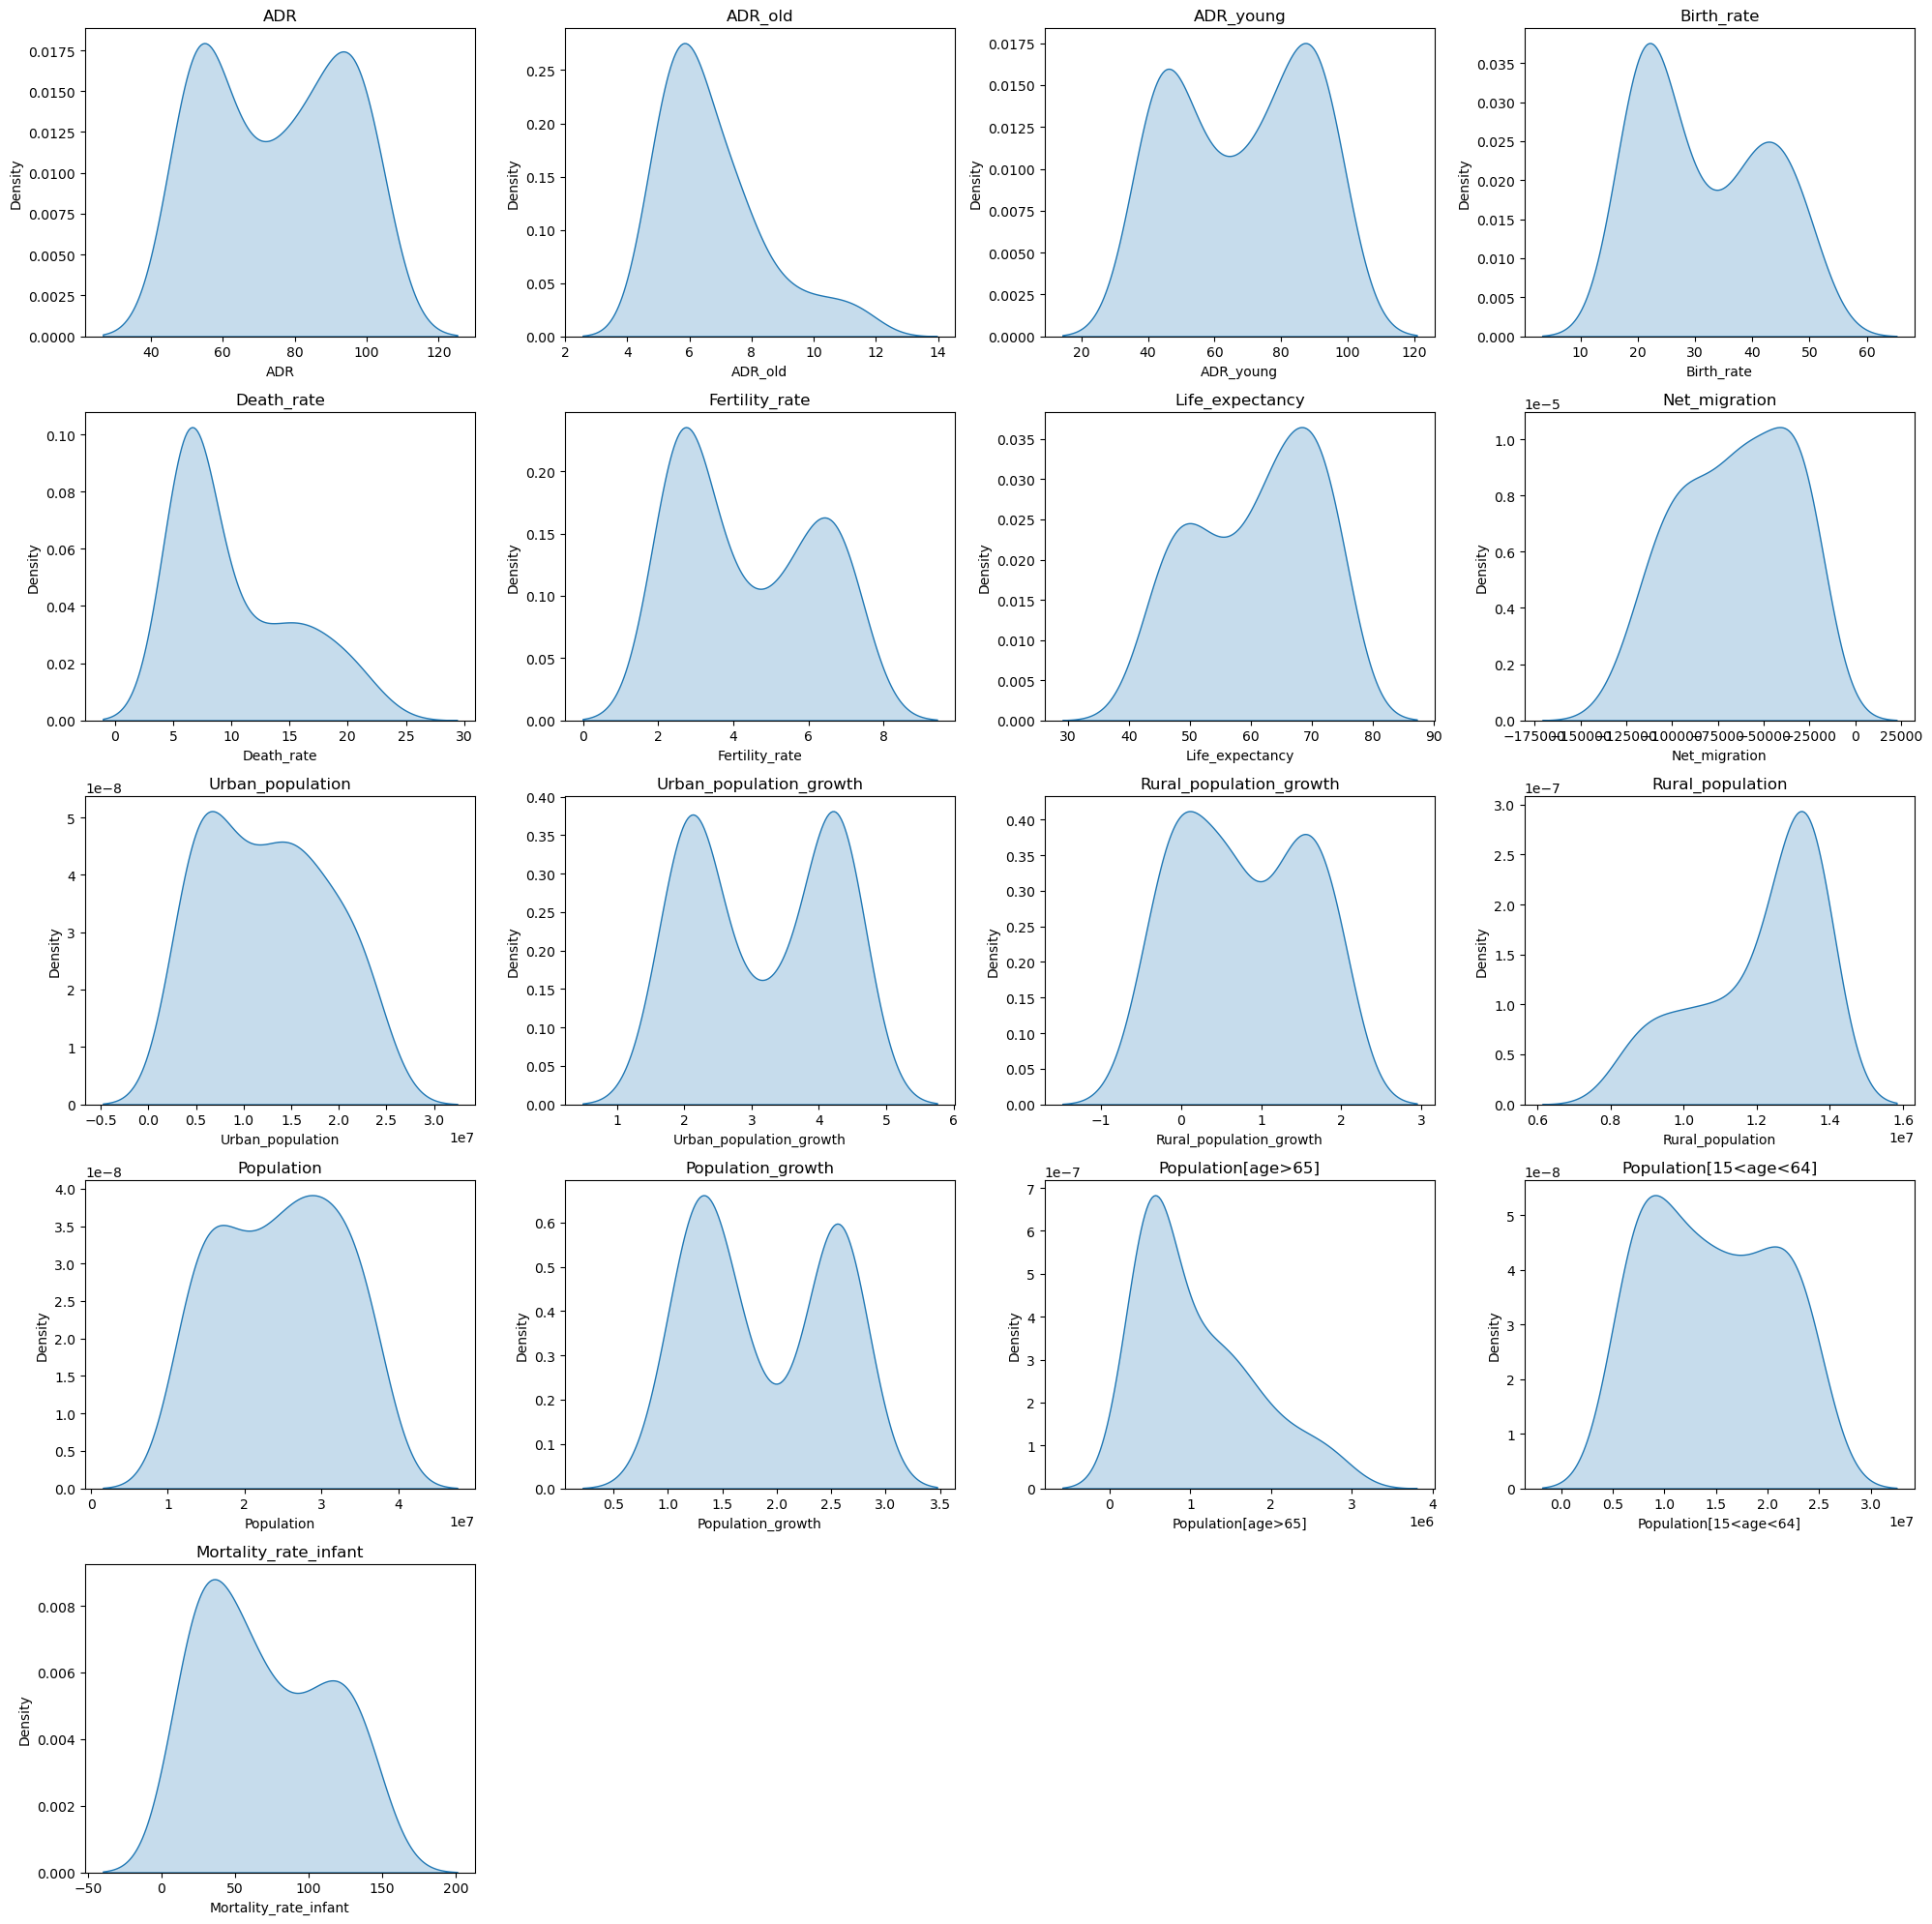

In [19]:
# visualiser kde pour chaque variable uniquement
plt.figure(figsize=(20, 20))
for i, column in enumerate(df.columns, 1):
    plt.subplot(5, 4, i)
    sns.kdeplot(df[column], fill=True)
    plt.title(column)
plt.tight_layout()
plt.show()

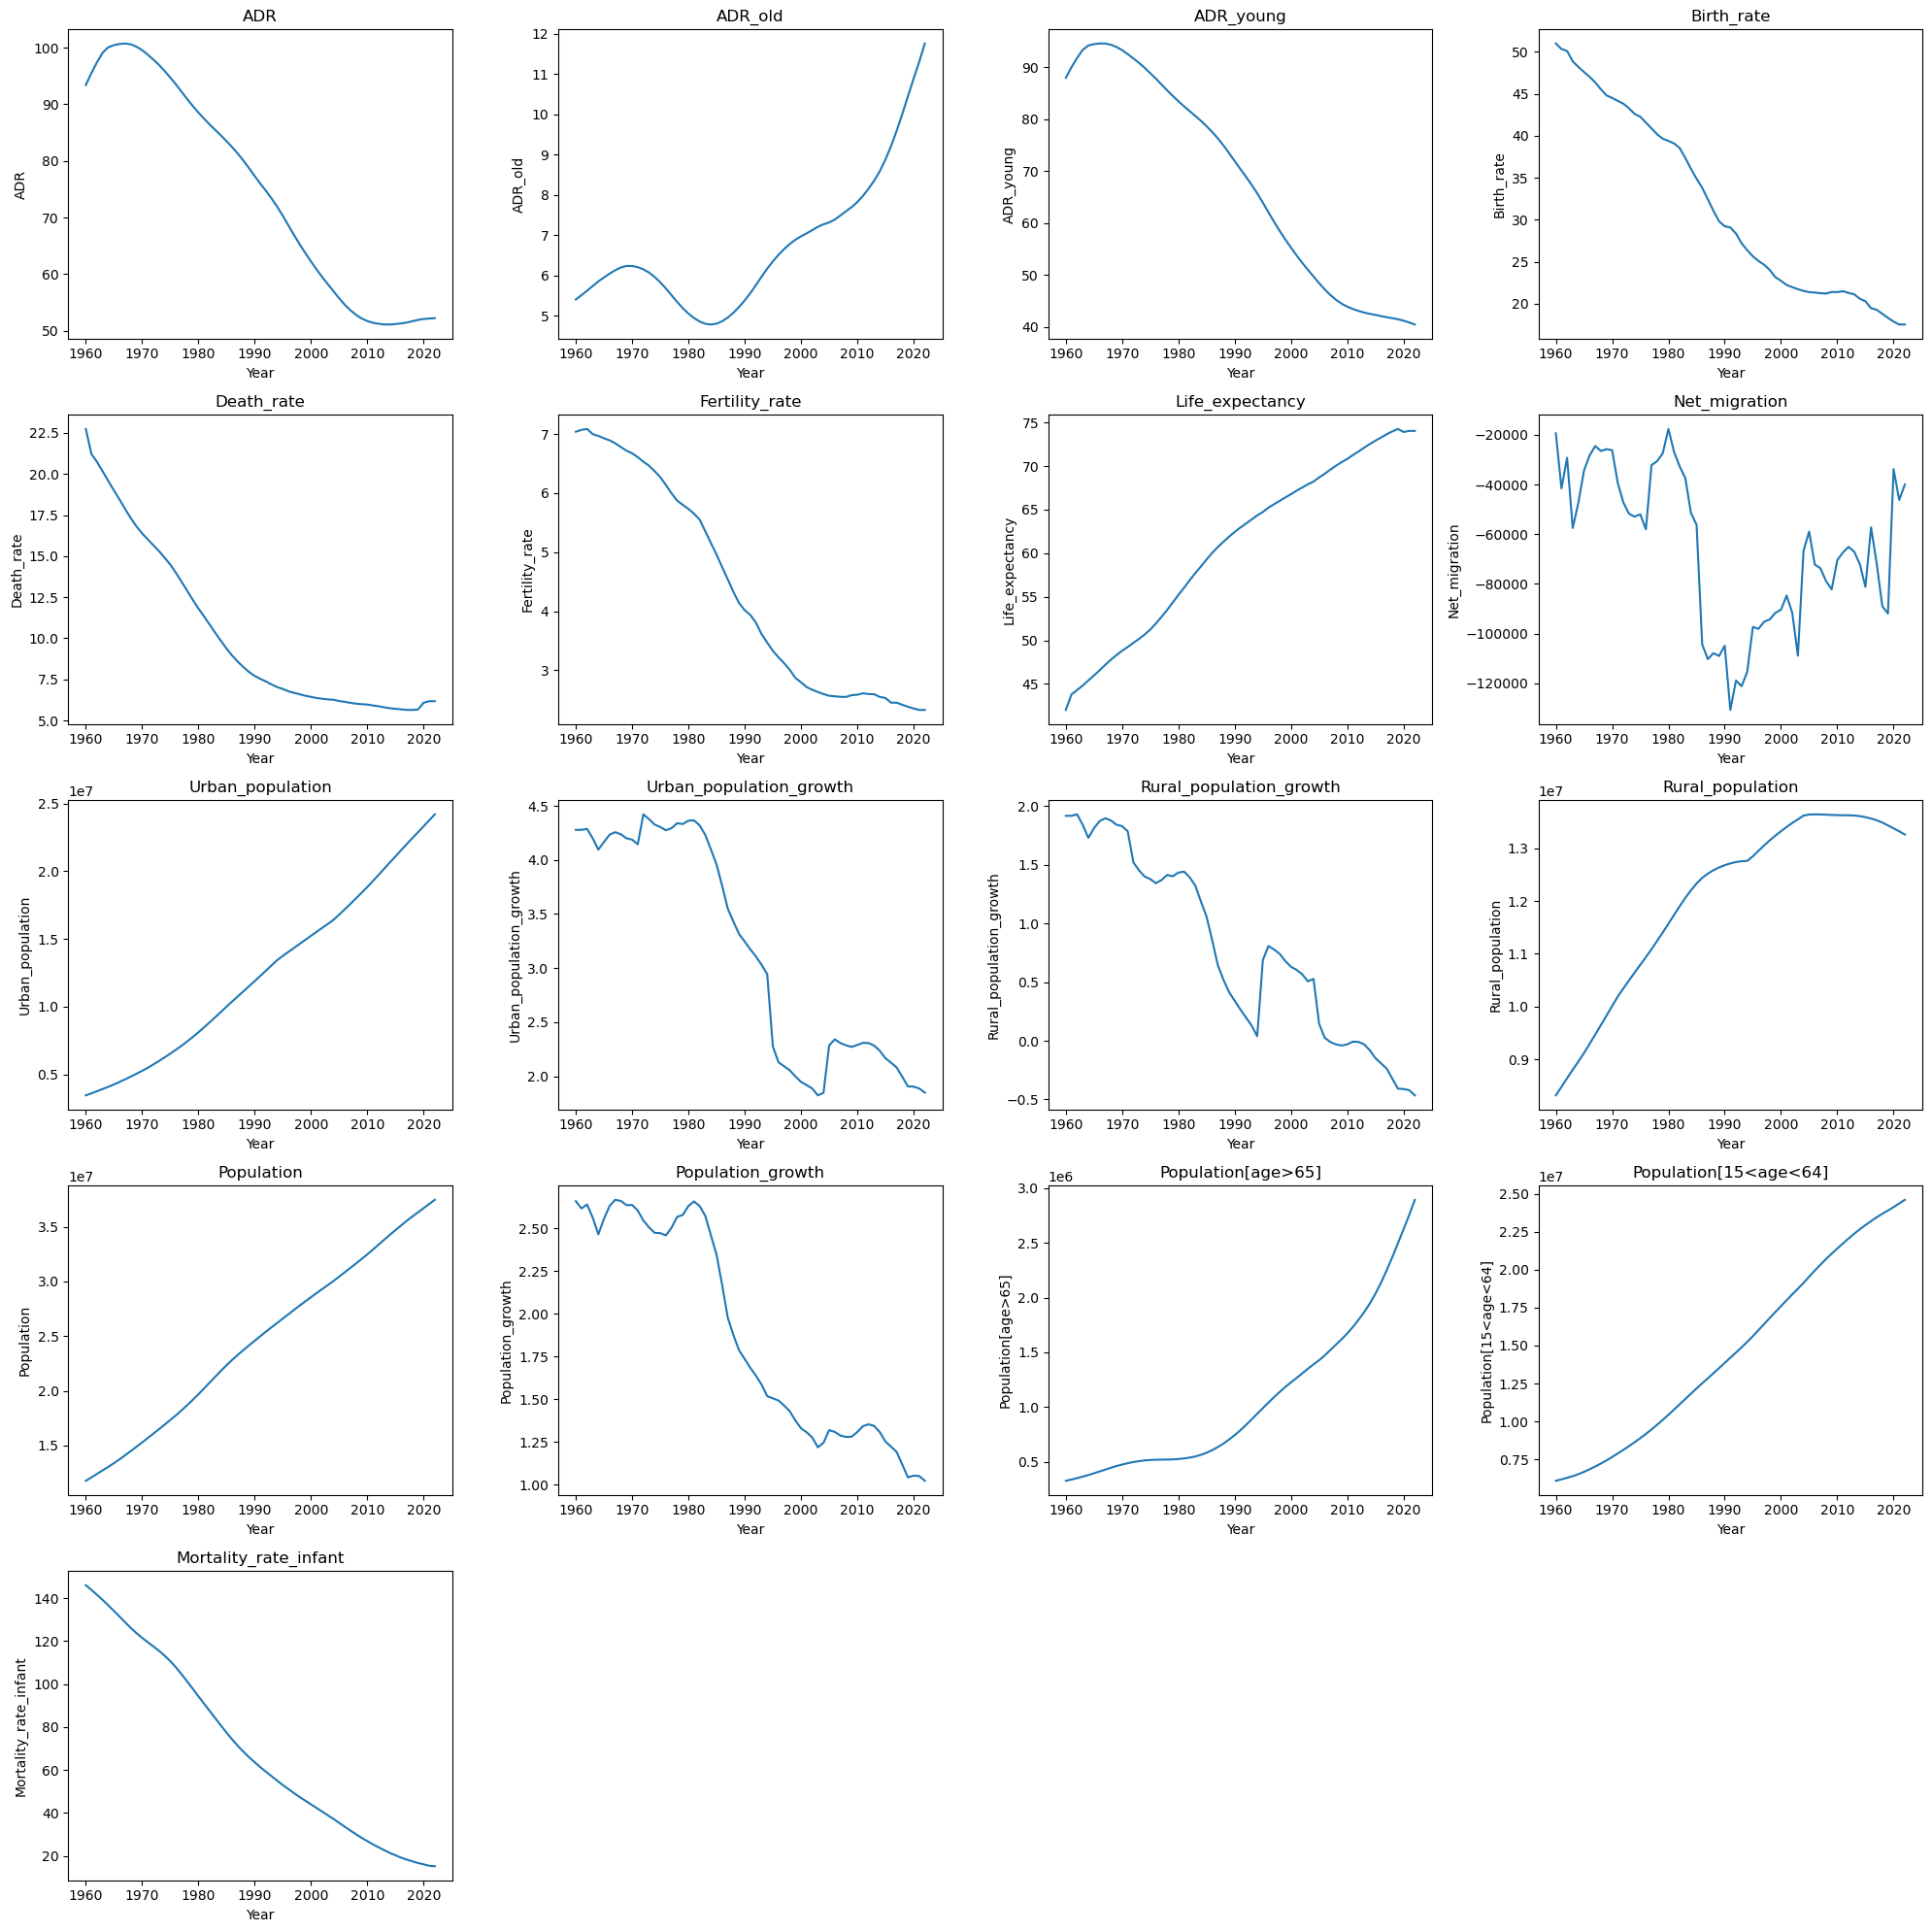

In [20]:
# visualiser la distribution des données en fonction du temps pour chaque variable en utilisant des graphiques en ligne
plt.figure(figsize=(20, 20))
for i, col in enumerate(df.columns):
    plt.subplot(5, 4, i+1)
    plt.plot(data_final['Year'], data_final[col])
    plt.title(col)
    plt.xlabel('Year')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

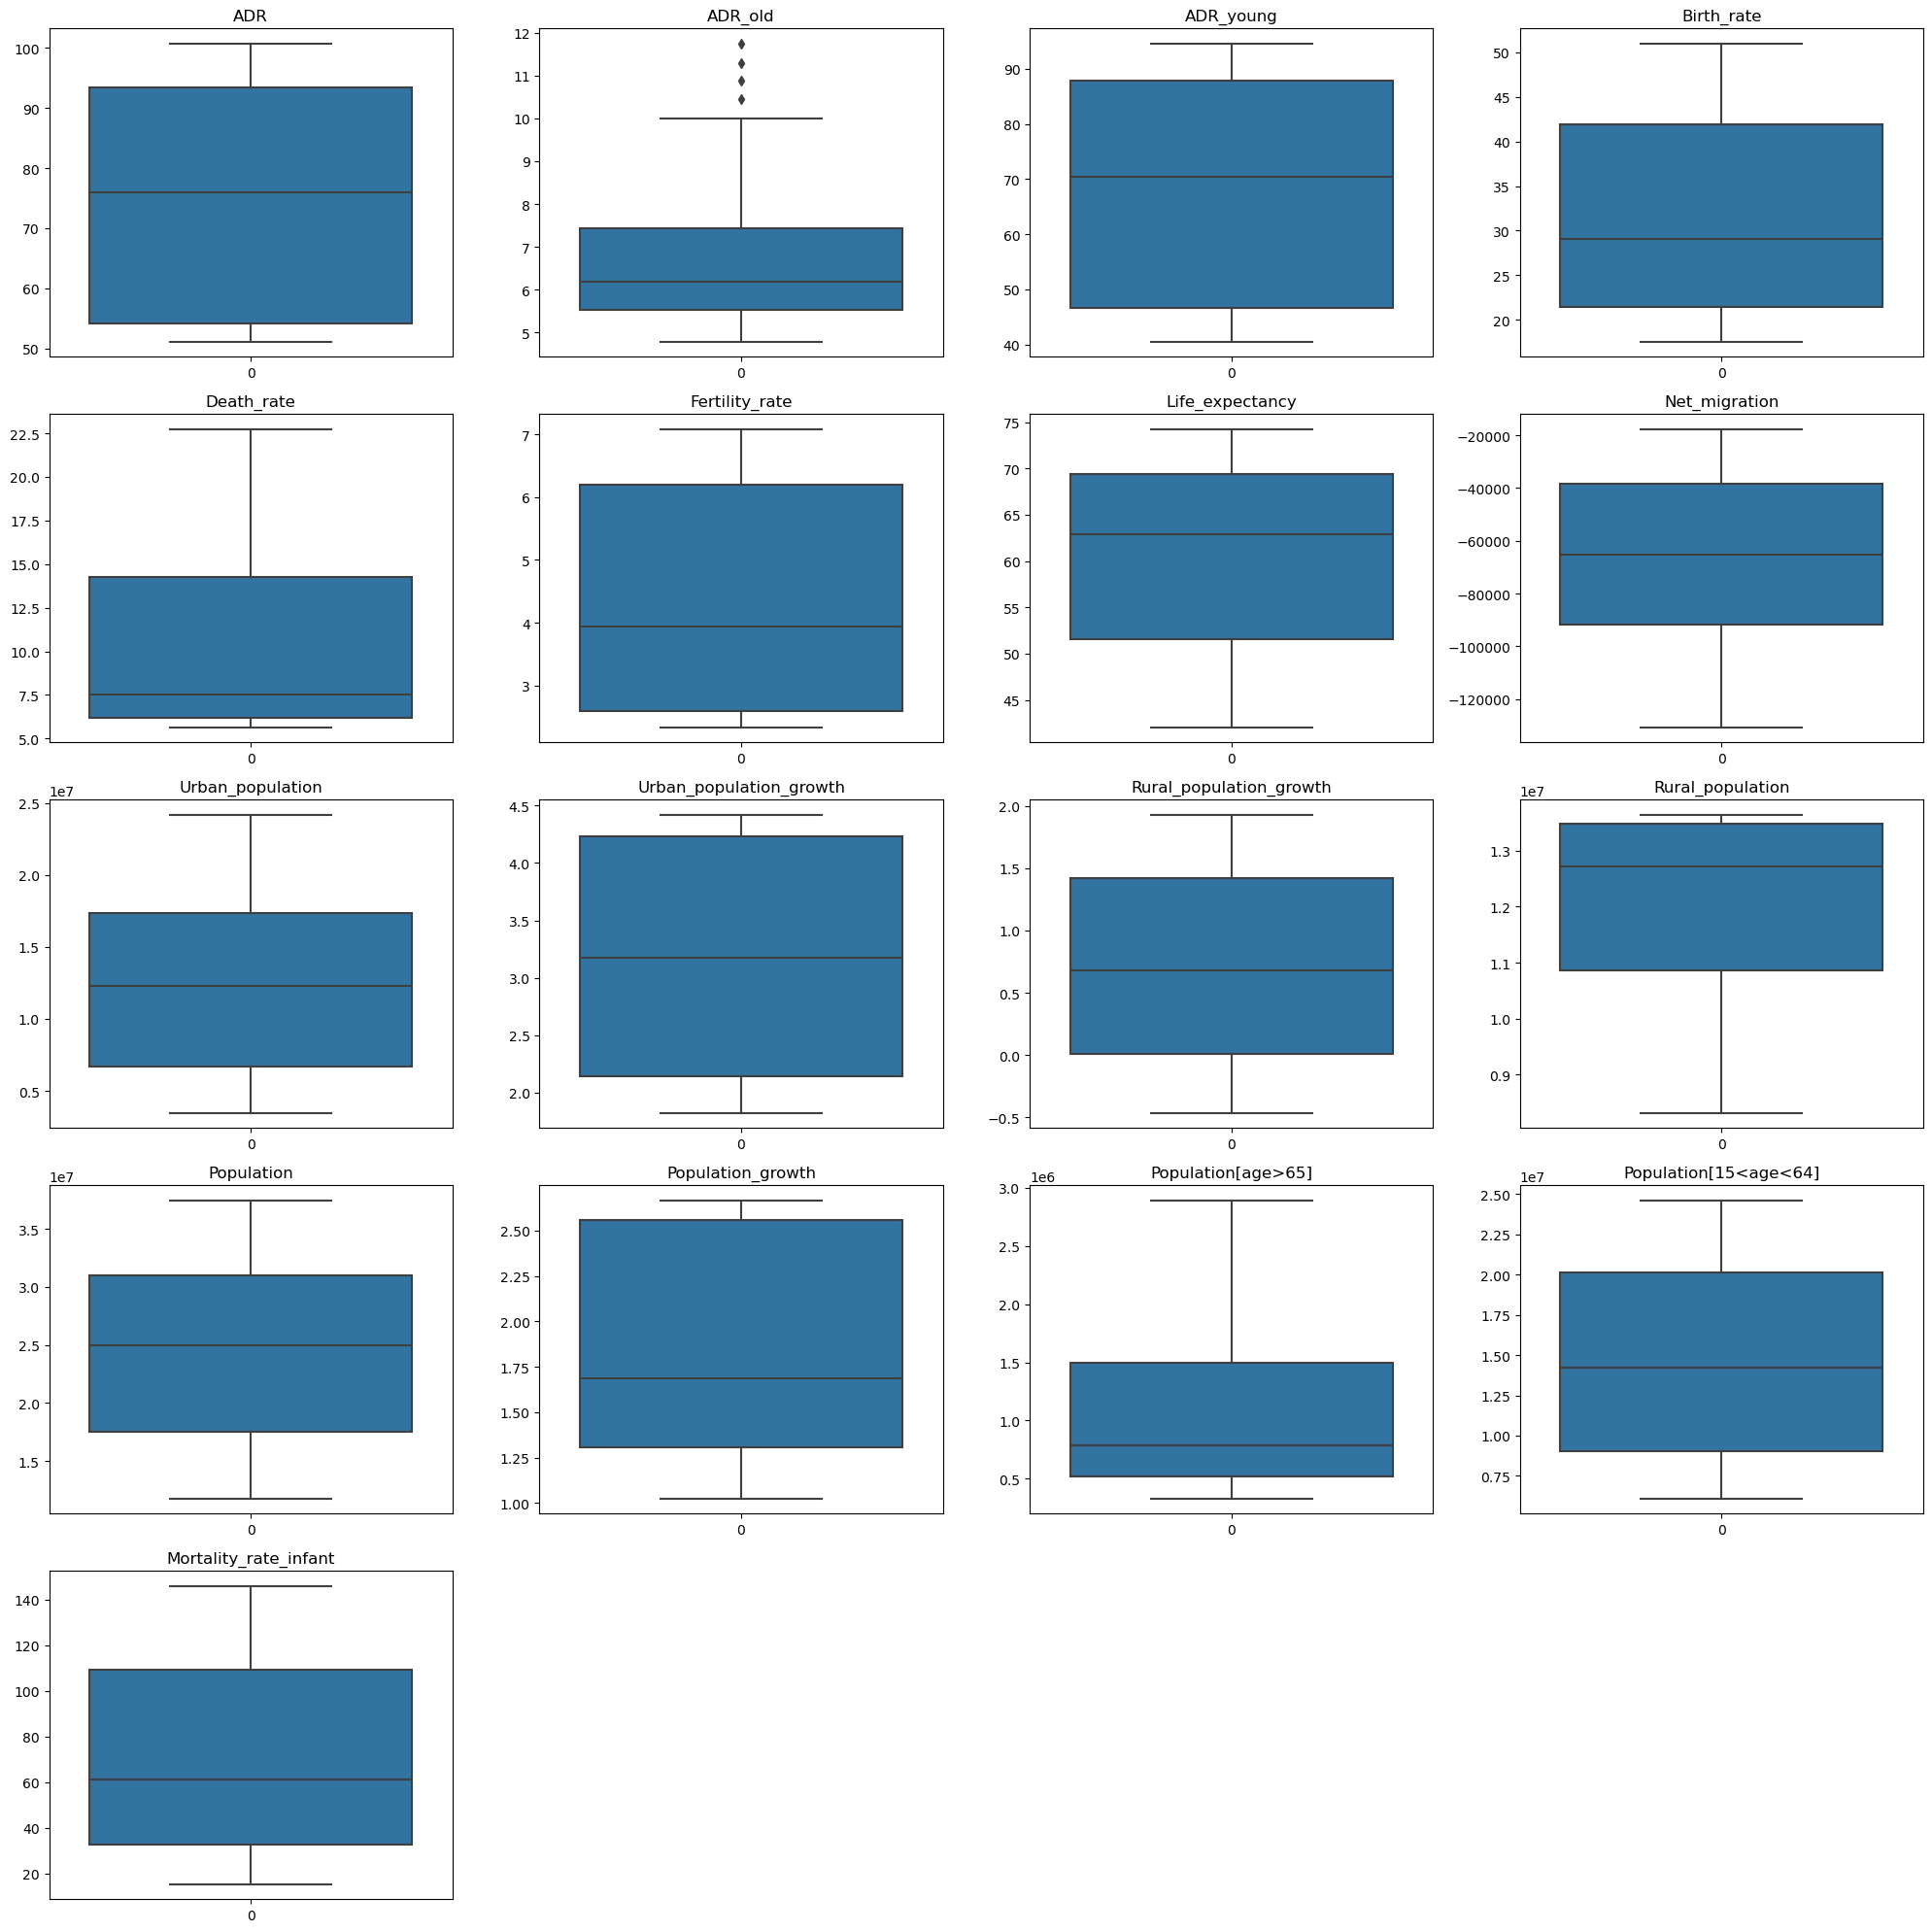

In [21]:
# visaliser avec des boxplot
plt.figure(figsize=(20, 20))
for i, col in enumerate(df.columns):
    plt.subplot(5, 4, i+1)
    sns.boxplot(data_final[col])
    plt.title(col)
plt.tight_layout()
plt.show()


### Conclusions des statistiques descriptives :

- on remarque que les données dont standardiser , pas de outliers 

#### ADR :



- Nombre d'années : 63
- Moyenne : 74.95%
- Écart type : 18.70%
- Minimum : 51.11%
- 1er quartile (Q1) : 54.12%
- Médiane (2e quartile, Q2) : 75.98%
- 3e quartile (Q3) : 93.45%
- Maximum : 100.72%

___

1. **Distribution** : La variable semble suivre une distribution relativement symétrique autour de la moyenne, avec un écart type modéré de 18.70%. Cela suggère que les valeurs sont assez dispersées autour de la moyenne.

2. **Tendance centrale** :
   - La moyenne d'environ 74.95% indique que, en moyenne, environ 74.95% de la population en âge de travailler est responsable de soutenir les personnes dépendantes (enfants et personnes âgées) dans le pays .
   - La médiane (Q2) est assez proche de la moyenne, ce qui suggère une distribution relativement symétrique des données.

3. **Dispersion** :
   - L'écart interquartile (Q3 - Q1) est assez large (environ 39.33%), ce qui indique une variation importante des âges de la population dépendante par rapport à la population en âge de travailler.
   - La gamme complète des données (de 51.11% à 100.72%) montre l'étendue des valeurs observées pour cette variable.

4. **Tendance temporelle** : une diminution quasi linéaire en fonction des années pendant ces 63 ans 

#### ADR_old

- Nombre d'années : 63
- Moyenne : 6.73%
- Écart type : 1.69%
- Minimum : 4.78%
- 1er quartile (Q1) : 5.53%
- Médiane (2e quartile, Q2) : 6.20%
- 3e quartile (Q3) : 7.44%
- Maximum : 11.75%

___

1. **Distribution** : La distribution semble être relativement symétrique autour de la moyenne, avec un écart type relativement faible de 1.69%.

2. **Tendance centrale** :
   - La moyenne de 6.73% indique que, en moyenne, environ 6.73% de la population en âge de travailler est composée de personnes âgées dépendantes dans le pays .
   - La médiane (6.20%) est légèrement inférieure à la moyenne, ce qui suggère une distribution légèrement asymétrique des données vers la gauche.

3. **Dispersion** :
   - L'écart interquartile (Q3 - Q1) est relativement faible (environ 1.91%), ce qui indique une dispersion relativement limitée des valeurs autour de la médiane.
   - La gamme complète des données (de 4.78% à 11.75%) montre l'étendue des valeurs observées pour cette variable.

4. **Tendance temporelle** : aprés une concavité entre les années 60 et 80 , on remarque une augmentation quasi linéaire en fonction du temps 

#### ADR_young 

- Nombre d'années : 63
- Moyenne : 68.21%
- Écart type : 19.99%
- Minimum : 40.47%
- 1er quartile (Q1) : 46.68%
- Médiane (2e quartile, Q2) : 70.42%
- 3e quartile (Q3) : 87.91%
- Maximum : 94.60%

___

1. **Distribution** : La distribution semble être relativement asymétrique vers la gauche, avec un écart type assez élevé de 19.99%. Cela suggère une dispersion importante des données autour de la moyenne.

2. **Tendance centrale** :
   - La moyenne de 68.21% indique que, en moyenne, environ 68.21% de la population en âge de travailler est composée de jeunes dépendants dans le pays .
   - La médiane (70.42%) est assez proche de la moyenne, ce qui suggère une distribution relativement symétrique des données.

3. **Dispersion** :
   - L'écart interquartile (Q3 - Q1) est assez large (environ 41.23%), ce qui indique une dispersion importante des valeurs autour de la médiane.
   - La gamme complète des données (de 40.47% à 94.60%) montre l'étendue des valeurs observées pour cette variable.

4. **Tendance temporelle** : on remarque une diminution quasi linéaire en fonction du temps 

#### Birth_rate

- Nombre d'années : 63
- Moyenne : 31.59 naissances pour 1 000 habitants
- Écart type : 10.87
- Minimum : 17.55 naissances pour 1 000 habitants
- 1er quartile (Q1) : 21.41 naissances pour 1 000 habitants
- Médiane (2e quartile, Q2) : 29.09 naissances pour 1 000 habitants
- 3e quartile (Q3) : 41.91 naissances pour 1 000 habitants
- Maximum : 50.98 naissances pour 1 000 habitants

___

1. **Distribution** : La distribution semble être asymétrique vers la droite, avec un écart type assez élevé de 10.87. Cela suggère une dispersion importante des données autour de la moyenne.

2. **Tendance centrale** :
   - La moyenne de 31.59 naissances pour 1 000 habitants indique que, en moyenne, il y a environ 31.59 naissances pour chaque tranche de 1 000 habitants dans le pays.
   - La médiane (29.09 naissances pour 1 000 habitants) est inférieure à la moyenne, ce qui suggère une distribution asymétrique des données vers la droite.

3. **Dispersion** :
   - L'écart interquartile (Q3 - Q1) est assez large (environ 20.5 naissances pour 1 000 habitants), ce qui indique une dispersion importante des valeurs autour de la médiane.
   - La gamme complète des données (de 17.55 à 50.98 naissances pour 1 000 habitants) montre l'étendue des valeurs observées pour cette variable.

4. **Tendance temporelle** : une dimunition quasi linéaire en fonction du temps 

#### Death_rate

- Nombre d'années : 63
- Moyenne : 10.24 décès pour 1 000 habitants
- Écart type : 5.09
- Minimum : 5.64 décès pour 1 000 habitants
- 1er quartile (Q1) : 6.17 décès pour 1 000 habitants
- Médiane (2e quartile, Q2) : 7.53 décès pour 1 000 habitants
- 3e quartile (Q3) : 14.24 décès pour 1 000 habitants
- Maximum : 22.75 décès pour 1 000 habitants

___

1. **Distribution** : La distribution semble être asymétrique vers la droite, avec un écart type de 5.09. Cela suggère une dispersion importante des données autour de la moyenne.

2. **Tendance centrale** :
   - La moyenne de 10.24 décès pour 1 000 habitants indique qu'en moyenne, il y a environ 10.24 décès pour chaque tranche de 1 000 habitants dans le pays.
   - La médiane (7.53 décès pour 1 000 habitants) est inférieure à la moyenne, ce qui suggère une distribution asymétrique des données vers la droite.

3. **Dispersion** :
   - L'écart interquartile (Q3 - Q1) est assez large (environ 8.07 décès pour 1 000 habitants), ce qui indique une dispersion importante des valeurs autour de la médiane.
   - La gamme complète des données (de 5.64 à 22.75 décès pour 1 000 habitants) montre l'étendue des valeurs observées pour cette variable.

4. **Tendance temporelle** : une dimunition quasi linéaire en fonction du temps 

#### Fertility_rate

- Nombre d'années : 63
- Moyenne : 4.37 naissances par femme
- Écart type : 1.79
- Minimum : 2.33 naissances par femme
- 1er quartile (Q1) : 2.60 naissances par femme
- Médiane (2e quartile, Q2) : 3.94 naissances par femme
- 3e quartile (Q3) : 6.21 naissances par femme
- Maximum : 7.09 naissances par femme

___

1. **Distribution** : La distribution semble être asymétrique vers la droite, avec un écart type de 1.79. Cela suggère une dispersion importante des données autour de la moyenne.

2. **Tendance centrale** :
   - La moyenne de 4.37 naissances par femme indique qu'en moyenne, une femme a environ 4.37 enfants dans le pays.
   - La médiane (3.94 naissances par femme) est inférieure à la moyenne, ce qui suggère une distribution asymétrique des données vers la droite.

3. **Dispersion** :
   - L'écart interquartile (Q3 - Q1) est assez large (environ 3.61 naissances par femme), ce qui indique une dispersion importante des valeurs autour de la médiane.
   - La gamme complète des données (de 2.33 à 7.09 naissances par femme) montre l'étendue des valeurs observées pour cette variable.

4. **Tendance temporelle** : une diminution quasi linéaire dans l'ensemble , avec une légère convéxité entre les années 80 et 2010 

#### Life_expectancy 

- Nombre d'années : 63
- Moyenne : 60.88 ans
- Écart type : 9.91
- Minimum : 42.02 ans
- 1er quartile (Q1) : 51.59 ans
- Médiane (2e quartile, Q2) : 62.95 ans
- 3e quartile (Q3) : 69.37 ans
- Maximum : 74.27 ans

___

1. **Distribution** : La distribution semble être relativement symétrique, avec un écart type de 9.91. Cela suggère une dispersion modérée des données autour de la moyenne.

2. **Tendance centrale** :
   - La moyenne de 60.88 ans indique qu'en moyenne, les individus dans le pays ont une espérance de vie d'environ 60.88 ans.
   - La médiane (62.95 ans) est légèrement supérieure à la moyenne, ce qui suggère une distribution légèrement asymétrique des données vers la gauche.

3. **Dispersion** :
   - L'écart interquartile (Q3 - Q1) est assez large (environ 17.78 ans), ce qui indique une dispersion importante des valeurs autour de la médiane.
   - La gamme complète des données (de 42.02 à 74.27 ans) montre l'étendue des valeurs observées pour cette variable.

4. **Tendance temporelle** : une augmentation quasi linéaire en fonction du temps 

#### Net_migration

- Nombre d'années : 63
- Moyenne : -65650.43
- Écart type : 30636.38
- Minimum : -130743
- 1er quartile (Q1) : -91654.5
- Médiane (2e quartile, Q2) : -65136
- 3e quartile (Q3) : -38394.5
- Maximum : -17644

____

1. **Distribution** : La distribution semble être asymétrique vers la gauche, avec un écart type de 30636.38. Cela suggère une dispersion importante des données autour de la moyenne.

2. **Tendance centrale** :
   - La moyenne de -65650.43 indique qu'en moyenne, le pays enregistre une migration nette négative d'environ 65650.43 personnes par an.
   - La médiane de -65136 est assez proche de la moyenne, ce qui suggère une distribution relativement symétrique des données.

3. **Dispersion** :
   - L'écart interquartile (Q3 - Q1) est assez large (environ 53260 personnes), ce qui indique une dispersion importante des valeurs autour de la médiane.
   - La gamme complète des données (de -130743 à -17644 personnes) montre l'étendue des valeurs observées pour cette variable.

4. **Tendance temporelle** : une évolution un peu sans des tendances spécifiques ; juste des valeurs éleves dans l'ensemble vers les années 60 et 80 , et ausssi les années 2000 et 2020 avec des valeurs minimales entre les deux periodes 

#### Urban_population

- Nombre d'années : 63
- Moyenne : 12,484,160
- Écart type : 6,286,809
- Minimum : 3,455,253
- 1er quartile (Q1) : 6,676,732
- Médiane (2e quartile, Q2) : 12,273,400
- 3e quartile (Q3) : 17,388,730
- Maximum : 24,196,350

____

1. **Distribution** : La distribution semble être relativement symétrique, avec un écart type important de 6,286,809. Cela suggère une dispersion considérable des données autour de la moyenne.

2. **Tendance centrale** :
   - La moyenne de 12,484,160 indique qu'en moyenne, la population urbaine dans le pays est d'environ 12,484,160 habitants.
   - La médiane de 12,273,400 est assez proche de la moyenne, ce qui suggère une distribution relativement symétrique des données.

3. **Dispersion** :
   - L'écart interquartile (Q3 - Q1) est assez important (environ 10,712,998 habitants), ce qui indique une dispersion considérable des valeurs autour de la médiane.
   - La gamme complète des données (de 3,455,253 à 24,196,350 habitants) montre l'étendue des valeurs observées pour cette variable.

4. **Tendance temporelle** : une augmentation quasi linéaire en fonction du temps 

#### Urban_population_growth 

- Nombre d'années : 63
- Moyenne : 3.16%
- Écart type : 1.02%
- Minimum : 1.82%
- 1er quartile (Q1) : 2.15%
- Médiane (2e quartile, Q2) : 3.17%
- 3e quartile (Q3) : 4.24%
- Maximum : 4.42%

____

1. **Distribution** : La distribution semble être relativement symétrique, avec un écart type de 1.02%. Cela suggère une dispersion modérée des données autour de la moyenne.

2. **Tendance centrale** :
   - La moyenne de 3.16% indique qu'en moyenne, la croissance de la population urbaine dans le pays est d'environ 3.16% par an.
   - La médiane de 3.17% est assez proche de la moyenne, ce qui suggère une distribution relativement symétrique des données.

3. **Dispersion** :
   - L'écart interquartile (Q3 - Q1) est relativement faible (environ 2.09%), ce qui indique une dispersion modérée des valeurs autour de la médiane.
   - La gamme complète des données (de 1.82% à 4.42%) montre l'étendue des valeurs observées pour cette variable.

4. **Tendance temporelle** : entre les années 60 et 80 : des petites oscillations entre la valeur 4.25 . entre les années 2000 jusqu a présent : des oscillation entre la valeur 2.0 , et entre ces deux périodes une diminution quasi linéaire en fonction du temps 

#### Rural_population_growth

- Nombre d'années : 63
- Moyenne : 0.77%
- Écart type : 0.77%
- Minimum : -0.47%
- 1er quartile (Q1) : 0.01%
- Médiane (2e quartile, Q2) : 0.68%
- 3e quartile (Q3) : 1.42%
- Maximum : 1.93%

____

1. **Distribution** : La distribution semble être relativement symétrique, avec un écart type de 0.77%. Cela suggère une dispersion modérée des données autour de la moyenne.

2. **Tendance centrale** :
   - La moyenne de 0.77% indique qu'en moyenne, la croissance de la population rurale dans le pays  est d'environ 0.77% par an.
   - La médiane de 0.68% est légèrement inférieure à la moyenne, ce qui suggère une légère asymétrie des données vers la gauche.

3. **Dispersion** :
   - L'écart interquartile (Q3 - Q1) est relativement modéré (environ 1.41%), ce qui indique une dispersion modérée des valeurs autour de la médiane.
   - La gamme complète des données (de -0.47% à 1.93%) montre l'étendue des valeurs observées pour cette variable.

4. **Tendance temporelle** : une dimunition oscillatoire en fonction du temps 

#### Rural_population

Pour analyser la variable "Population rurale" sur plusieurs années pour un pays donné, voici les statistiques disponibles :

- Nombre d'années : 63
- Moyenne : 12,061,300
- Écart type : 1,664,116
- Minimum : 8,314,521
- 1er quartile (Q1) : 10,864,190
- Médiane (2e quartile, Q2) : 12,714,690
- 3e quartile (Q3) : 13,485,730
- Maximum : 13,644,850

Voici quelques observations basées sur cette analyse :

1. **Distribution** : La distribution semble être relativement symétrique, avec un écart type important de 1,664,116. Cela suggère une dispersion considérable des données autour de la moyenne.

2. **Tendance centrale** :
   - La moyenne de 12,061,300 indique qu'en moyenne, la population rurale dans le pays é est d'environ 12,061,300 habitants.
   - La médiane de 12,714,690 est légèrement supérieure à la moyenne, ce qui suggère une légère asymétrie des données vers la droite.

3. **Dispersion** :
   - L'écart interquartile (Q3 - Q1) est assez important (environ 3,621,340 habitants), ce qui indique une dispersion considérable des valeurs autour de la médiane.
   - La gamme complète des données (de 8,314,521 à 13,644,850 habitants) montre l'étendue des valeurs observées pour cette variable.

4. **Tendance temporelle** : une augmentation quasi linéaire entre les années 60 jusqu a 2010 puis un applatissement jusqu au présent vers la valeurs 1.4e7

#### Population

- Nombre d'années : 63
- Moyenne : 24,545,450
- Écart type : 7,808,452
- Minimum : 11,769,770
- 1er quartile (Q1) : 17,540,920
- Médiane (2e quartile, Q2) : 24,988,080
- 3e quartile (Q3) : 31,032,830
- Maximum : 37,457,970

____

1. **Distribution** : La distribution semble être relativement symétrique, avec un écart type important de 7,808,452. Cela suggère une dispersion considérable des données autour de la moyenne.

2. **Tendance centrale** :
   - La moyenne de 24,545,450 indique qu'en moyenne, la population totale dans le pays est d'environ 24,545,450 habitants.
   - La médiane de 24,988,080 est assez proche de la moyenne, ce qui suggère une distribution relativement symétrique des données.

3. **Dispersion** :
   - L'écart interquartile (Q3 - Q1) est important (environ 13,491,910 habitants), ce qui indique une dispersion considérable des valeurs autour de la médiane.
   - La gamme complète des données (de 11,769,770 à 37,457,970 habitants) montre l'étendue des valeurs observées pour cette variable.

4. **Tendance temporelle** : une augemtation linéaire en fonction du temps 

#### Population_growth

- Nombre d'années : 63
- Moyenne : 1.88%
- Écart type : 0.62%
- Minimum : 1.02%
- 1er quartile (Q1) : 1.31%
- Médiane (2e quartile, Q2) : 1.68%
- 3e quartile (Q3) : 2.56%
- Maximum : 2.67%

____

1. **Distribution** : La distribution semble être relativement symétrique, avec un écart type de 0.62%. Cela suggère une dispersion modérée des données autour de la moyenne.

2. **Tendance centrale** :
   - La moyenne de 1.88% indique qu'en moyenne, le taux de croissance de la population dans le pays est d'environ 1.88% par an.
   - La médiane de 1.68% est inférieure à la moyenne, ce qui suggère une légère asymétrie des données vers la gauche.

3. **Dispersion** :
   - L'écart interquartile (Q3 - Q1) est assez important (environ 1.25%), ce qui indique une dispersion modérée des valeurs autour de la médiane.
   - La gamme complète des données (de 1.02% à 2.67%) montre l'étendue des valeurs observées pour cette variable.

4. **Tendance temporelle** : des oscillation entre les années 60 et 80 entre la valeur 2.6 , des oscillation aussi entre  les années 90 jusqu au présent entre la valeur 1.25 , puis une diminution quasi linéaire ces deux périodes 

#### Population[age>65]

- Nombre d'années : 63
- Moyenne : 1,068,528
- Écart type : 698,108
- Minimum : 328,751
- 1er quartile (Q1) : 519,723
- Médiane (2e quartile, Q2) : 789,407
- 3e quartile (Q3) : 1,497,293
- Maximum : 2,891,937

____

1. **Distribution** : La distribution semble être relativement asymétrique, avec un écart type important de 698,108. Cela suggère une dispersion considérable des données autour de la moyenne.

2. **Tendance centrale** :
   - La moyenne de 1,068,528 indique qu'en moyenne, la population âgée de plus de 65 ans dans le pays est d'environ 1,068,528 personnes.
   - La médiane de 789,407 est inférieure à la moyenne, ce qui suggère une distribution asymétrique des données vers la droite.

3. **Dispersion** :
   - L'écart interquartile (Q3 - Q1) est assez important (environ 977,570 personnes), ce qui indique une dispersion considérable des valeurs autour de la médiane.
   - La gamme complète des données (de 328,751 à 2,891,937 personnes) montre l'étendue des valeurs observées pour cette variable.

4. **Tendance temporelle** : une augementation quasi exponentielle en fonction du temps 

#### Population[15<age<64]

- Nombre d'années : 63
- Moyenne : 14,656,530
- Écart type : 6,040,186
- Minimum : 6,086,153
- 1er quartile (Q1) : 9,037,042
- Médiane (2e quartile, Q2) : 14,199,100
- 3e quartile (Q3) : 20,136,350
- Maximum : 24,608,100

___

1. **Distribution** : La distribution semble être relativement symétrique, avec un écart type important de 6,040,186. Cela suggère une dispersion considérable des données autour de la moyenne.

2. **Tendance centrale** :
   - La moyenne de 14,656,530 indique qu'en moyenne, la population âgée de 15 à 64 ans dans le pays est d'environ 14,656,530 personnes.
   - La médiane de 14,199,100 est légèrement inférieure à la moyenne, ce qui suggère une distribution légèrement asymétrique des données vers la gauche.

3. **Dispersion** :
   - L'écart interquartile (Q3 - Q1) est assez important (environ 11,099,308 personnes), ce qui indique une dispersion considérable des valeurs autour de la médiane.
   - La gamme complète des données (de 6,086,153 à 24,608,100 personnes) montre l'étendue des valeurs observées pour cette variable.

4. **Tendance temporelle** : une augmentation quasi linéaire en fonction du temps 

#### Mortality_rate_infant

- Nombre d'années : 63
- Moyenne : 70.14
- Écart type : 41.96
- Minimum : 15.2
- 1er quartile (Q1) : 32.7
- Médiane (2e quartile, Q2) : 61.3
- 3e quartile (Q3) : 109.25
- Maximum : 146.0

____

1. **Distribution** : La distribution semble être asymétrique, avec un écart type important de 41.96. Cela suggère une dispersion considérable des données autour de la moyenne.

2. **Tendance centrale** :
   - La moyenne de 70.14 indique qu'en moyenne, le taux de mortalité infantile dans le pays est d'environ 70.14 pour 1000 naissances vivantes.
   - La médiane de 61.3 est légèrement inférieure à la moyenne, ce qui suggère une distribution asymétrique des données vers la gauche.

3. **Dispersion** :
   - L'écart interquartile (Q3 - Q1) est important (environ 76.55), ce qui indique une dispersion considérable des valeurs autour de la médiane.
   - La gamme complète des données (de 15.2 à 146.0) montre l'étendue des valeurs observées pour cette variable.

4. **Tendance temporelle** : une dimunition quasi linéaire en fonction du temps 

## Analyse Bivariée :

In [22]:
# la matrice de corrélation des données 
corr = df.corr()

corr 

,ADR,ADR_old,ADR_young,Birth_rate,Death_rate,Fertility_rate,Life_expectancy,Net_migration,Urban_population,Urban_population_growth,Rural_population_growth,Rural_population,Population,Population_growth,Population[age>65],Population[15<age<64],Mortality_rate_infant
ADR,1.000000,-0.749814,0.998437,0.972168,0.892670,0.979520,-0.972173,0.486847,-0.974695,0.945119,0.934778,-0.908191,-0.978306,0.961110,-0.899549,-0.985892,0.974283
ADR_old,-0.749814,1.000000,-0.785621,-0.697843,-0.511580,-0.677850,0.710173,-0.066200,0.831808,-0.745080,-0.725130,0.519718,0.780473,-0.750703,0.951378,0.814596,-0.702501
ADR_young,0.998437,-0.785621,1.000000,0.968021,0.877949,0.973207,-0.969068,0.460842,-0.981701,0.946718,0.935363,-0.893150,-0.980741,0.962146,-0.921531,-0.990717,0.970393
Birth_rate,0.972168,-0.697843,0.968021,1.000000,0.960515,0.996503,-0.992524,0.589298,-0.965698,0.945196,0.950256,-0.962544,-0.982646,0.969177,-0.863080,-0.970904,0.994196
Death_rate,0.892670,-0.511580,0.877949,0.960515,1.000000,0.950524,-0.961341,0.646736,-0.886597,0.838953,0.902260,-0.996047,-0.926100,0.876632,-0.728699,-0.892695,0.963287
Fertility_rate,0.979520,-0.677850,0.973207,0.996503,0.950524,1.000000,-0.985089,0.604324,-0.956951,0.956239,0.941882,-0.954616,-0.973914,0.975107,-0.847767,-0.965489,0.987974
Life_expectancy,-0.972173,0.710173,-0.969068,-0.992524,-0.961341,-0.985089,1.000000,-0.547696,0.978783,-0.913306,-0.960042,0.964227,0.993539,-0.945771,0.882050,0.981761,-0.999627
Net_migration,0.486847,-0.066200,0.460842,0.589298,0.646736,0.604324,-0.547696,1.000000,-0.437416,0.562235,0.587102,-0.614000,-0.483030,0.619875,-0.242997,-0.442543,0.551411
Urban_population,-0.974695,0.831808,-0.981701,-0.965698,-0.886597,-0.956951,0.978783,-0.437416,1.000000,-0.915054,-0.956999,0.892693,0.995377,-0.944806,0.958359,0.997624,-0.976302
Urban_population_growth,0.945119,-0.745080,0.946718,0.945196,0.838953,0.956239,-0.913306,0.562235,-0.915054,1.000000,0.858922,-0.842338,-0.916253,0.980675,-0.849948,-0.923314,0.916635


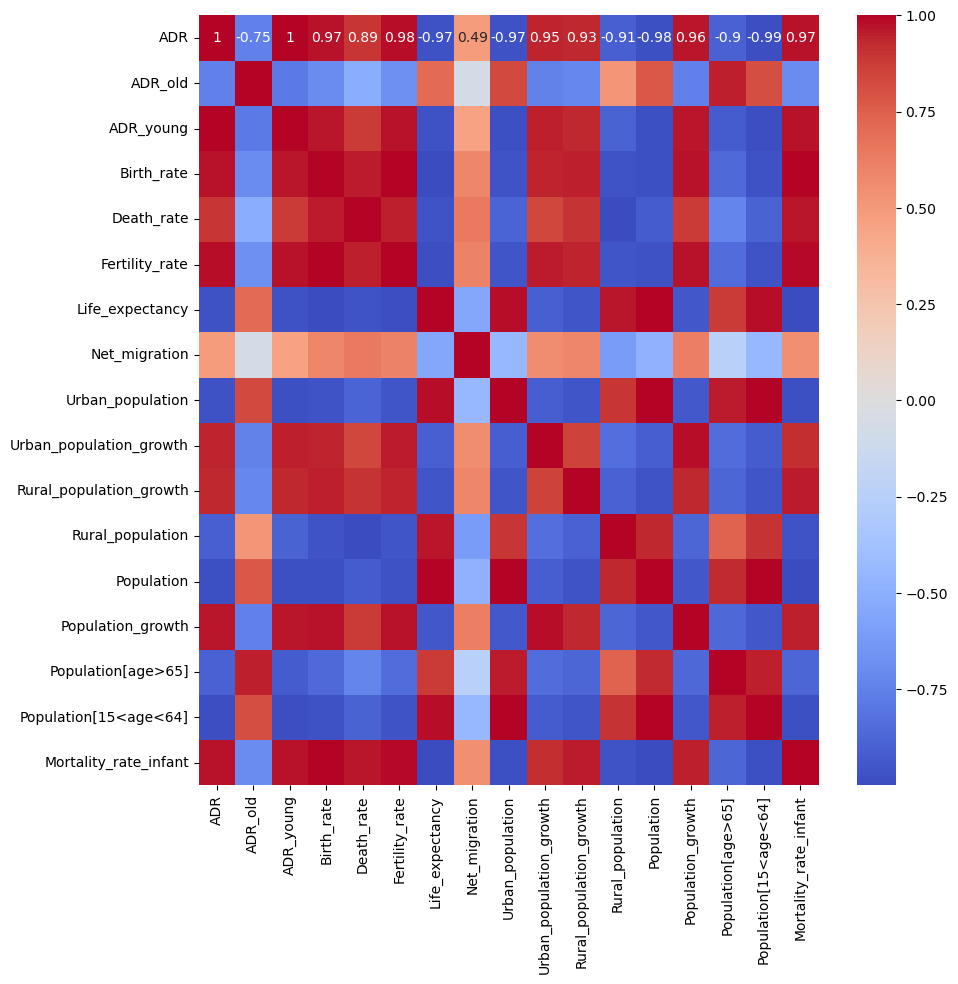

In [23]:
# visualisation de la matrice de corrélation
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

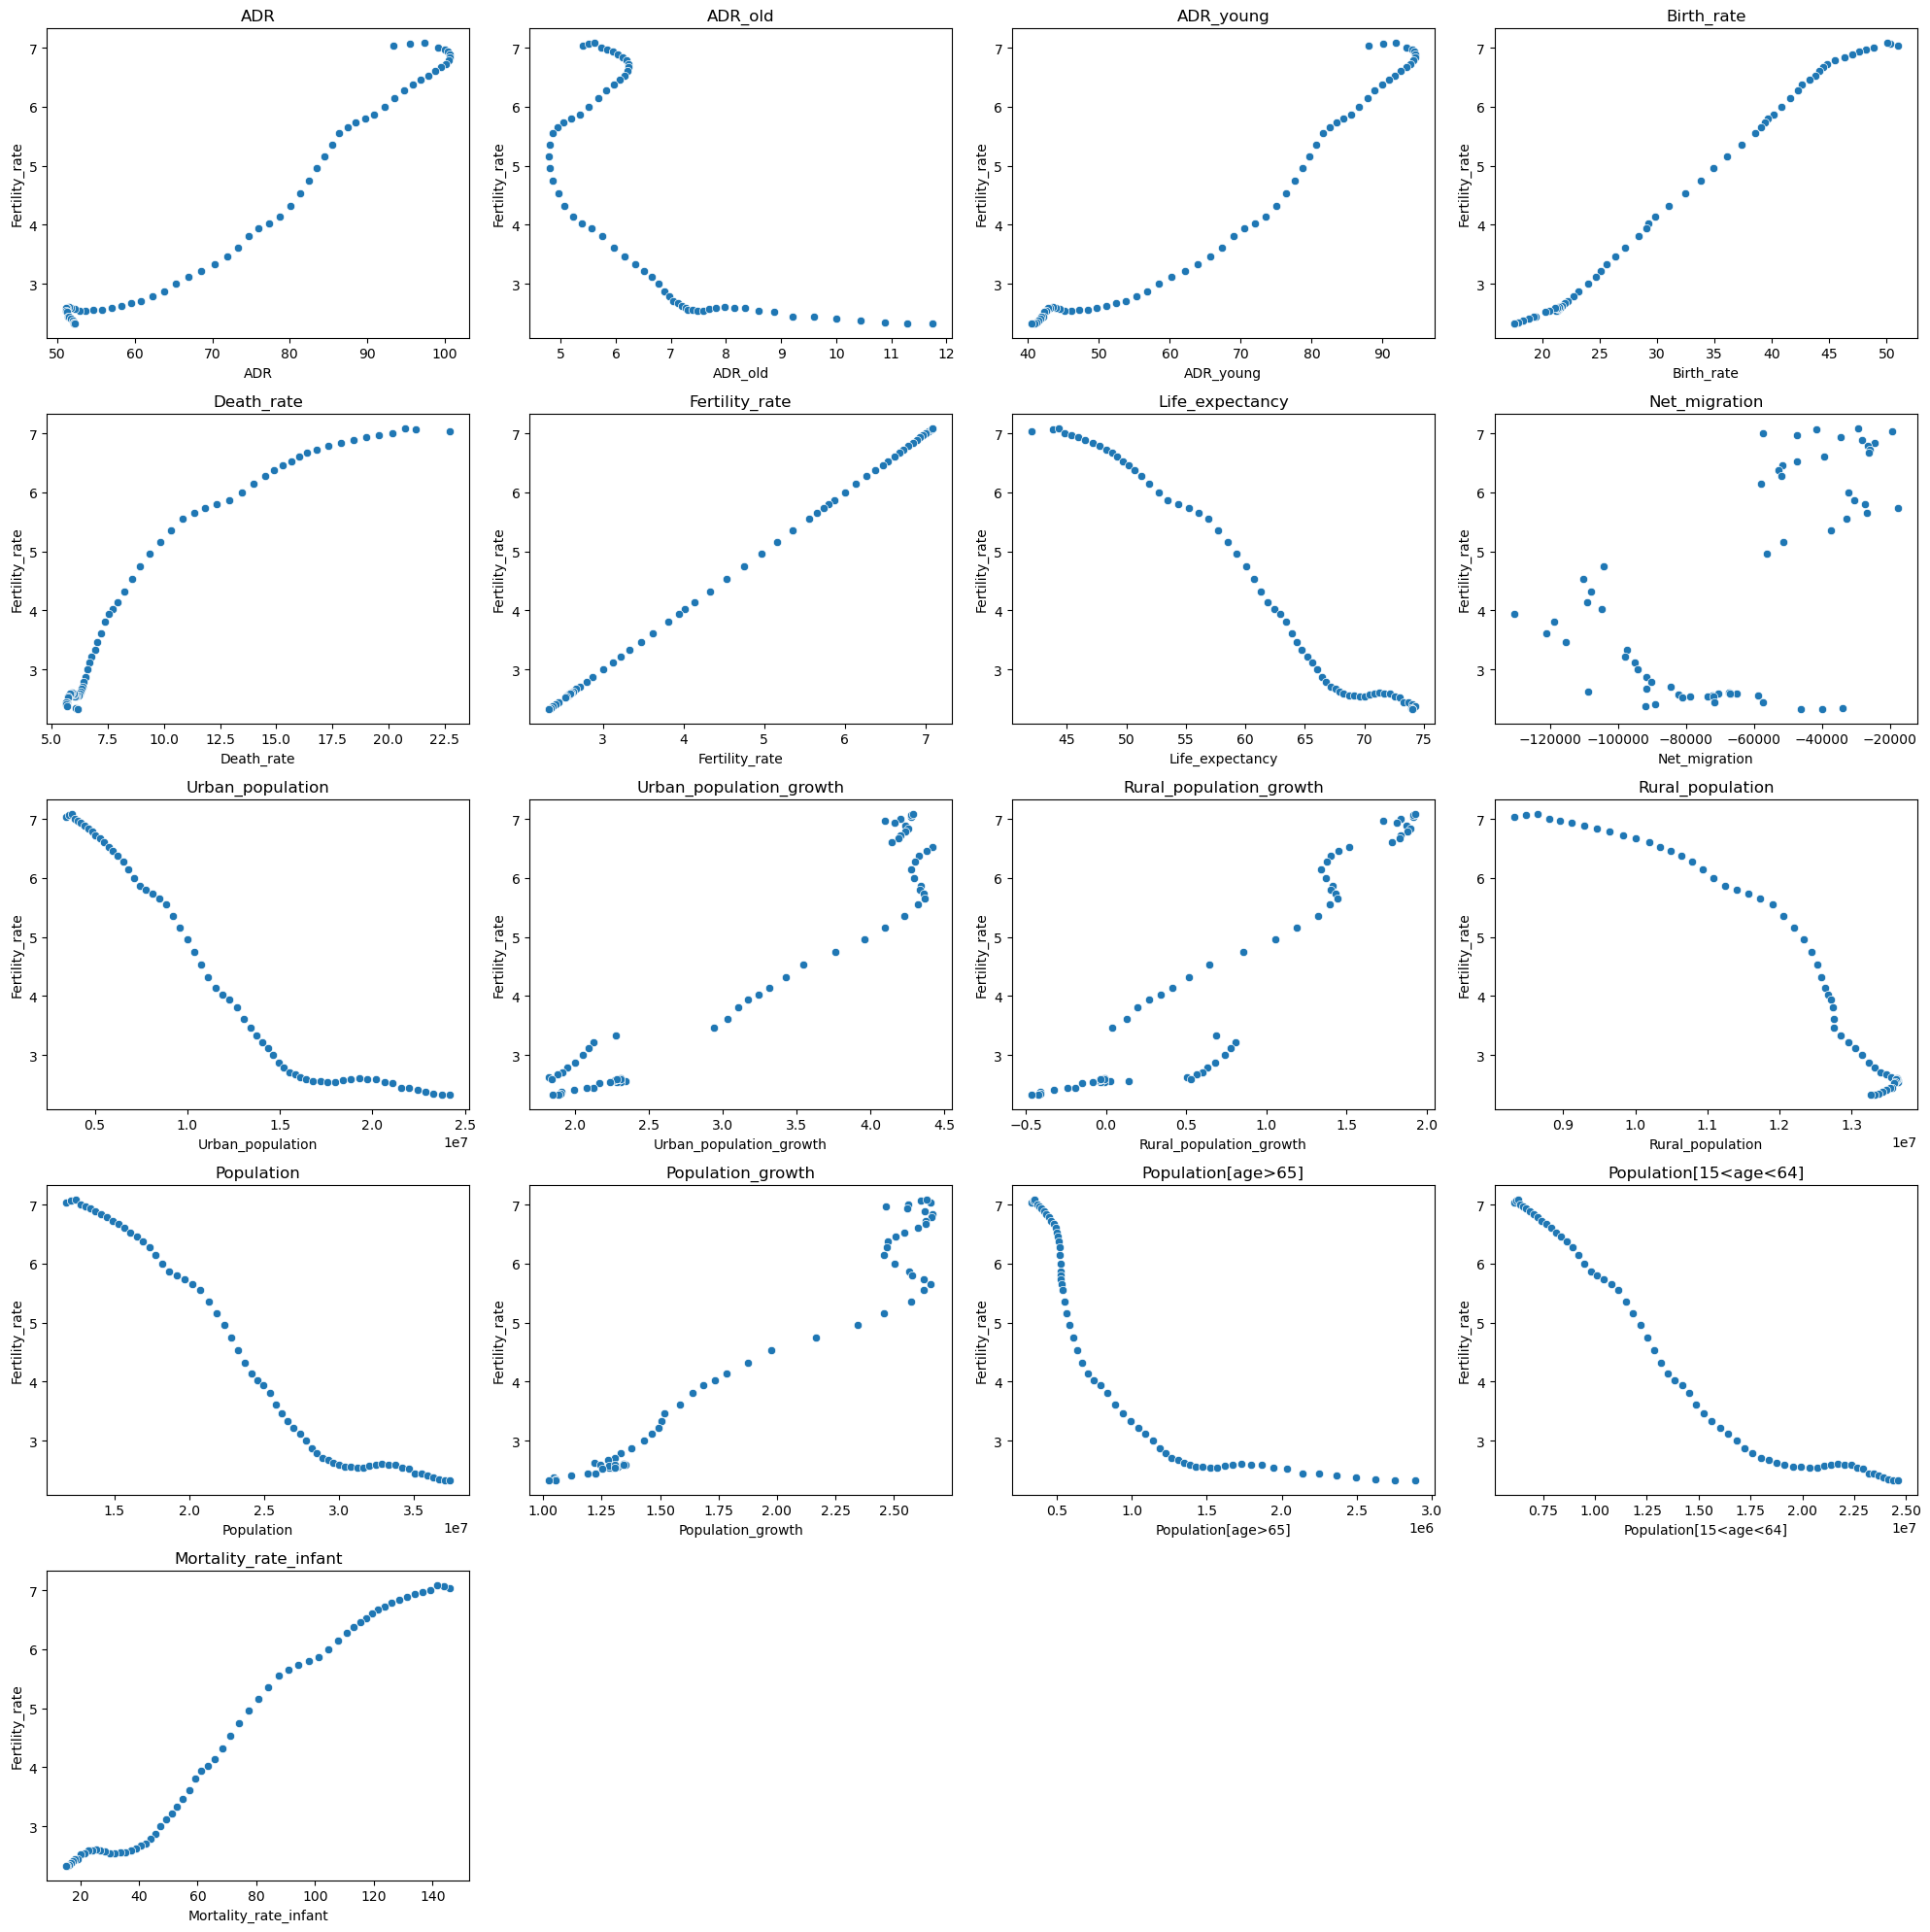

In [24]:
# visualisation de la corrélation entre les variables et la variable cible
plt.figure(figsize=(20, 20))
for i, col in enumerate(df.columns[:]):
    plt.subplot(5, 4, i+1)
    sns.scatterplot(x=df[col], y=df['Fertility_rate'])
    plt.title(col)
plt.tight_layout()
plt.show()

#### selection des variables à fortes corrélation pour la regression :


In [25]:
# store correlation values with target variable in a dictionary 
correlation = {}
for col in df.columns:
    correlation[col] = df[col].corr(df['Fertility_rate'])

correlation


{'ADR': 0.9795198175285333,
 'ADR_old': -0.6778496904503164,
 'ADR_young': 0.9732070796589134,
 'Birth_rate': 0.9965028906322714,
 'Death_rate': 0.9505240766856671,
 'Fertility_rate': 1.0,
 'Life_expectancy': -0.9850886238868728,
 'Net_migration': 0.6043240957065741,
 'Urban_population': -0.9569510632056685,
 'Urban_population_growth': 0.9562385588381872,
 'Rural_population_growth': 0.9418815491270845,
 'Rural_population': -0.9546162755169653,
 'Population': -0.9739140039069866,
 'Population_growth': 0.9751069767756444,
 'Population[age>65]': -0.84776708954145,
 'Population[15<age<64]': -0.9654893274336165,
 'Mortality_rate_infant': 0.9879744587109818}

- ADR : 0.98 
- ADR_young : 0.97
- Birth_rate : 0.99
- Death_rate : 0.95 
- Life_expectancy : 0.98 
- Urban_population : -0.95
- Urban_population_growth : 0.95 
- Rural_population_growth : 0.94
- Rural_population : -0.95 
- Population : -0.97
- Population_growth : 0.97
- Population[age>65] : -0.84
- Population[15<age<64] : -0.96
- Mortality_rate_infant : 0.98

In [26]:
# Initialize an empty dictionary corr_reg
corr_reg = {}

# Iterate over columns in df
for col in df.columns:
    # Check if the column is not 'ADR_old' or 'Net_migration' and if the absolute correlation with 'Fertility_rate' is greater than 0.2
    if col not in ['ADR_old', 'Net_migration'] and abs(df[col].corr(df['Fertility_rate'])) > 0.2:
        # Store the correlation coefficient in the corr_reg dictionary
        corr_reg[col] = df[col].corr(df['Fertility_rate'])

# Print the dictionary corr_reg
print(corr_reg)


{'ADR': 0.9795198175285333, 'ADR_young': 0.9732070796589134, 'Birth_rate': 0.9965028906322714, 'Death_rate': 0.9505240766856671, 'Fertility_rate': 1.0, 'Life_expectancy': -0.9850886238868728, 'Urban_population': -0.9569510632056685, 'Urban_population_growth': 0.9562385588381872, 'Rural_population_growth': 0.9418815491270845, 'Rural_population': -0.9546162755169653, 'Population': -0.9739140039069866, 'Population_growth': 0.9751069767756444, 'Population[age>65]': -0.84776708954145, 'Population[15<age<64]': -0.9654893274336165, 'Mortality_rate_infant': 0.9879744587109818}


In [27]:
# creer une liste qui contient les noms de variables selectionnées
selected_features = list(corr_reg.keys())

# remove "Fertility_rate" from the list
selected_features.remove('Fertility_rate')

selected_features

['ADR',
 'ADR_young',
 'Birth_rate',
 'Death_rate',
 'Life_expectancy',
 'Urban_population',
 'Urban_population_growth',
 'Rural_population_growth',
 'Rural_population',
 'Population',
 'Population_growth',
 'Population[age>65]',
 'Population[15<age<64]',
 'Mortality_rate_infant']

## RLS 


In [28]:
# regression linéaire simple entre les variables selectionnées et la variable cible
feature = df[selected_features]
y = df['Fertility_rate']
feature

,ADR,ADR_young,Birth_rate,Death_rate,Life_expectancy,Urban_population,Urban_population_growth,Rural_population_growth,Rural_population,Population,Population_growth,Population[age>65],Population[15<age<64],Mortality_rate_infant
0,93.386101,87.984479,50.975,22.745,42.017,3455253.0,4.277859,1.916930,8314521.0,11769774.0,2.658267,328751.0,6086153.0,146.0
1,95.525101,90.016282,50.317,21.213,43.795,3606271.0,4.277859,1.916930,8475442.0,12081713.0,2.615827,340396.0,6179111.0,143.8
2,97.435846,91.816366,50.087,20.732,44.297,3764224.0,4.286746,1.929147,8640533.0,12404757.0,2.638704,353068.0,6282930.0,141.5
3,99.112444,93.377341,48.847,20.153,44.820,3925674.0,4.199633,1.840244,8801012.0,12726686.0,2.562102,366571.0,6391708.0,139.1
4,100.062913,94.213656,48.192,19.570,45.392,4089765.0,4.094945,1.728826,8954489.0,13044254.0,2.464668,381376.0,6520076.0,136.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,51.686189,41.682795,18.813,5.637,73.986,22437808.0,1.994383,-0.323183,13489703.0,35927511.0,1.117897,2369346.0,23685420.0,17.5
59,51.919106,41.476007,18.337,5.658,74.270,22869599.0,1.906108,-0.407763,13434809.0,36304408.0,1.043584,2495608.0,23897197.0,16.7
60,52.074887,41.199593,17.889,6.073,73.920,23309111.0,1.903584,-0.411331,13379661.0,36688772.0,1.053160,2623715.0,24125464.0,16.1
61,52.154787,40.857410,17.545,6.170,74.042,23753114.0,1.886932,-0.420858,13323470.0,37076584.0,1.051484,2752908.0,24367675.0,15.4


In [29]:
# Create a loop for each selected feature and apply simple linear regression
for feature in selected_features:
        X = df[feature].values.reshape(-1, 1)
    
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Create a linear regression model
        model = LinearRegression()

        # Fit the model to the training data
        model.fit(X_train, y_train)

        # Make predictions using the testing data
        y_pred = model.predict(X_test)

        # Get the coefficients and intercept of the model
        coeff = model.coef_
        intercept = model.intercept_

        # Calculate the mean squared error and R2 score of the model
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Print the results for each feature in the format of "Feature: Coefficient: value, Intercept: value, MSE: value, R2: value"
        print(f"{feature}: Coefficient: {coeff[0]:.2f}, Intercept: {intercept:.2f}, MSE: {mse:.2f}, R2: {r2:.2f}")
        print('\n')



ADR: Coefficient: 0.09, Intercept: -2.61, MSE: 0.14, R2: 0.96


ADR_young: Coefficient: 0.09, Intercept: -1.57, MSE: 0.18, R2: 0.95


Birth_rate: Coefficient: 0.17, Intercept: -0.87, MSE: 0.04, R2: 0.99


Death_rate: Coefficient: 0.34, Intercept: 0.95, MSE: 0.41, R2: 0.89


Life_expectancy: Coefficient: -0.18, Intercept: 15.40, MSE: 0.14, R2: 0.96


Urban_population: Coefficient: -0.00, Intercept: 7.83, MSE: 0.42, R2: 0.89


Urban_population_growth: Coefficient: 1.68, Intercept: -0.99, MSE: 0.28, R2: 0.93


Rural_population_growth: Coefficient: 2.17, Intercept: 2.70, MSE: 0.45, R2: 0.88


Rural_population: Coefficient: -0.00, Intercept: 16.84, MSE: 0.35, R2: 0.91


Population: Coefficient: -0.00, Intercept: 9.95, MSE: 0.25, R2: 0.94


Population_growth: Coefficient: 2.81, Intercept: -0.95, MSE: 0.13, R2: 0.97


Population[age>65]: Coefficient: -0.00, Intercept: 6.73, MSE: 1.23, R2: 0.68


Population[15<age<64]: Coefficient: -0.00, Intercept: 8.59, MSE: 0.28, R2: 0.93


Mortality_rate_i

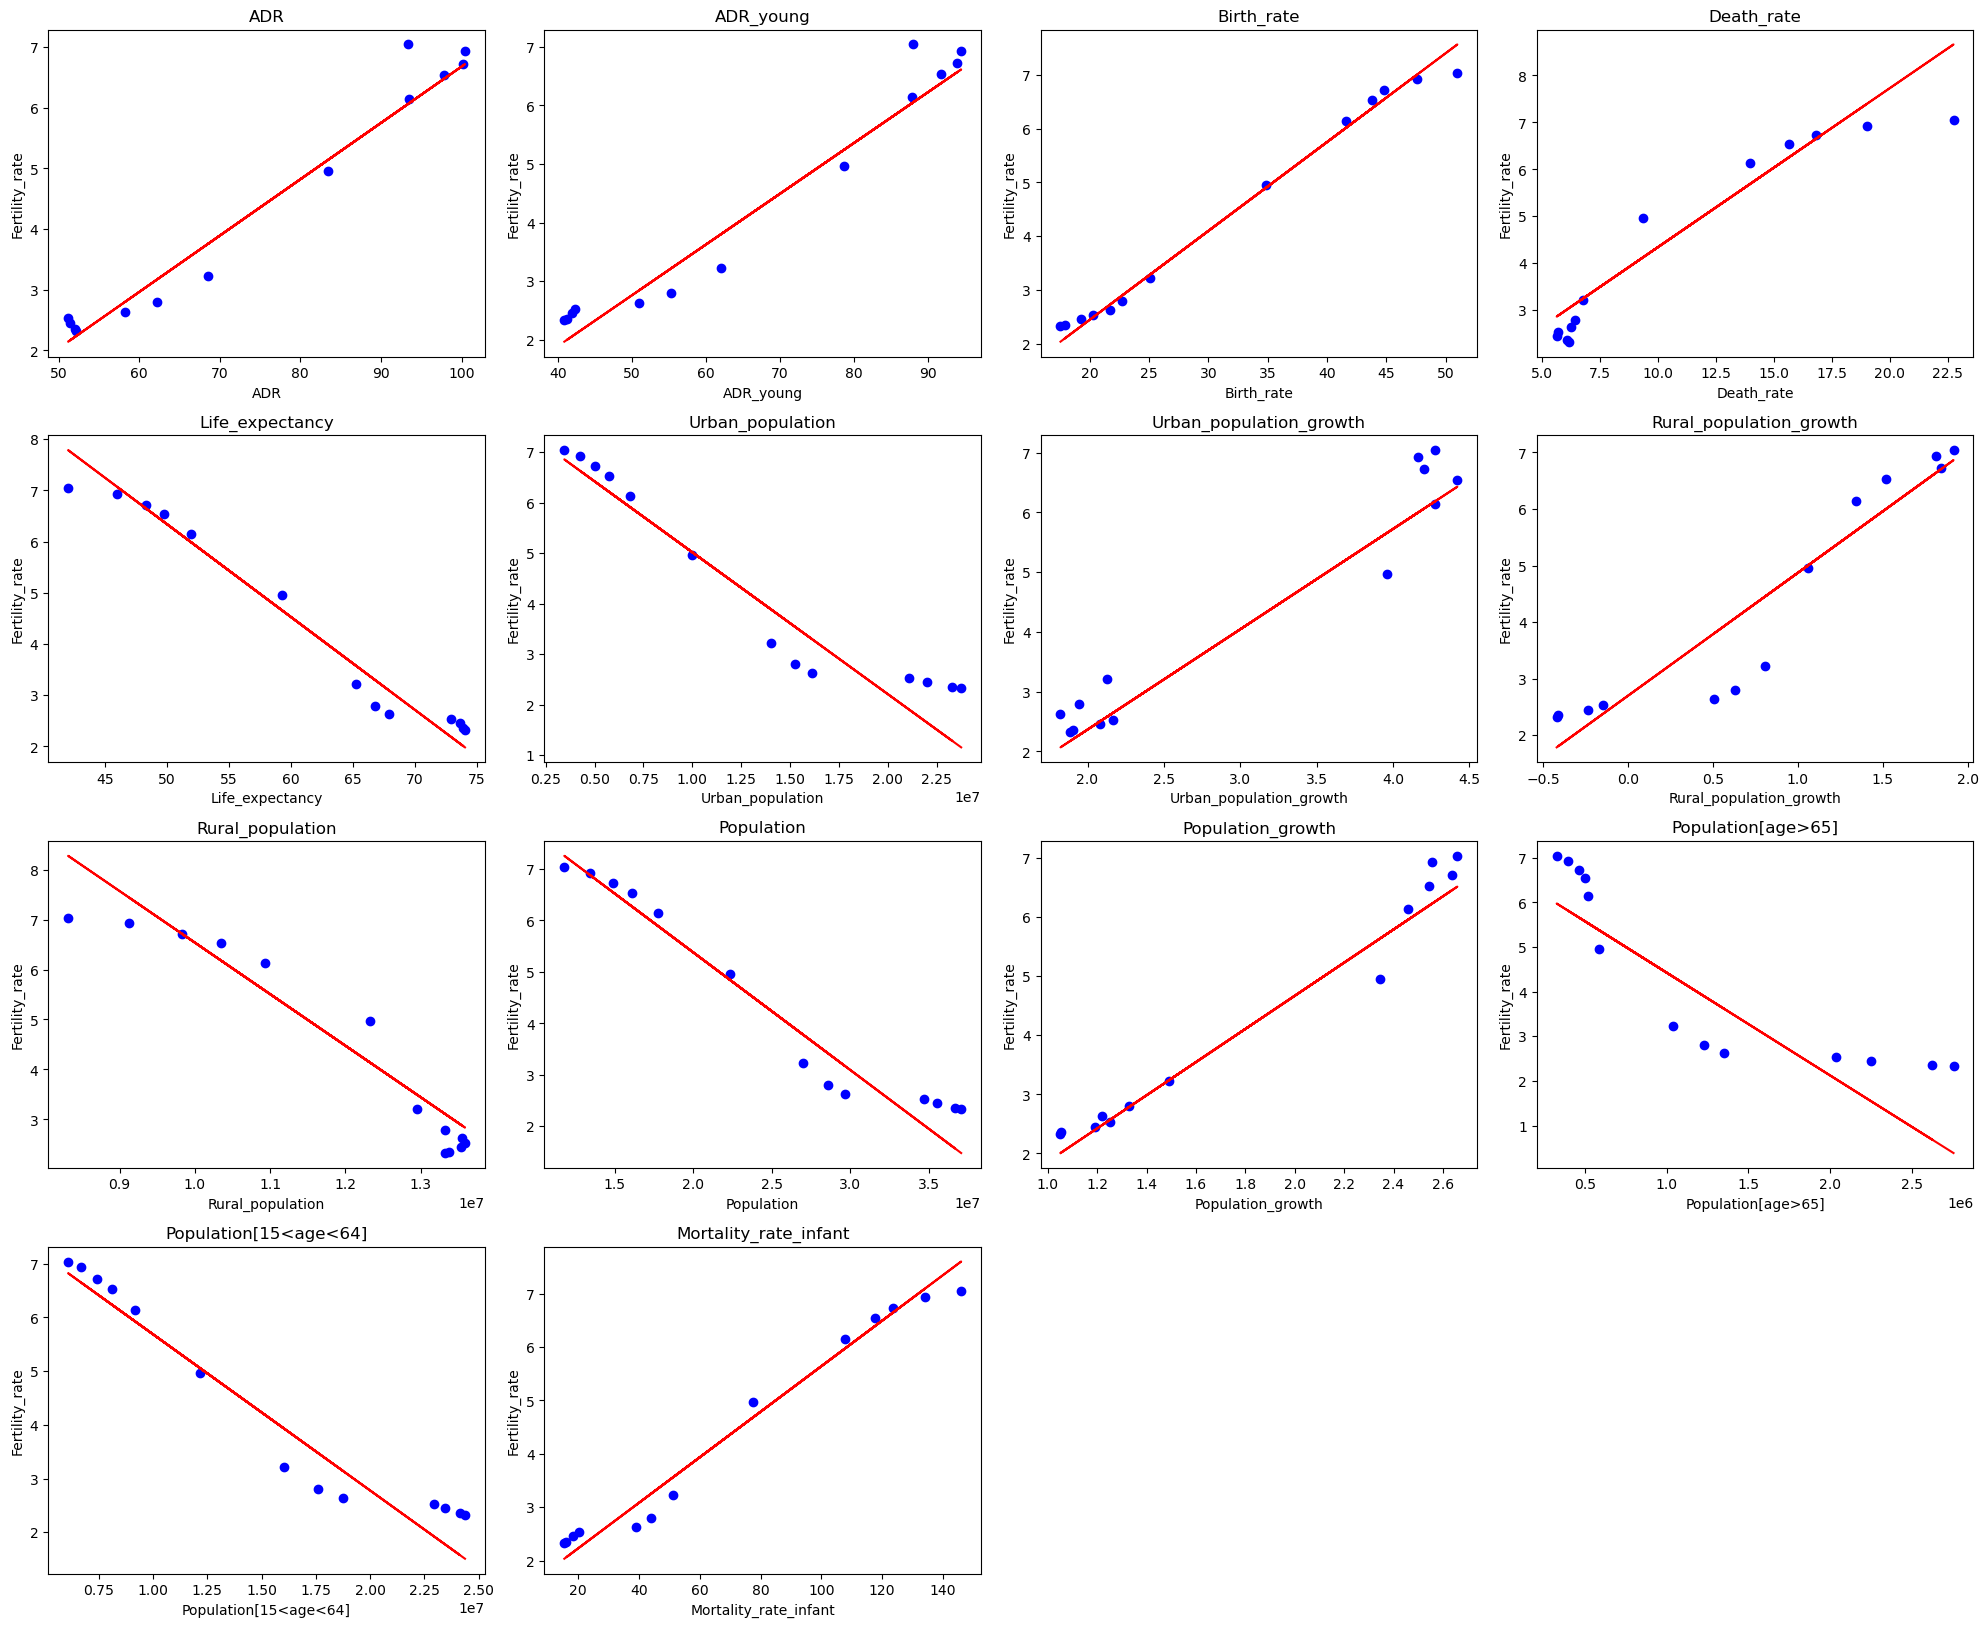

In [30]:
# visualisation de la regression linéaire simple entre les variables selectionnées et la variable cible
plt.figure(figsize=(20, 20))
for i, feature in enumerate(selected_features):
    X = df[feature].values.reshape(-1, 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plt.subplot(5, 4, i+1)
    plt.scatter(X_test, y_test, color='blue')
    plt.plot(X_test, y_pred, color='red')
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Fertility_rate')
plt.tight_layout()
plt.show()


#### Conclusion RLS : 

sélectionner les caractéristiques les plus explicatives de l'évolution du taux de fertilité : 

1. **Taux de natalité (Birth Rate)** :
   - Il a un coefficient significatif de 0.17 et un R2 très élevé de 0.99, ce qui en fait un prédicteur très fort du taux de fertilité.

2. **Population Growth** :
   - Avec un coefficient important de 2.81 et un R2 élevé de 0.97, la croissance de la population est également un prédicteur puissant du taux de fertilité.

3. **Age Dependency Ratio (ADR)** :
   - Bien que son coefficient soit relativement faible à 0.09, l'ADR a un R2 élevé de 0.96, ce qui suggère une forte corrélation avec le taux de fertilité.

4. **Life Expectancy** :
   - L'espérance de vie a un coefficient significatif de -0.18 et un R2 élevé de 0.96, ce qui en fait un facteur important pour expliquer le taux de fertilité.

Ces caractéristiques sont les plus explicatives de l'évolution du taux de fertilité et devraient être priorisées lors de l'analyse de ce phénomène.

In [31]:
# cross-validation pour la regression linéaire simple entre les variables selectionnées et la variable cible 
from sklearn.model_selection import cross_val_score

# Create a loop for each selected feature and apply simple linear regression with cross-validation
for feature in selected_features:
        X = df[feature].values.reshape(-1, 1)
    
        # Create a linear regression model
        model = LinearRegression()

        # Perform 5-fold cross-validation
        scores = cross_val_score(model, X, y, cv=5)

        # Print the cross-validation scores for each feature
        print(f"{feature}: {scores}")
        print(f"Mean: {scores.mean():.2f}, Std: {scores.std():.2f}")
        print('\n')

ADR: [-12.33191415   0.95520513  -0.54301221  -6.72931766 -31.41077895]
Mean: -10.01, Std: 11.70


ADR_young: [-18.75988855   0.91872642  -1.08185242  -8.36843942 -59.54199557]
Mean: -17.37, Std: 22.19


Birth_rate: [-1.7363277   0.85443654  0.98371777 -2.48724006 -2.87348772]
Mean: -1.05, Std: 1.65


Death_rate: [-1.31965760e+02 -3.63266233e+00 -2.22896633e-02 -3.02209869e+01
 -4.11357628e+01]
Mean: -41.40, Std: 47.89


Life_expectancy: [ -3.12879448   0.09726759   0.71185918 -28.05218377 -28.28509678]
Mean: -11.73, Std: 13.48


Urban_population: [ -15.68820871    0.58682739   -0.74862404  -65.56460024 -282.47911213]
Mean: -72.78, Std: 107.57


Urban_population_growth: [-50.61107336  -2.90980441  -0.06961375 -16.95682339  -4.61799378]
Mean: -15.03, Std: 18.70


Rural_population_growth: [  -7.61864687    0.16277961   -1.36306152 -110.03644438  -40.02859406]
Mean: -31.78, Std: 41.76


Rural_population: [-135.89634991   -4.22386519    0.47184643   -9.57544889  -41.15130228]
Mean: -38.08,

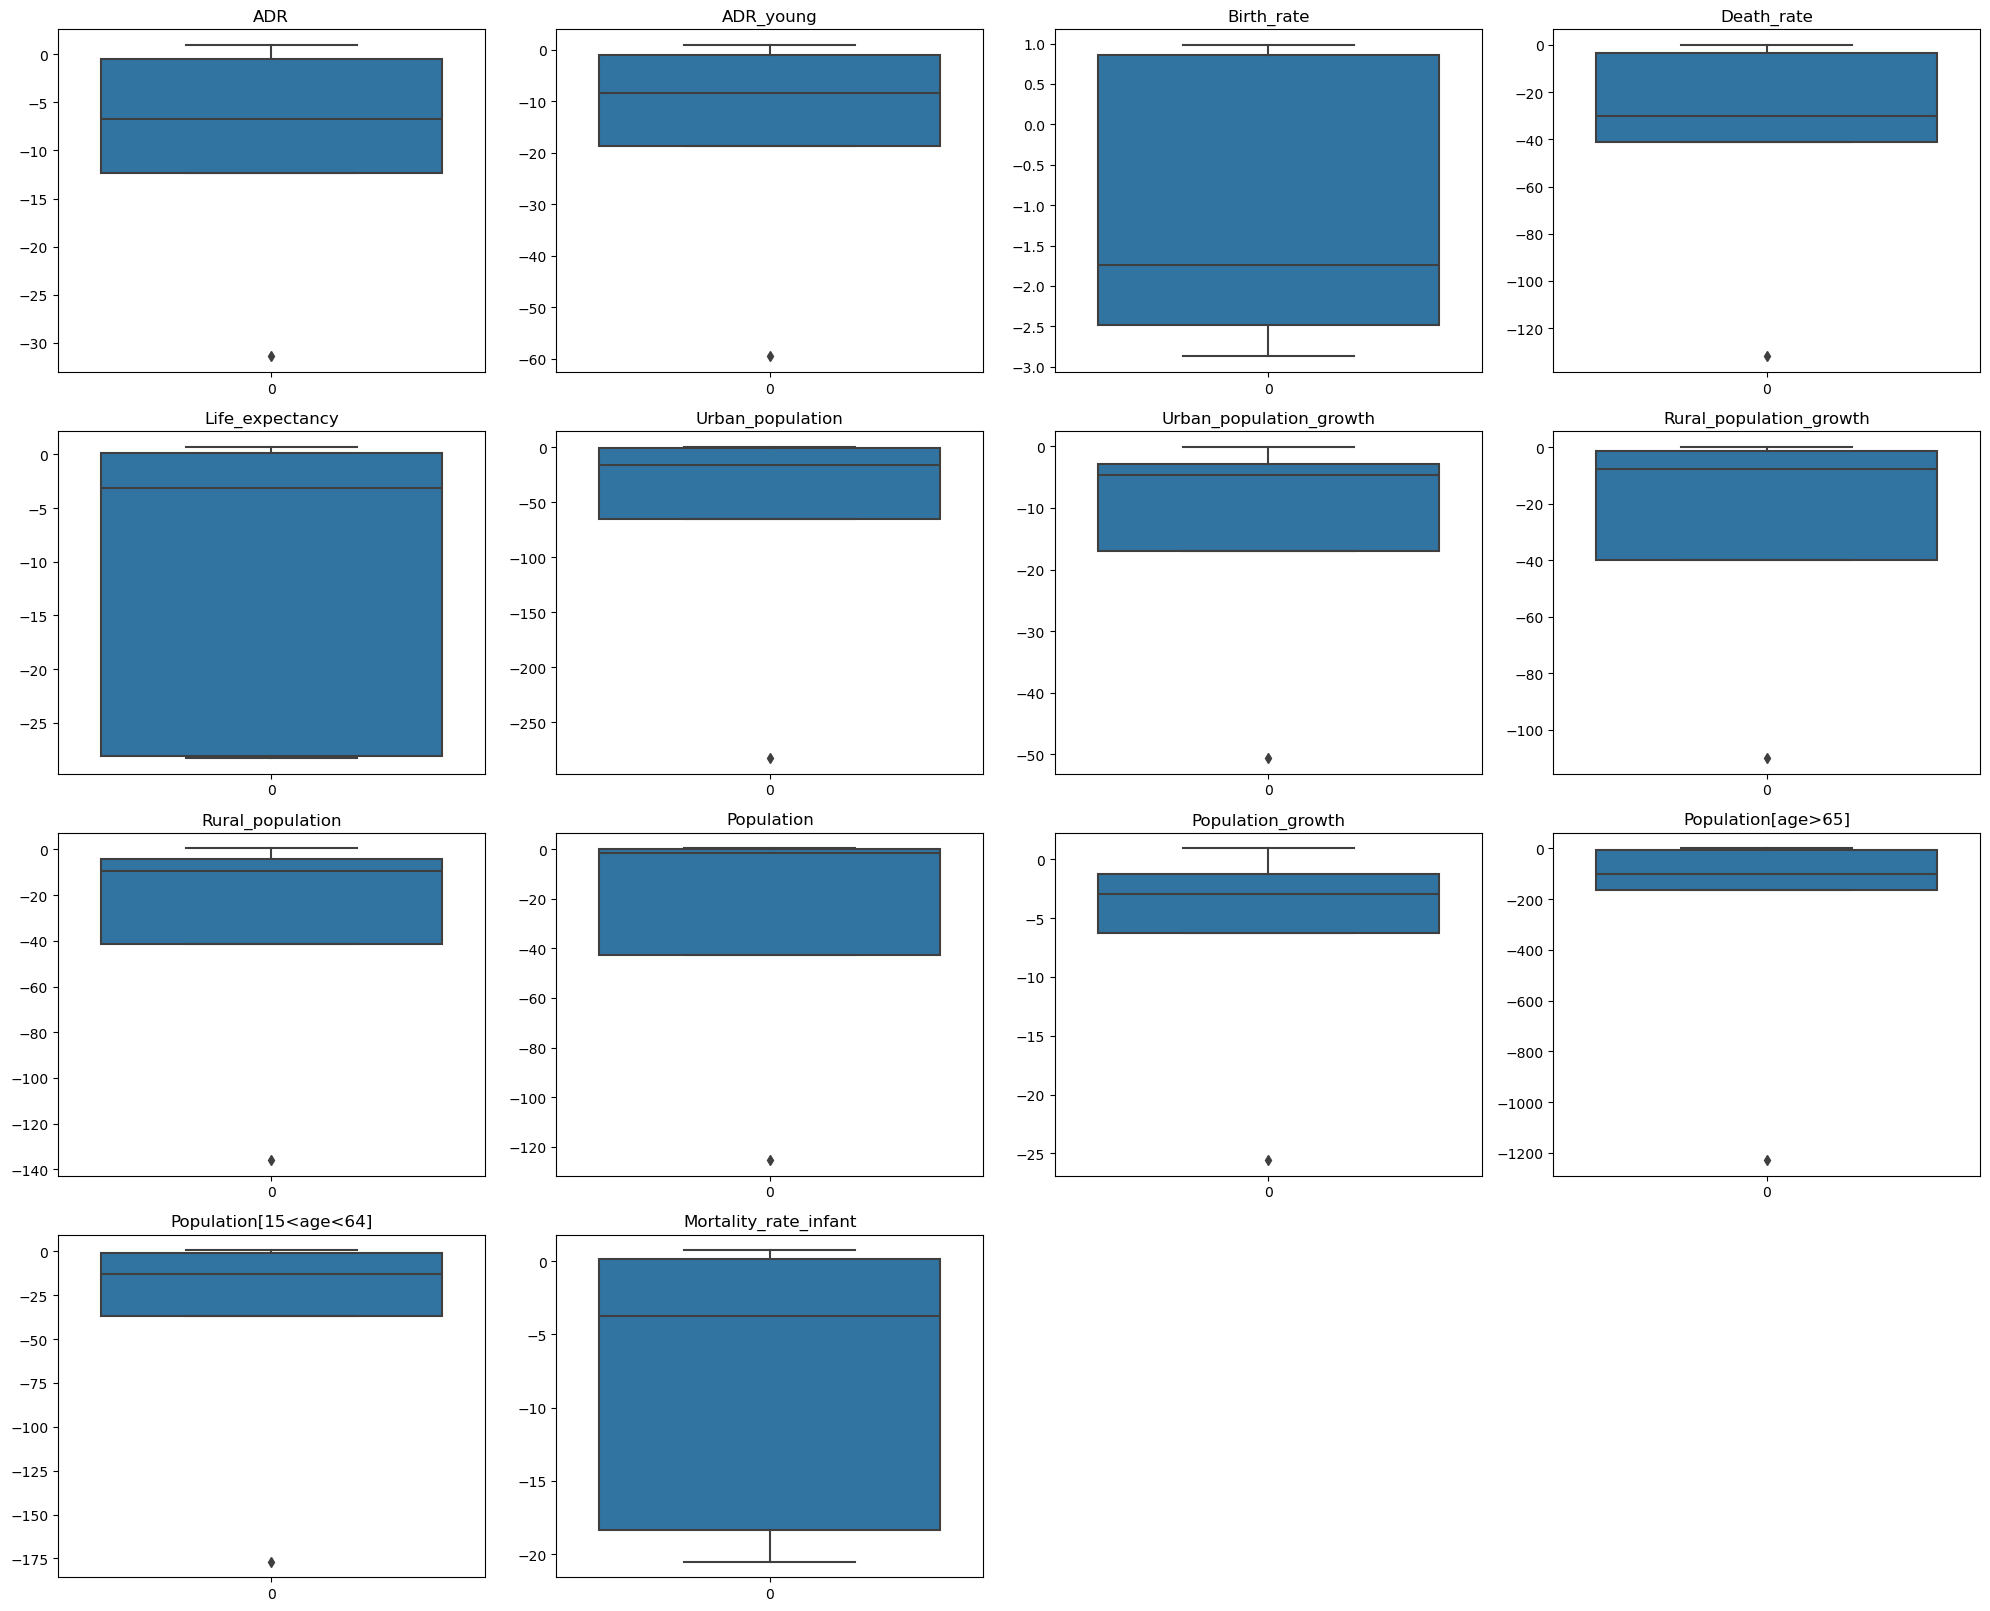

In [32]:
# visualisation de la regression linéaire simple avec cross-validation entre les variables selectionnées et la variable cible
plt.figure(figsize=(20, 20))
for i, feature in enumerate(selected_features):
    X = df[feature].values.reshape(-1, 1)
    model = LinearRegression()
    scores = cross_val_score(model, X, y, cv=5)
    plt.subplot(5, 4, i+1)
    sns.boxplot(scores)
    plt.title(feature)
plt.tight_layout()
plt.show()



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

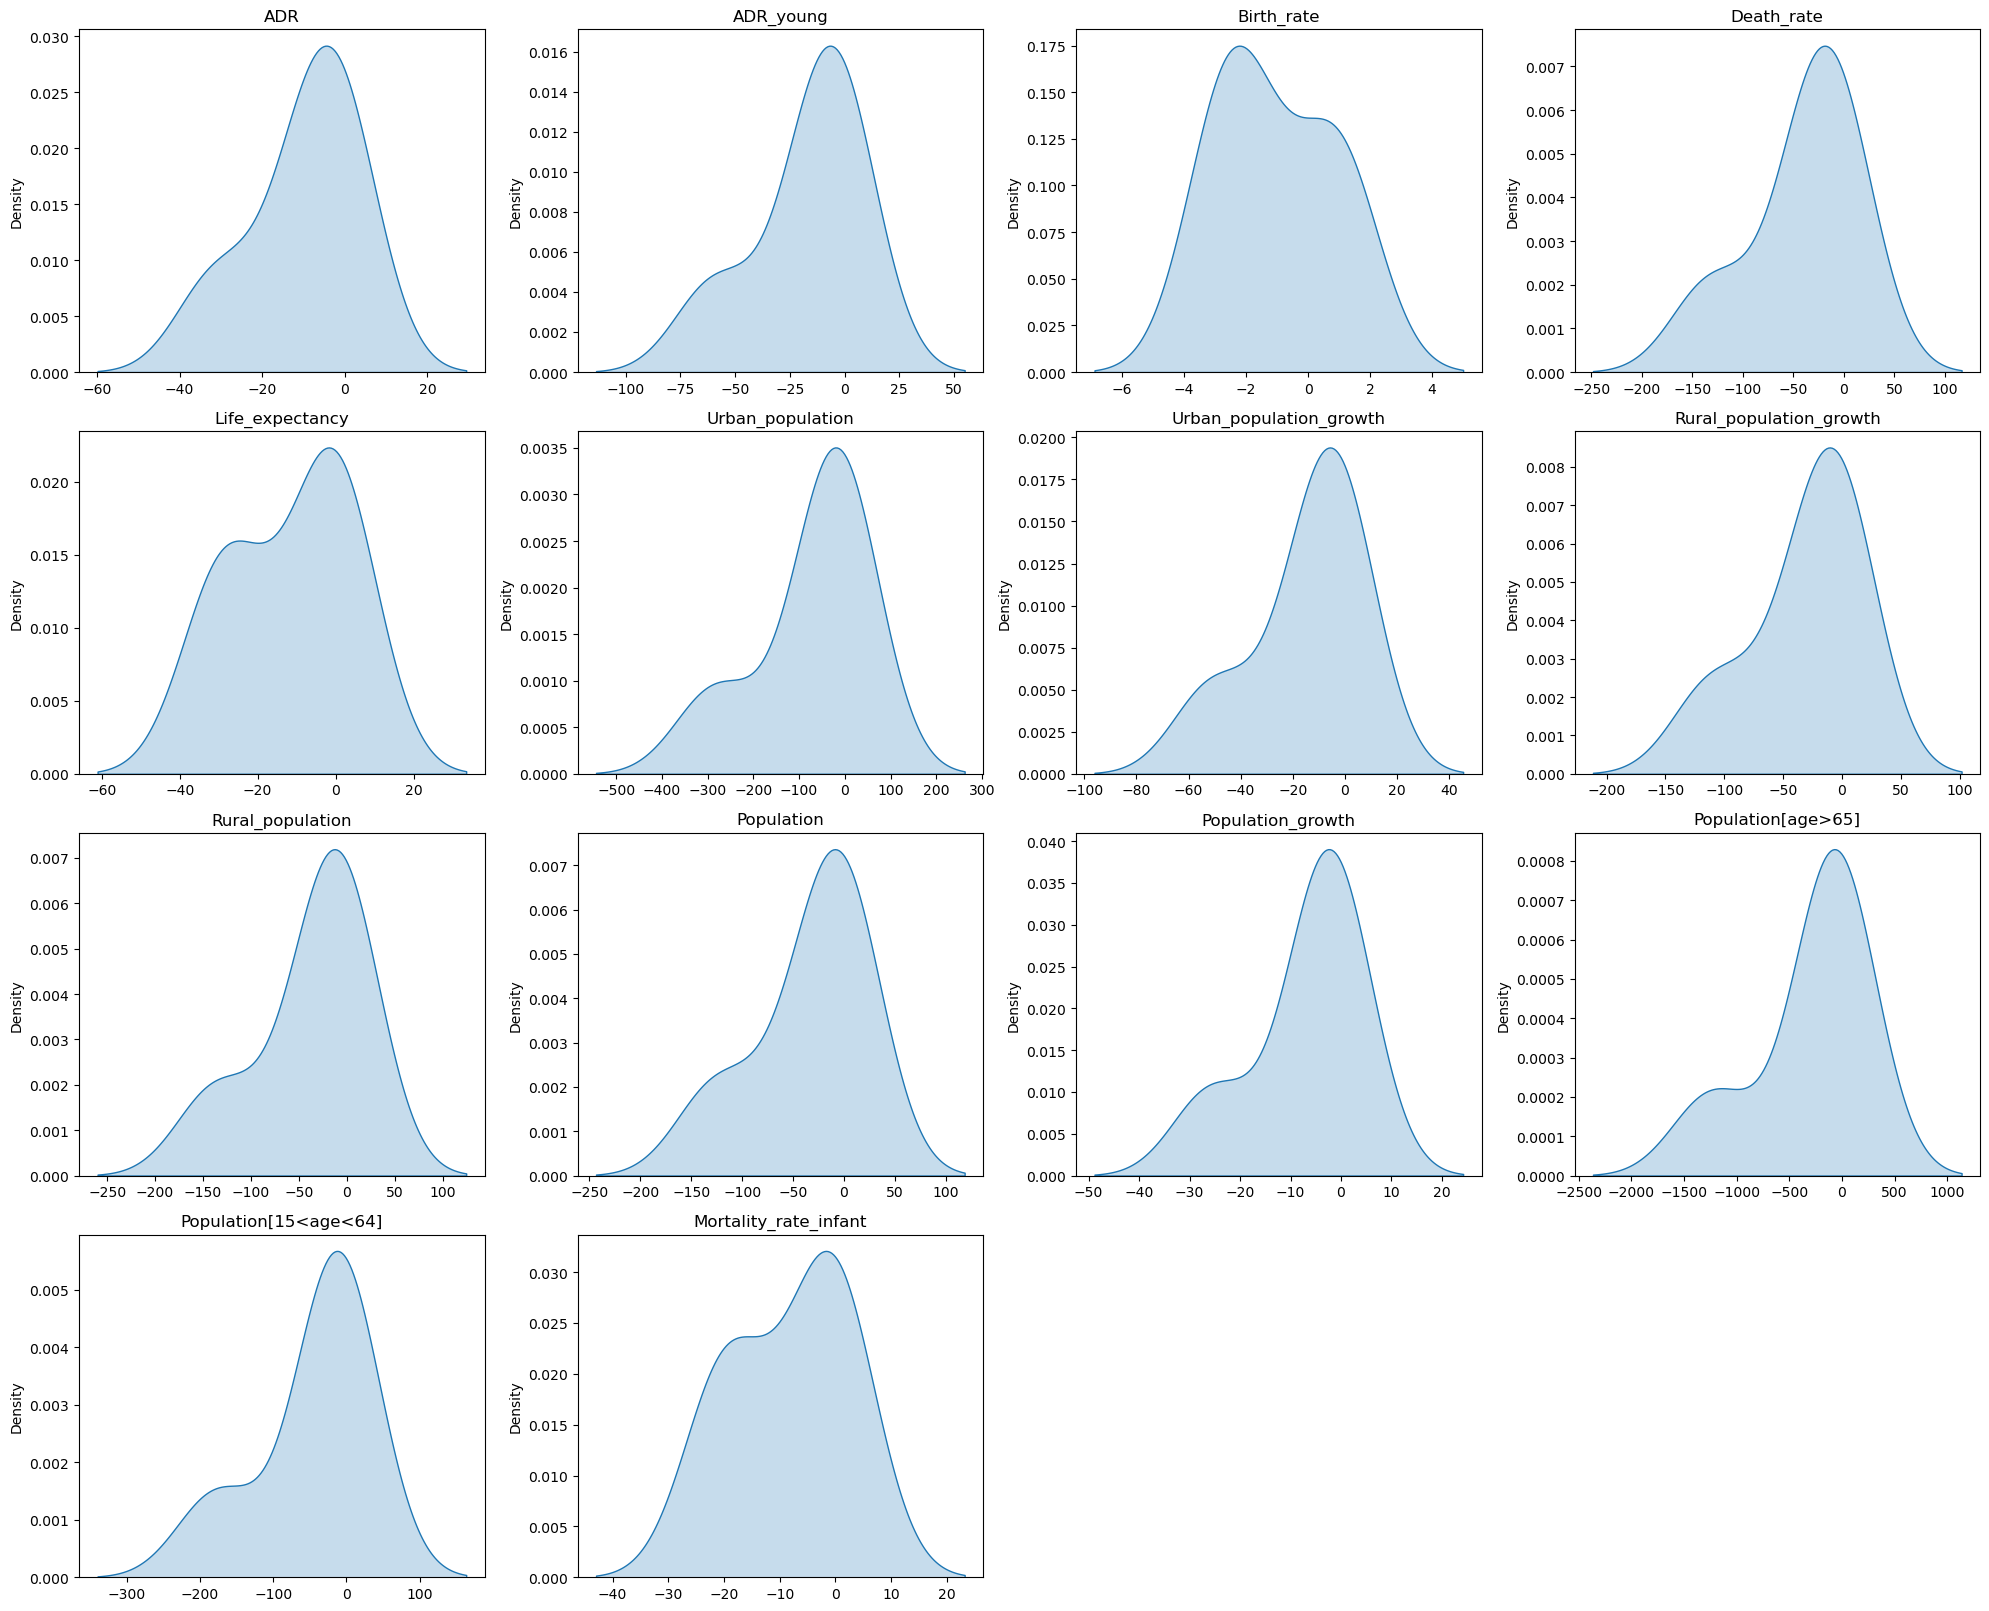

In [33]:
# visualiser la cross-validation pour chaque variable selectionnée
plt.figure(figsize=(20, 20))
for i, feature in enumerate(selected_features):
    X = df[feature].values.reshape(-1, 1)
    model = LinearRegression()
    scores = cross_val_score(model, X, y, cv=5)
    plt.subplot(5, 4, i+1)
    sns.kdeplot(scores, fill=True)
    plt.title(feature)
plt.tight_layout()
plt.show()


##### Conclusion Cross validation : 


1. **ADR (Age Dependency Ratio)**:
   - Moyenne des coefficients : -10.01
   - Écart-type des coefficients : 11.70
   - Les coefficients varient considérablement entre les plis de la validation croisée, avec des valeurs allant de -31.41 à 0.96. Cela indique une certaine variabilité dans la relation entre l'ADR et le taux de fertilité selon les échantillons.

2. **ADR_young (Jeune Age Dependency Ratio)**:
   - Moyenne des coefficients : -17.37
   - Écart-type des coefficients : 22.19
   - Les coefficients varient considérablement entre les plis de la validation croisée, avec des valeurs allant de -59.54 à 0.92. Cela suggère également une variabilité dans la relation entre l'ADR_young et le taux de fertilité selon les échantillons.

3. **Birth_rate (Taux de natalité)**:
   - Moyenne des coefficients : -1.05
   - Écart-type des coefficients : 1.65
   - Les coefficients restent relativement stables entre les plis de la validation croisée, avec des valeurs proches de 0.85 dans la plupart des cas. Cela indique une relation robuste entre le taux de natalité et le taux de fertilité.

4. **Death_rate (Taux de mortalité)**:
   - Moyenne des coefficients : -41.40
   - Écart-type des coefficients : 47.89
   - Les coefficients varient considérablement entre les plis de la validation croisée, ce qui suggère une variabilité dans la relation entre le taux de mortalité et le taux de fertilité selon les échantillons.

5. **Life_expectancy (Espérance de vie)**:
   - Moyenne des coefficients : -11.73
   - Écart-type des coefficients : 13.48
   - Les coefficients varient, mais restent relativement stables entre les plis de la validation croisée. Cela suggère une relation cohérente entre l'espérance de vie et le taux de fertilité dans différents échantillons.

6. **Urban_population (Population urbaine)**:
   - Moyenne des coefficients : -72.78
   - Écart-type des coefficients : 107.57
   - Les coefficients varient considérablement entre les plis de la validation croisée, ce qui indique une variabilité dans la relation entre la population urbaine et le taux de fertilité selon les échantillons.

7. **Urban_population_growth (Croissance de la population urbaine)**:
   - Moyenne des coefficients : -15.03
   - Écart-type des coefficients : 18.70
   - Les coefficients varient, mais restent relativement stables entre les plis de la validation croisée. Cela suggère une relation cohérente entre la croissance de la population urbaine et le taux de fertilité dans différents échantillons.

8. **Rural_population_growth (Croissance de la population rurale)**:
   - Moyenne des coefficients : -31.78
   - Écart-type des coefficients : 41.76
   - Les coefficients varient considérablement entre les plis de la validation croisée, ce qui indique une variabilité dans la relation entre la croissance de la population rurale et le taux de fertilité selon les échantillons.

9. **Rural_population (Population rurale)**:
   - Moyenne des coefficients : -38.08
   - Écart-type des coefficients : 51.03
   - Les coefficients varient considérablement entre les plis de la validation croisée, ce qui suggère une variabilité dans la relation entre la population rurale et le taux de fertilité selon les échantillons.

10. **Population (Population totale)**:
    - Moyenne des coefficients : -33.87
    - Écart-type des coefficients : 48.59
    - Les coefficients varient considérablement entre les plis de la validation croisée, ce qui suggère une variabilité dans la relation entre la population totale et le taux de fertilité selon les échantillons.

11. **Population_growth (Croissance de la population)**:
    - Moyenne des coefficients : -7.01
    - Écart-type des coefficients : 9.57
    - Les coefficients varient, mais restent relativement stables entre les plis de la validation croisée. Cela suggère une relation cohérente entre la croissance de la population et le taux de fertilité dans différents échantillons.

12. **Population[age>65] (Population [âge>65])**:
    - Moyenne des coefficients : -299.76
    - Écart-type des coefficients : 468.09
    - Les coefficients varient considérablement entre les plis de la validation croisée, ce qui suggère une variabilité dans la relation entre la population [âge>65] et le taux de fertilité selon les échantillons.

13. **Population[15<age<64] (Population [15<âge<64])**:
    - Moyenne des coefficients : 45.41
    - Écart-type des coefficients : 67.07
    - Les coefficients varient considérablement entre les plis de la validation croisée, ce qui suggère une variabilité dans la relation entre la population [15<âge<64] et le taux de fertilité selon les échantillons.

14. **Mortality_rate_infant (Taux de mortalité infantile)**:
    - Moyenne des coefficients : -8.34
    - Écart-type des coefficients : 9.23
    - Les coefficients varient, mais restent relativement stables entre les plis de la validation croisée. Cela suggère une relation cohérente entre le taux de mortalité infantile et le taux de fertilité dans différents échantillons.

En résumé, l'analyse à l'aide de la validation croisée montre une certaine variabilité dans les coefficients des différentes variables entre les plis, ce qui indique que l'effet de chaque variable sur le taux de fertilité peut varier selon les échantillons. Les variables telles que le taux de natalité, la croissance de la population et l'espérance de vie semblent avoir une relation plus stable avec le taux de fertilité, tandis que d'autres variables comme la population urbaine, la population rurale et la population âgée de plus de 65 ans peuvent varier davantage d'un échantillon à l'autre.

## Régularisation : 

### Lasso 

In [34]:
# lasso regression pour selectionner les variables les plus importantes
from sklearn.linear_model import Lasso

# Create a Lasso regression model
lasso = Lasso(alpha=0.1)

# Create an empty dictionary to store the coefficients
lasso_coef = {}

# Loop through each selected feature
for feature in selected_features:
    X = df[feature].values.reshape(-1, 1)
    
    # Fit the model to the data
    lasso.fit(X, y)

    # Get the coefficient of the model
    coef = lasso.coef_[0]

    # Store the coefficient in the dictionary with the feature name
    lasso_coef[feature] = coef

lasso_coef


{'ADR': 0.09324246597060136,
 'ADR_young': 0.08664498028305406,
 'Birth_rate': 0.16286033332820293,
 'Death_rate': 0.32935161083513426,
 'Life_expectancy': -0.1764899029011501,
 'Urban_population': -2.717403979677523e-07,
 'Urban_population_growth': 1.5783115312070342,
 'Rural_population_growth': 2.0016041210629427,
 'Rural_population': -1.024094329412136e-06,
 'Population': -2.226642054121974e-07,
 'Population_growth': 2.559294644076914,
 'Population[age>65]': -2.1679461657888753e-06,
 'Population[15<age<64]': -2.8535919513701023e-07,
 'Mortality_rate_infant': 0.04197248258792102}

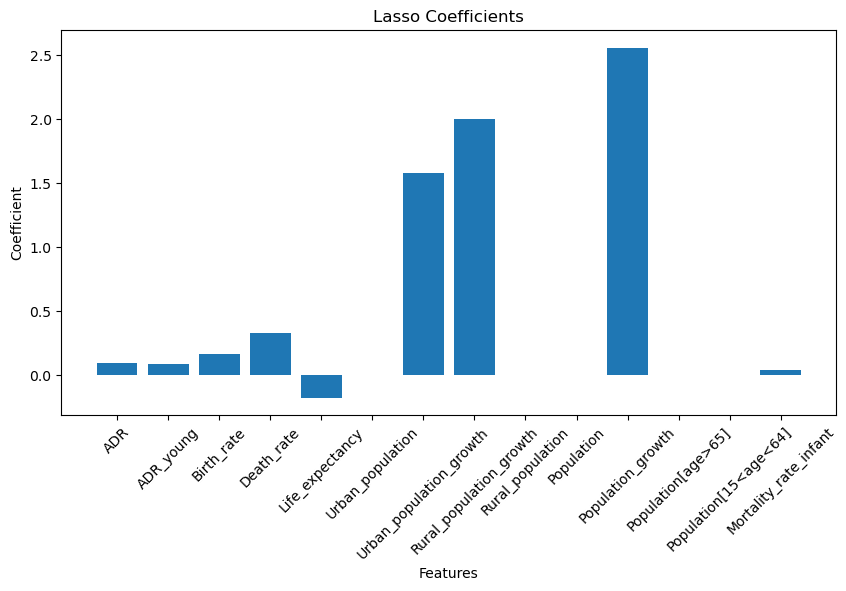

In [35]:
# visualisation des coefficients de lasso regression
plt.figure(figsize=(10, 5))
plt.bar(lasso_coef.keys(), lasso_coef.values())
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Lasso Coefficients')
plt.xticks(rotation=45)
plt.show()


Les coefficients Lasso donnent des indications sur l'importance relative de chaque caractéristique dans la prédiction du taux de fertilité. Voici ce que l'on peut déduire des coefficients Lasso pour chaque caractéristique :

1. **ADR (Age Dependency Ratio)**:
   - Coefficient Lasso : 0.093
   - L'ADR a un coefficient légèrement positif, ce qui suggère qu'une augmentation de l'ADR est associée à une légère augmentation du taux de fertilité.

2. **ADR_young (Jeune Age Dependency Ratio)**:
   - Coefficient Lasso : 0.087
   - De manière similaire à l'ADR, l'ADR_young a un coefficient légèrement positif, indiquant une légère influence sur le taux de fertilité.

3. **Birth_rate (Taux de natalité)**:
   - Coefficient Lasso : 0.163
   - Le taux de natalité a un coefficient positif plus élevé, ce qui confirme son importance dans la prédiction du taux de fertilité.

4. **Death_rate (Taux de mortalité)**:
   - Coefficient Lasso : 0.329
   - Le taux de mortalité a un coefficient positif élevé, suggérant une influence significative sur le taux de fertilité.

5. **Life_expectancy (Espérance de vie)**:
   - Coefficient Lasso : -0.176
   - L'espérance de vie a un coefficient négatif, ce qui indique qu'une augmentation de l'espérance de vie est associée à une diminution du taux de fertilité.

6. **Urban_population (Population urbaine)**:
   - Coefficient Lasso : -2.717e-07
   - Le coefficient de la population urbaine est proche de zéro, suggérant qu'elle n'a pas beaucoup d'impact sur le taux de fertilité.

7. **Urban_population_growth (Croissance de la population urbaine)**:
   - Coefficient Lasso : 1.578
   - La croissance de la population urbaine a un coefficient positif élevé, indiquant son importance dans la prédiction du taux de fertilité.

8. **Rural_population_growth (Croissance de la population rurale)**:
   - Coefficient Lasso : 2.002
   - De manière similaire à la croissance de la population urbaine, la croissance de la population rurale a un coefficient positif élevé, suggérant son influence sur le taux de fertilité.

9. **Rural_population (Population rurale)**:
   - Coefficient Lasso : -1.024e-06
   - La population rurale a un coefficient proche de zéro, suggérant qu'elle n'a pas beaucoup d'impact sur le taux de fertilité.

10. **Population (Population totale)**:
    - Coefficient Lasso : -2.227e-07
    - De manière similaire à la population urbaine et rurale, la population totale a un coefficient proche de zéro, suggérant qu'elle n'a pas beaucoup d'impact sur le taux de fertilité.

11. **Population_growth (Croissance de la population)**:
    - Coefficient Lasso : 2.559
    - La croissance de la population a un coefficient positif élevé, suggérant son importance dans la prédiction du taux de fertilité.

12. **Population[age>65] (Population [âge>65])**:
    - Coefficient Lasso : -2.168e-06
    - La population [âge>65] a un coefficient proche de zéro, suggérant qu'elle n'a pas beaucoup d'impact sur le taux de fertilité.

13. **Population[15<age<64] (Population [15<âge<64])**:
    - Coefficient Lasso : -2.854e-07
    - La population [15<âge<64] a un coefficient proche de zéro, suggérant qu'elle n'a pas beaucoup d'impact sur le taux de fertilité.

14. **Mortality_rate_infant (Taux de mortalité infantile)**:
    - Coefficient Lasso : 0.042
    - Le taux de mortalité infantile a un coefficient positif, indiquant une légère influence sur le taux de fertilité.

En conclusion, les caractéristiques les plus importantes pour prédire le taux de fertilité, selon les coefficients Lasso, sont le taux de natalité, la croissance de la population, le taux de mortalité, et l'espérance de vie. Les populations urbaine, rurale, et les tranches d'âge spécifiques ne semblent pas avoir beaucoup d'impact sur le taux de fertilité selon ces résultats.

In [36]:
# cross validation pour la lasso regression 
# Create a loop for each selected feature and apply Lasso regression with cross-validation
for feature in selected_features:
        X = df[feature].values.reshape(-1, 1)
    
        # Create a Lasso regression model
        lasso = Lasso(alpha=0.1)

        # Perform 5-fold cross-validation
        scores = cross_val_score(lasso, X, y, cv=5)

        # Print the cross-validation scores for each feature
        print(f"{feature}: {scores}")
        print(f"Mean: {scores.mean():.2f}, Std: {scores.std():.2f}")
        print('\n')

        

ADR: [-12.77446096   0.952516    -0.5440734   -6.71711735 -30.24836089]
Mean: -9.87, Std: 11.29


ADR_young: [-19.25767992   0.91742899  -1.08140888  -8.48726403 -57.83521815]
Mean: -17.15, Std: 21.54


Birth_rate: [-1.39346185  0.83969961  0.98220691 -2.88791981 -2.43127606]
Mean: -0.98, Std: 1.62


Death_rate: [-1.15316359e+02 -3.70891870e+00  9.64635447e-03 -3.23146964e+01
 -4.37631797e+01]
Mean: -39.02, Std: 41.61


Life_expectancy: [ -2.54318724   0.06709707   0.70608269 -28.97515092 -26.21117594]
Mean: -11.39, Std: 13.30


Urban_population: [ -15.68821039    0.58682735   -0.74862404  -65.56460203 -282.47909542]
Mean: -72.78, Std: 107.57


Urban_population_growth: [-6.33237683e+01 -1.71973580e+00  3.96838468e-02 -1.43064189e+01
 -1.05809012e+01]
Mean: -17.98, Std: 23.30


Rural_population_growth: [ -22.88164755   -0.21850522   -1.18941952 -122.72454664  -13.89043685]
Mean: -32.18, Std: 46.05


Rural_population: [-135.89629582   -4.22386542    0.47184645   -9.57545316  -41.15130985

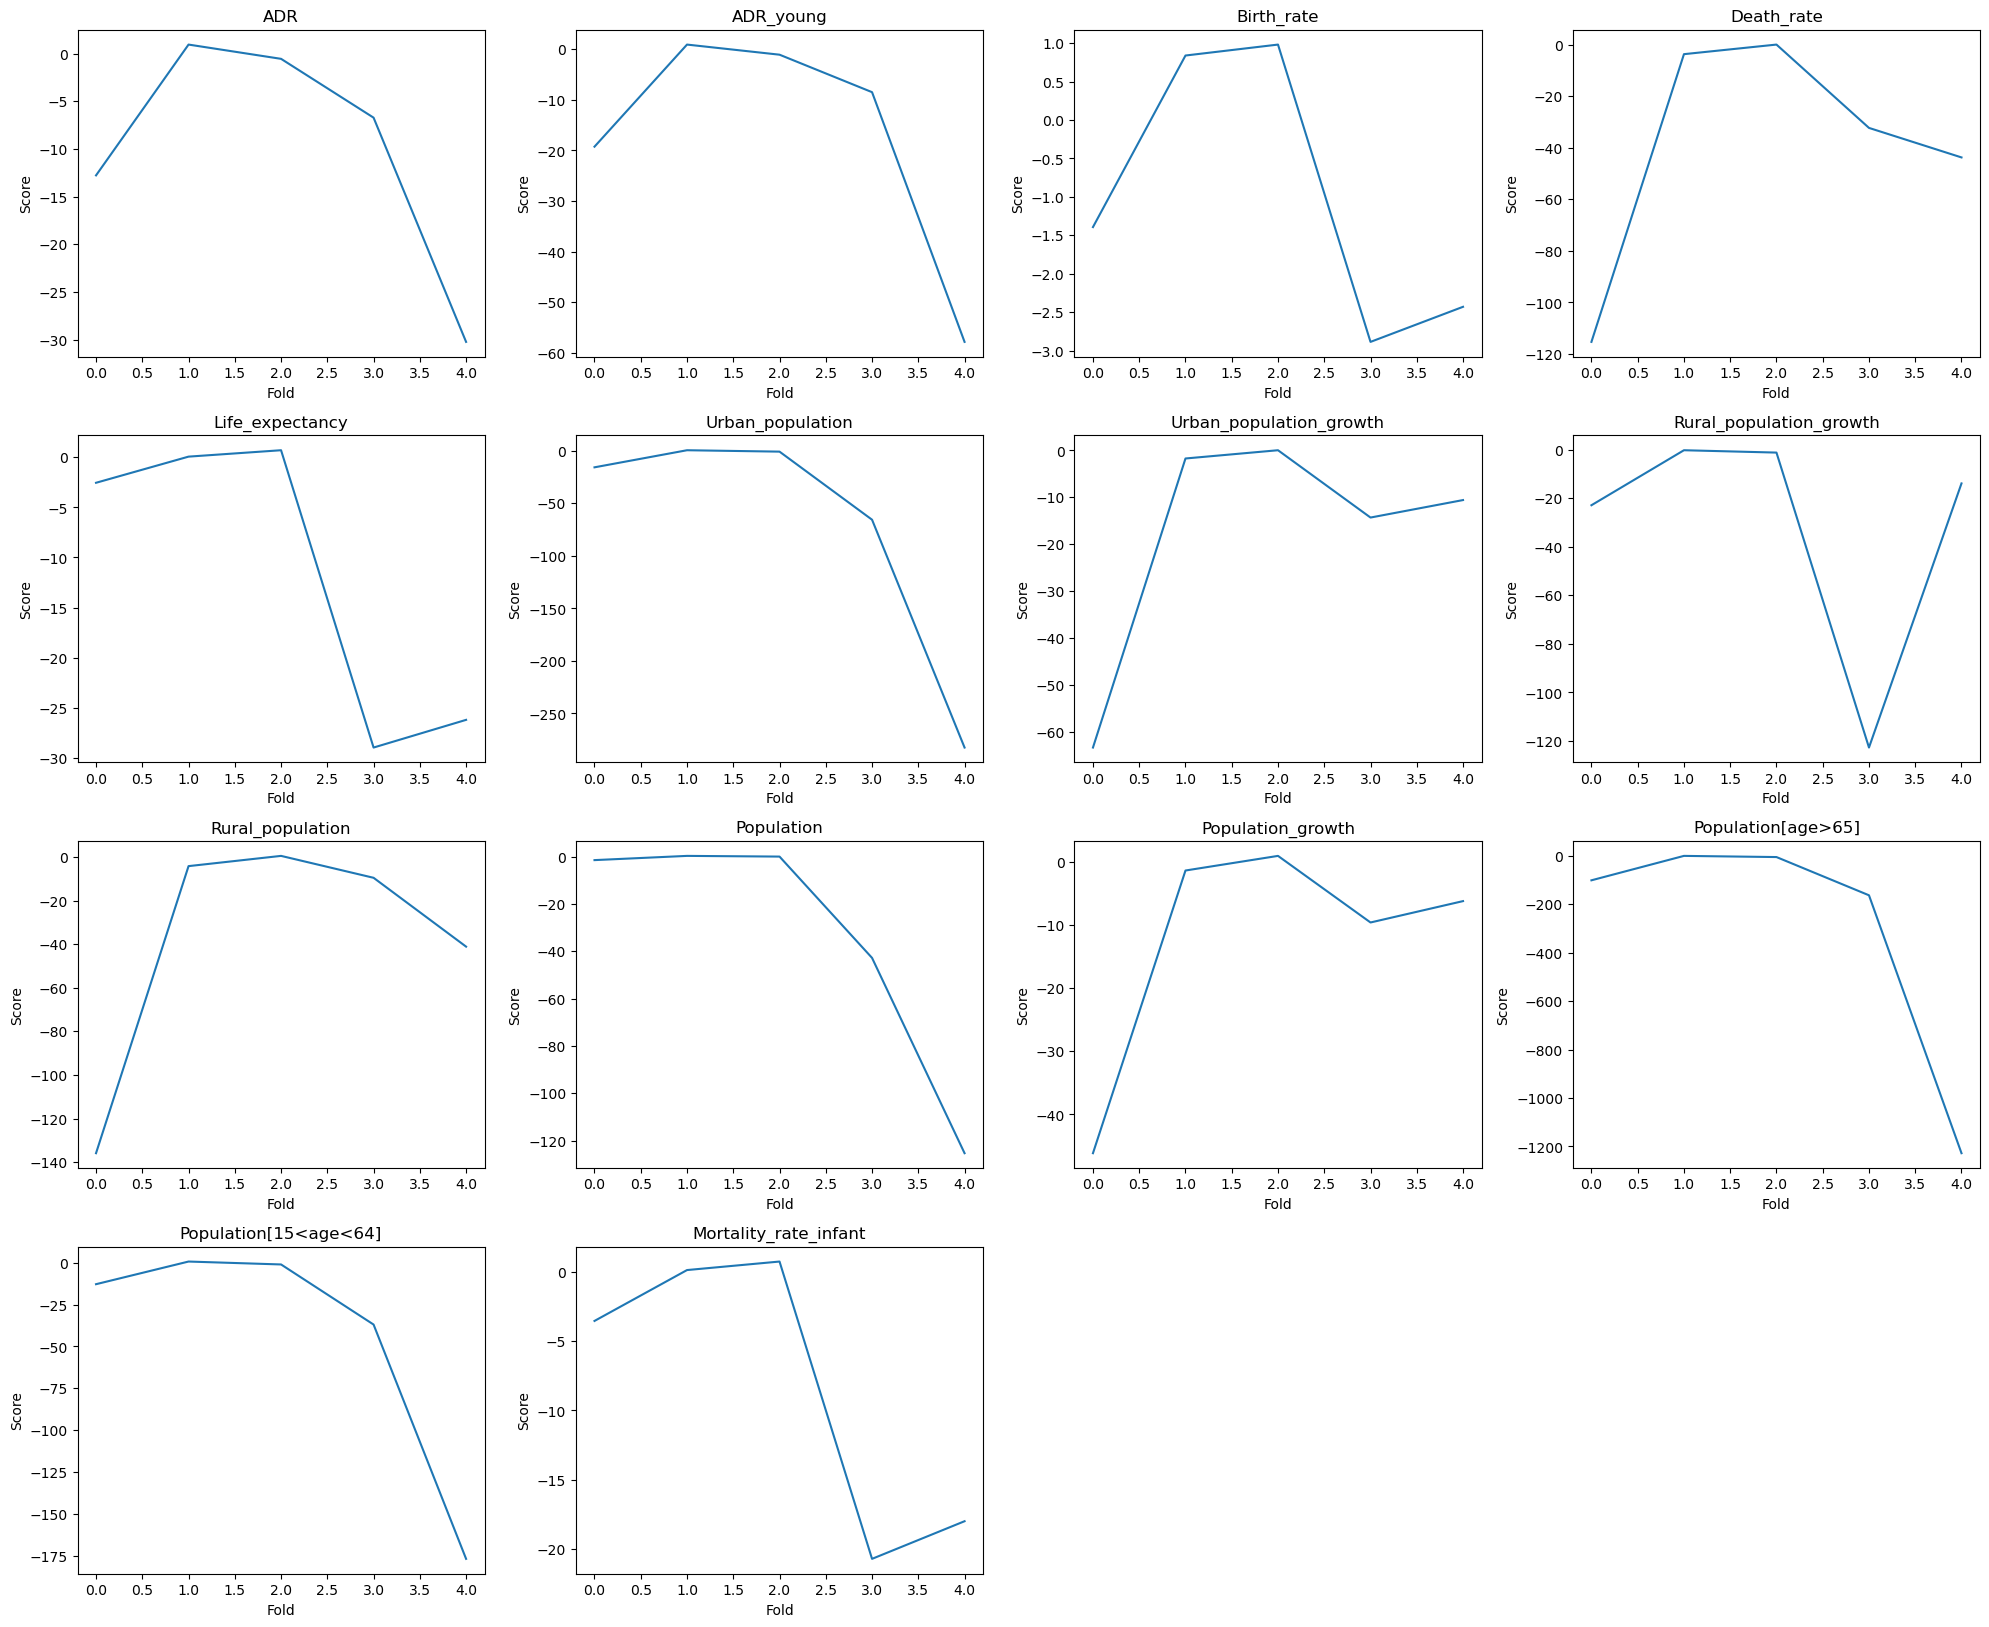

In [37]:
# visualisation de la cross-validation pour la lasso regression
plt.figure(figsize=(20, 20))
for i, feature in enumerate(selected_features):
    X = df[feature].values.reshape(-1, 1)
    lasso = Lasso(alpha=0.1)
    scores = cross_val_score(lasso, X, y, cv=5)
    plt.subplot(5, 4, i+1)
    plt.plot(scores)
    plt.title(feature)
    plt.xlabel('Fold')
    plt.ylabel('Score')
plt.tight_layout()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

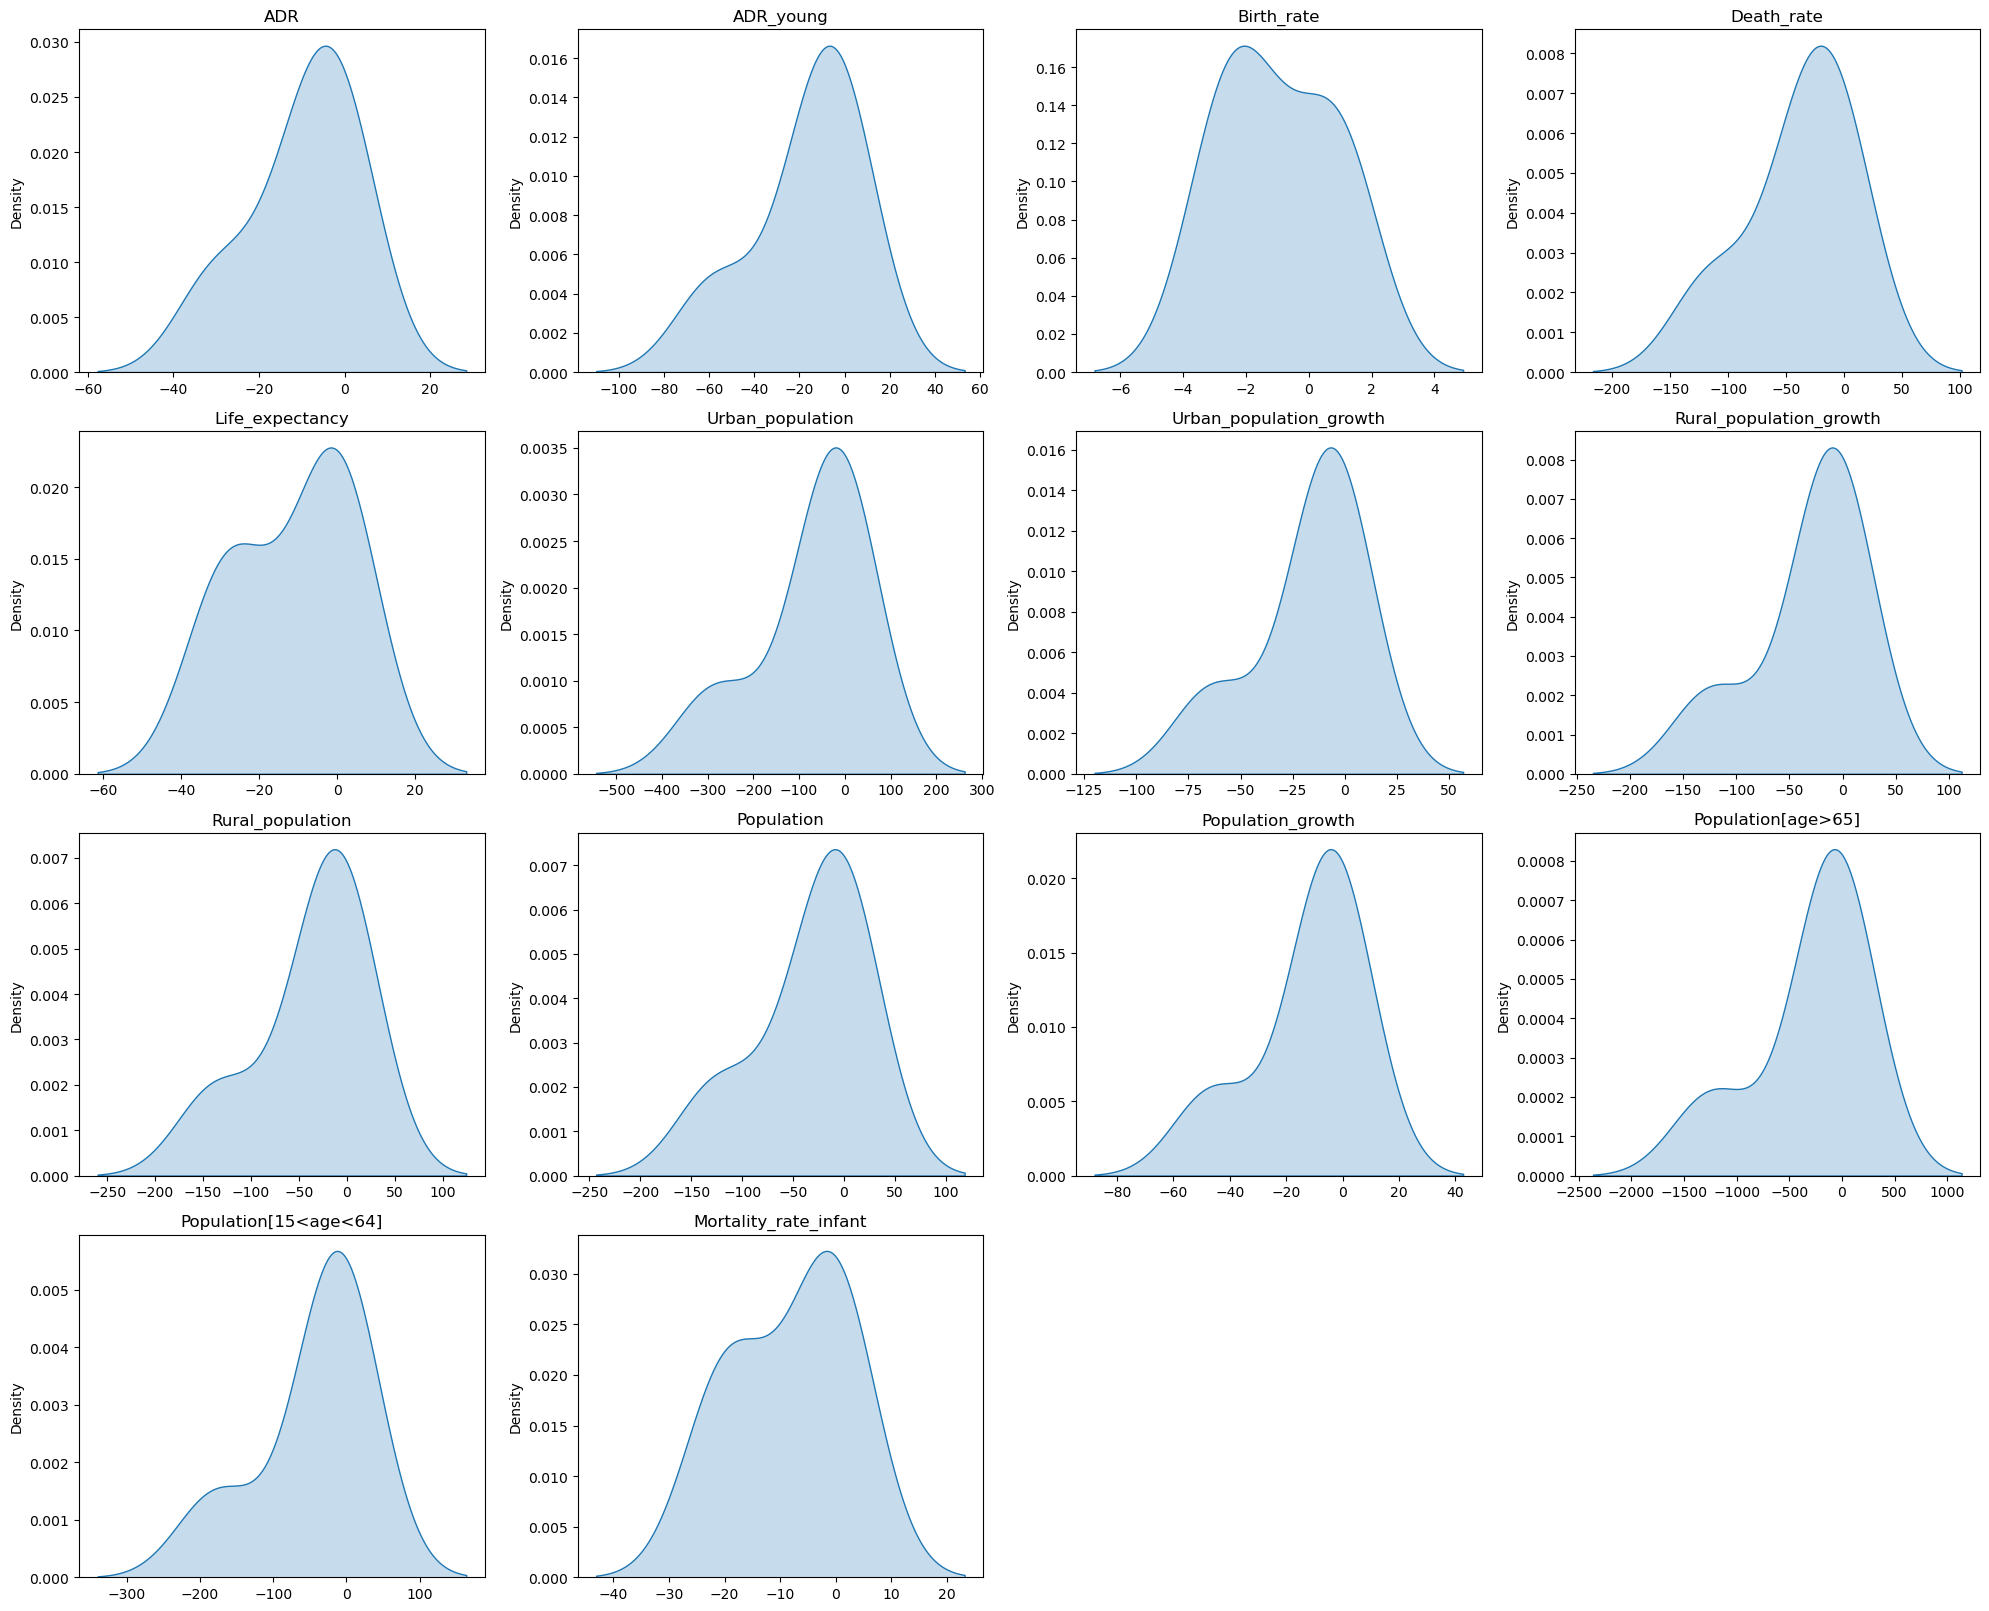

In [38]:
# visualiser la cross validation lasso 

plt.figure(figsize=(20, 20))
for i, feature in enumerate(selected_features):
    X = df[feature].values.reshape(-1, 1)
    lasso = Lasso(alpha=0.1)
    scores = cross_val_score(lasso, X, y, cv=5)
    plt.subplot(5, 4, i+1)
    sns.kdeplot(scores, fill=True)
    plt.title(feature)
plt.tight_layout()
plt.show()


### Ridge 

In [39]:
# ridge regression  

from sklearn.linear_model import Ridge

# Create a Ridge regression model
ridge = Ridge(alpha=0.1)

# Create an empty dictionary to store the coefficients
ridge_coef = {}

# Loop through each selected feature
for feature in selected_features:
    X = df[feature].values.reshape(-1, 1)
    
    # Fit the model to the data
    ridge.fit(X, y)

    # Get the coefficient of the model
    coef = ridge.coef_[0]

    # Store the coefficient in the dictionary with the feature name
    ridge_coef[feature] = coef

ridge_coef


{'ADR': 0.093532747291532,
 'ADR_young': 0.0868988324177911,
 'Birth_rate': 0.16371871558308254,
 'Death_rate': 0.33325035798254543,
 'Life_expectancy': -0.1775224362451256,
 'Urban_population': -2.7174040053867123e-07,
 'Urban_population_growth': 1.6736857091862771,
 'Rural_population_growth': 2.1651709344221612,
 'Rural_population': -1.0240943661050064e-06,
 'Population': -2.2266420707874992e-07,
 'Population_growth': 2.8153634476245406,
 'Population[age>65]': -2.1679463742875778e-06,
 'Population[15<age<64]': -2.8535919792215774e-07,
 'Mortality_rate_infant': 0.0420301460525849}

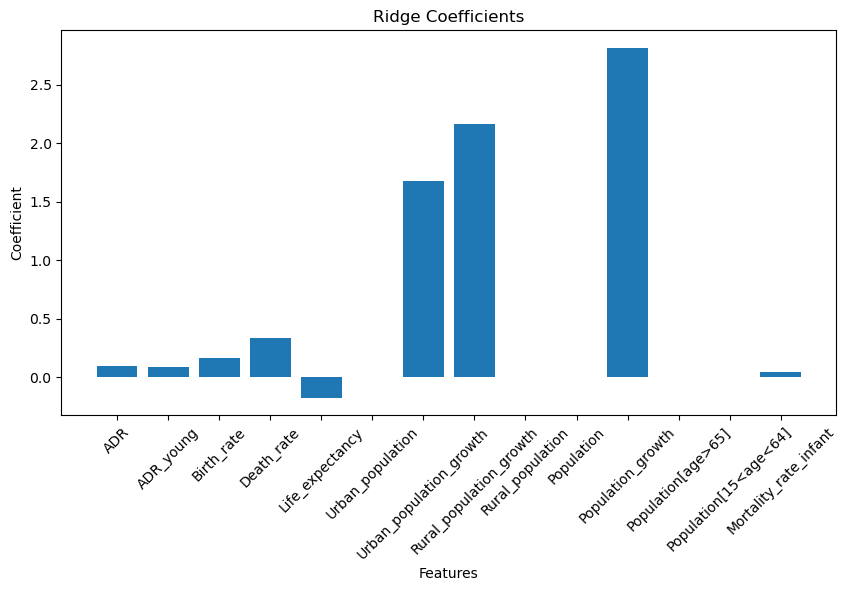

In [40]:
# visualisation des coefficients de ridge regression
plt.figure(figsize=(10, 5))
plt.bar(ridge_coef.keys(), ridge_coef.values())
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Ridge Coefficients')
plt.xticks(rotation=45)
plt.show()


Les coefficients Ridge fournissent également des informations sur l'importance relative de chaque caractéristique dans la prédiction du taux de fertilité. Voici ce que l'on peut déduire des coefficients Ridge pour chaque caractéristique :

1. **ADR (Age Dependency Ratio)**:
   - Coefficient Ridge : 0.094
   - Comme pour le Lasso, l'ADR a un coefficient légèrement positif, indiquant une légère influence sur le taux de fertilité.

2. **ADR_young (Jeune Age Dependency Ratio)**:
   - Coefficient Ridge : 0.087
   - De manière similaire à l'ADR, l'ADR_young a un coefficient légèrement positif, suggérant une légère influence sur le taux de fertilité.

3. **Birth_rate (Taux de natalité)**:
   - Coefficient Ridge : 0.164
   - Le taux de natalité a un coefficient positif élevé, confirmant son importance dans la prédiction du taux de fertilité.

4. **Death_rate (Taux de mortalité)**:
   - Coefficient Ridge : 0.333
   - Le taux de mortalité a un coefficient positif moyenne, suggérant une moyenne influence sur le taux de fertilité.

5. **Life_expectancy (Espérance de vie)**:
   - Coefficient Ridge : -0.178
   - L'espérance de vie a un coefficient négatif, indiquant qu'une augmentation de l'espérance de vie est associée à une diminution du taux de fertilité.

6. **Urban_population (Population urbaine)**:
   - Coefficient Ridge : -2.717e-07
   - Comme pour le Lasso, le coefficient de la population urbaine est proche de zéro, suggérant qu'elle n'a pas beaucoup d'impact sur le taux de fertilité.

7. **Urban_population_growth (Croissance de la population urbaine)**:
   - Coefficient Ridge : 1.674
   - La croissance de la population urbaine a un coefficient positif élevé, indiquant son importance dans la prédiction du taux de fertilité.

8. **Rural_population_growth (Croissance de la population rurale)**:
   - Coefficient Ridge : 2.165
   - De manière similaire à la croissance de la population urbaine, la croissance de la population rurale a un coefficient positif élevé, suggérant son influence sur le taux de fertilité.

9. **Rural_population (Population rurale)**:
   - Coefficient Ridge : -1.024e-06
   - La population rurale a un coefficient proche de zéro, suggérant qu'elle n'a pas beaucoup d'impact sur le taux de fertilité.

10. **Population (Population totale)**:
    - Coefficient Ridge : -2.227e-07
    - Comme pour le Lasso, la population totale a un coefficient proche de zéro, suggérant qu'elle n'a pas beaucoup d'impact sur le taux de fertilité.

11. **Population_growth (Croissance de la population)**:
    - Coefficient Ridge : 2.815
    - La croissance de la population a un coefficient positif élevé, suggérant son importance dans la prédiction du taux de fertilité.

12. **Population[age>65] (Population [âge>65])**:
    - Coefficient Ridge : -2.168e-06
    - La population [âge>65] a un coefficient proche de zéro, suggérant qu'elle n'a pas beaucoup d'impact sur le taux de fertilité.

13. **Population[15<age<64] (Population [15<âge<64])**:
    - Coefficient Ridge : -2.854e-07
    - La population [15<âge<64] a un coefficient proche de zéro, suggérant qu'elle n'a pas beaucoup d'impact sur le taux de fertilité.

14. **Mortality_rate_infant (Taux de mortalité infantile)**:
    - Coefficient Ridge : 0.042
    - Comme pour le Lasso, le taux de mortalité infantile a un coefficient positif, indiquant une légère influence sur le taux de fertilité.

En conclusion, les caractéristiques les plus importantes pour prédire le taux de fertilité, selon les coefficients Ridge, sont le taux de natalité, la croissance de la population, le taux de mortalité, et l'espérance de vie. Les populations urbaine, rurale, et les tranches d'âge spécifiques ne semblent pas avoir beaucoup d'impact sur le taux de fertilité selon ces résultats.

In [41]:
# visualiser cross-validation pour ridge regression
# Create a loop for each selected feature and apply Ridge regression with cross-validation
for feature in selected_features:
        X = df[feature].values.reshape(-1, 1)
    
        # Create a Ridge regression model
        ridge = Ridge(alpha=0.1)

        # Perform 5-fold cross-validation
        scores = cross_val_score(ridge, X, y, cv=5)

        # Print the cross-validation scores for each feature
        print(f"{feature}: {scores}")
        print(f"Mean: {scores.mean():.2f}, Std: {scores.std():.2f}")
        print('\n')
        

ADR: [-12.33266498   0.95520041  -0.54301418  -6.72928641 -31.40845713]
Mean: -10.01, Std: 11.70


ADR_young: [-18.76065607   0.91872441  -1.08185164  -8.36863375 -59.53872546]
Mean: -17.37, Std: 22.19


Birth_rate: [-1.73506975  0.8543902   0.98371299 -2.48846837 -2.87197009]
Mean: -1.05, Std: 1.65


Death_rate: [-1.31803253e+02 -3.63314574e+00 -2.20680524e-02 -3.02337664e+01
 -4.11515819e+01]
Mean: -41.37, Std: 47.82


Life_expectancy: [ -3.1264639    0.09716474   0.71183899 -28.0552332  -28.2771892 ]
Mean: -11.73, Std: 13.48


Urban_population: [ -15.68820871    0.58682739   -0.74862404  -65.56460024 -282.47911213]
Mean: -72.78, Std: 107.57


Urban_population_growth: [-50.94898163  -2.86092504  -0.0655243  -16.80259859  -4.74821013]
Mean: -15.09, Std: 18.82


Rural_population_growth: [  -8.06647666    0.14952353   -1.35472686 -110.51260264  -38.46715074]
Mean: -31.65, Std: 41.84


Rural_population: [-135.89634991   -4.22386519    0.47184643   -9.57544889  -41.15130228]
Mean: -38.08,

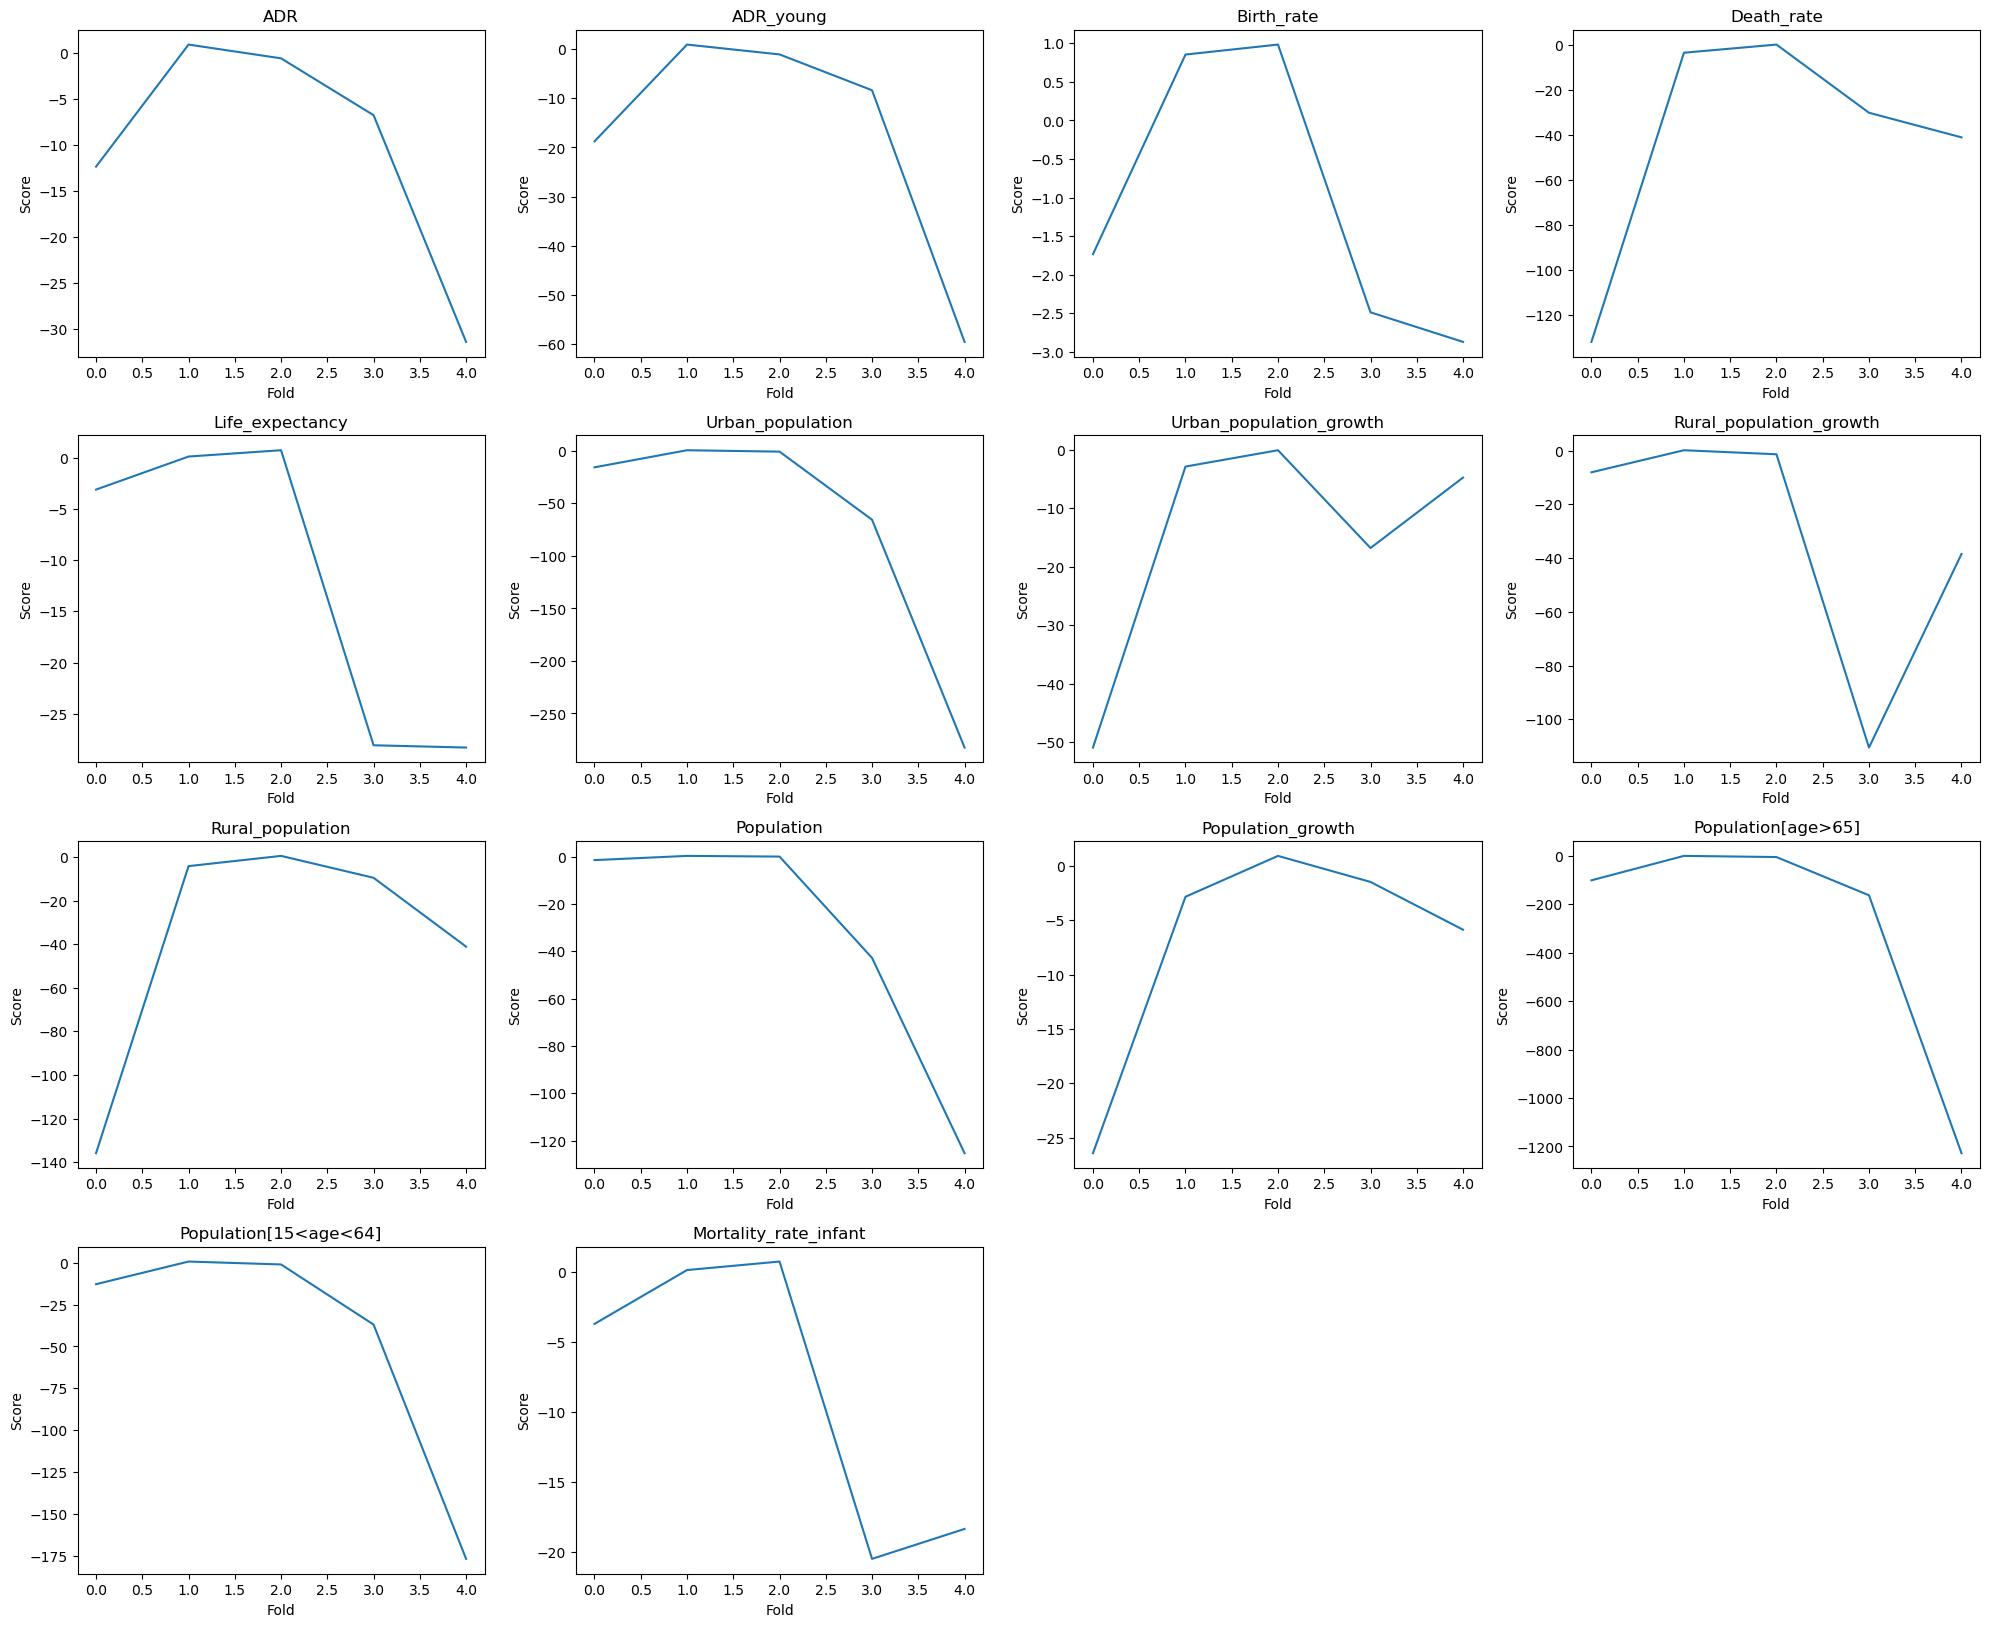

In [42]:
# visualisation de la cross-validation pour ridge regression
plt.figure(figsize=(20, 20))
for i, feature in enumerate(selected_features):
    X = df[feature].values.reshape(-1, 1)
    ridge = Ridge(alpha=0.1)
    scores = cross_val_score(ridge, X, y, cv=5)
    plt.subplot(5, 4, i+1)
    plt.plot(scores)
    plt.title(feature)
    plt.xlabel('Fold')
    plt.ylabel('Score')
plt.tight_layout()
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

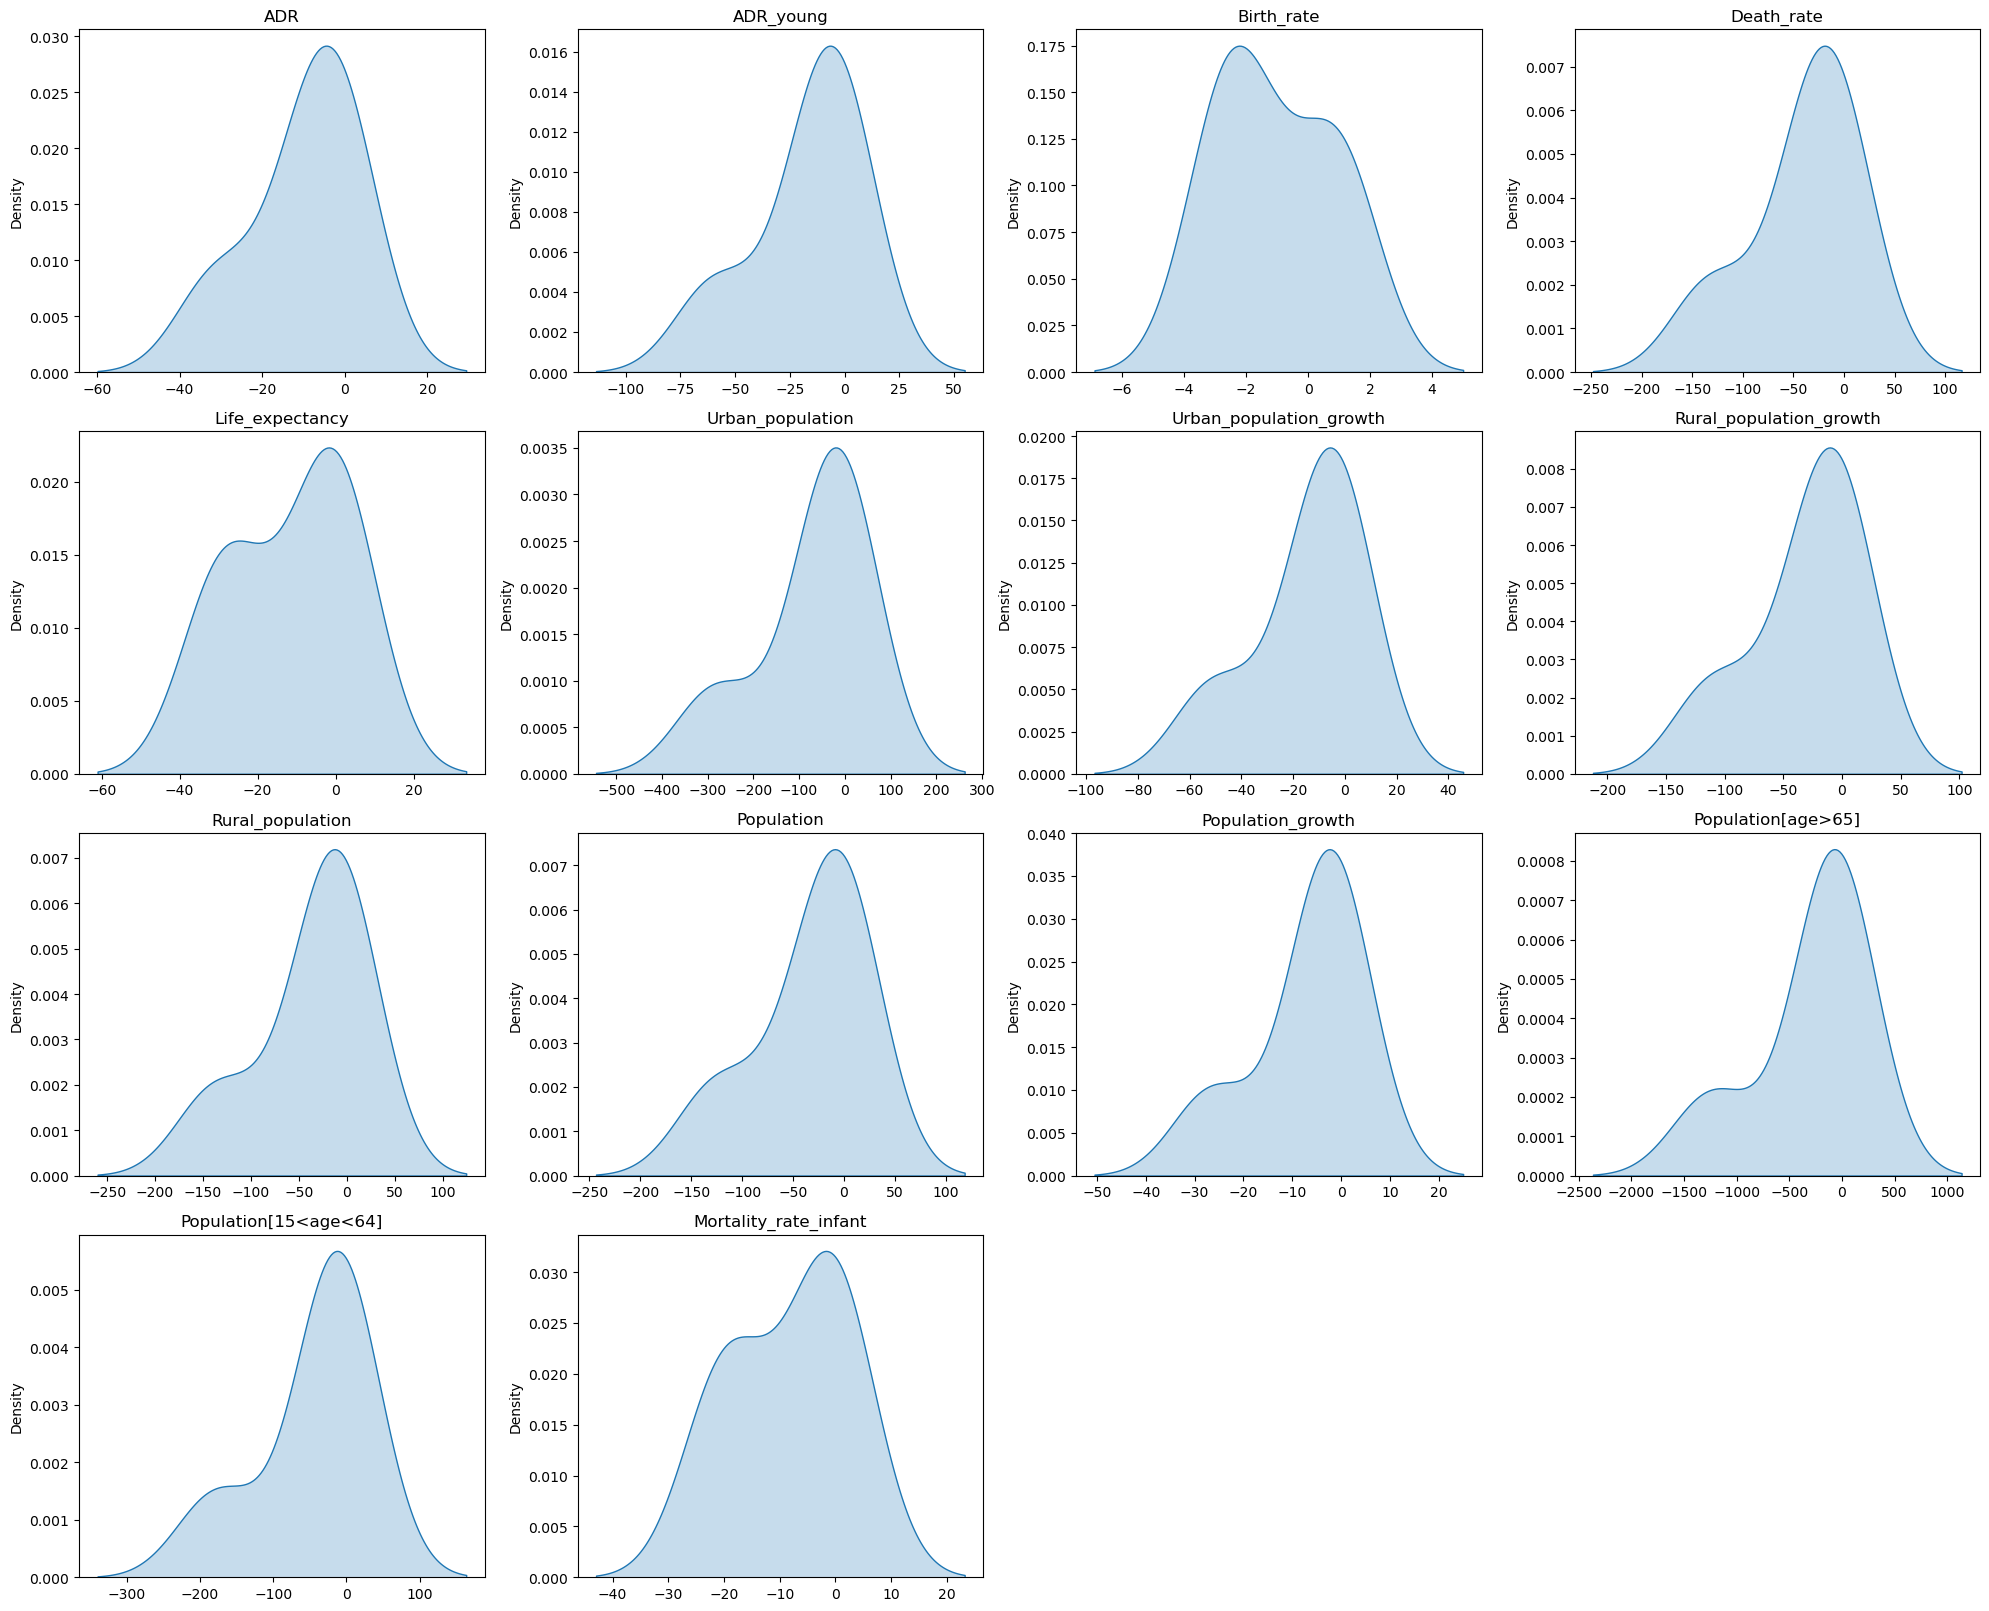

In [43]:
# avec kde plot
plt.figure(figsize=(20, 20))
for i, feature in enumerate(selected_features):
    X = df[feature].values.reshape(-1, 1)
    ridge = Ridge(alpha=0.1)
    scores = cross_val_score(ridge, X, y, cv=5)
    plt.subplot(5, 4, i+1)
    sns.kdeplot(scores, fill=True)
    plt.title(feature)
plt.tight_layout()
plt.show()


## RLM 

Les variables telles que le taux de natalité, la croissance de la population et l'espérance de vie semblent avoir une relation plus stable avec le taux de fertilité

In [44]:
# MULTIPLE LINEAR REGRESSION 

# Select the desired features : birth_rate , life_expectancy , population_growth  
X = df[['Birth_rate', 'Life_expectancy', 'Population_growth']]
y = df['Fertility_rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions using the testing data
y_pred = model.predict(X_test)

# Get the coefficients and intercept of the model
coeff = model.coef_
intercept = model.intercept_

# Calculate the mean squared error and R2 score of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results for the multiple linear regression model
print(f"Coefficients: {coeff}")
print(f"Intercept: {intercept}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")






Coefficients: [0.15900948 0.0134182  0.33425347]
Intercept: -2.1120412155839245
Mean Squared Error: 0.032888870217987434
R2 Score: 0.9913597346323106


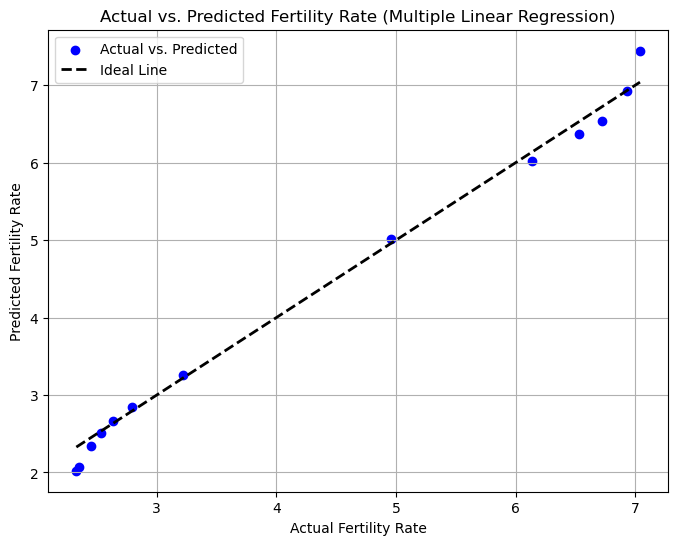

In [45]:
# Plot the scatterplot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Line')  # Plotting the ideal line
plt.xlabel('Actual Fertility Rate')
plt.ylabel('Predicted Fertility Rate')
plt.title('Actual vs. Predicted Fertility Rate (Multiple Linear Regression)')
plt.legend()
plt.grid(True)
plt.show()

Les résultats de cette régression linéaire multiple indiquent que les caractéristiques sélectionnées (taux de natalité, espérance de vie et croissance de la population) ont un fort pouvoir explicatif sur le taux de fertilité, comme en témoignent le faible MSE (erreur quadratique moyenne) et le R2 score élevé.

1. **Coefficients**:
   - Pour chaque augmentation d'une unité du taux de natalité, le taux de fertilité augmente d'environ 0.159.
   - Pour chaque augmentation d'une unité de l'espérance de vie, le taux de fertilité augmente d'environ 0.0134.
   - Pour chaque augmentation d'une unité de la croissance de la population, le taux de fertilité augmente d'environ 0.334.

2. **Intercept**:
   - L'intercept indique la valeur attendue du taux de fertilité lorsque toutes les caractéristiques sont nulles. Dans ce cas, il est d'environ -2.11.

3. **Mean Squared Error (MSE)**:
   - Le MSE mesure l'erreur moyenne des prédictions du modèle. Un MSE faible (0.03 dans ce cas) indique que les prédictions du modèle sont proches des valeurs réelles, ce qui suggère une bonne qualité de l'ajustement du modèle aux données.

4. **R2 Score**:
   - Le R2 score (0.99 dans ce cas) représente la proportion de variance dans la variable dépendante (taux de fertilité) qui est expliquée par les variables indépendantes (taux de natalité, espérance de vie, croissance de la population). Un R2 score proche de 1 indique un ajustement très précis du modèle aux données, ce qui est le cas ici.



## Random forest regressor

Le "Random Forest Regressor" est un modèle de régression utilisé en apprentissage automatique (machine learning). Il appartient à la famille des méthodes d'ensemble, qui combinent les prédictions de plusieurs modèles individuels pour produire une prédiction finale.

In [46]:
X = np.array(df[['Birth_rate', 'Life_expectancy', 'Population_growth']])
Y = df['Fertility_rate']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [47]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, Y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [48]:
test_data_prediction = regr.predict(X_test)

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, mean_squared_log_error

# Calcul de l'erreur absolue moyenne (MAE)
mae = mean_absolute_error(Y_test, test_data_prediction)

# Calcul de l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(Y_test, test_data_prediction)

# Calcul de la racine carrée de l'erreur quadratique moyenne (RMSE)
rmse = mean_squared_error(Y_test, test_data_prediction, squared=False)

# Calcul du coefficient de détermination (R²)
r_squared = r2_score(Y_test, test_data_prediction)

# Affichage des résultats
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r_squared)

MAE: 0.15988366246250463
MSE: 0.03983103885821608
RMSE: 0.19957715014053107
R²: 0.9842203135211276


In [50]:

# Assuming you have X (features) and y (target) data
X = np.array(df[['Birth_rate', 'Life_expectancy', 'Population_growth']])
y = df['Fertility_rate']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Create a RandomForestRegressor model
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)

# Make predictions on the test set
test_data_prediction = regr.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, test_data_prediction)
mse = mean_squared_error(y_test, test_data_prediction)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, test_data_prediction)

# Print individual metrics
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r_squared)

# Perform cross-validation (e.g., 5-fold cross-validation)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the mean squared error (MSE) from the cross-validation scores
mean_mse = np.mean(cv_scores)

# Convert negative MSE to positive RMSE
rmse_cv = np.sqrt(-mean_mse)

# Calculate other metrics
mae_cv = np.mean(np.abs(cv_scores))
r2_cv = np.mean(cross_val_score(rf_model, X, y, cv=5, scoring='r2'))

# Print cross-validated metrics
print(f"Cross-validated MAE: {mae_cv:.2f}")
print(f"Cross-validated MSE: {mean_mse:.2f}")
print(f"Cross-validated RMSE: {rmse_cv:.2f}")
print(f"Cross-validated R²: {r2_cv:.2f}")
print("Cross-validation scores (R-squared):", cv_scores)


MAE: 0.15988366246250463
MSE: 0.03983103885821608
RMSE: 0.19957715014053107
R²: 0.9842203135211276
Cross-validated MAE: 0.17
Cross-validated MSE: -0.17
Cross-validated RMSE: 0.41
Cross-validated R²: -2.15
Cross-validation scores (R-squared): [-0.34145097 -0.25209846 -0.24125283 -0.00555304 -0.01976585]


## XGBoost( XGRegressor)

   -XGRegressor est un algorithme d'apprentissage automatique qui utilise une approche en cascade pour créer un ensemble de modèles prédictifs, principalement des arbres de décision, afin de résoudre des problèmes de régression. Il optimise un objectif de perte spécifique, tel que la perte quadratique, en ajustant itérativement les modèles pour minimiser les erreurs de prédiction

In [51]:

modele = XGBRegressor(
    max_depth=3,
    learning_rate=0.1,
    n_estimators=100,
    objective='reg:squarederror'
)
modele.fit(X_train, Y_train)
# Fit the model to your training data
modele.fit(X_train, y_train)

# Now you can make predictions
test_data_prediction = modele.predict(X_test)

In [52]:
test_data_prediction = modele.predict(X_test)

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, mean_squared_log_error

# Calcul de l'erreur absolue moyenne (MAE)
mae = mean_absolute_error(Y_test, test_data_prediction)

# Calcul de l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(Y_test, test_data_prediction)

# Calcul de la racine carrée de l'erreur quadratique moyenne (RMSE)
rmse = mean_squared_error(Y_test, test_data_prediction, squared=False)

# Calcul du coefficient de détermination (R²)
r_squared = r2_score(Y_test, test_data_prediction)

# Affichage des résultats
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r_squared)

MAE: 0.08486364203232985
MSE: 0.013483327631425976
RMSE: 0.11611773177007022
R²: 0.9946583697333836


In [56]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Define your XGBoost model
modele = XGBRegressor(
    max_depth=3,
    learning_rate=0.1,
    n_estimators=100,
    objective='reg:squarederror'
)

# Perform cross-validation
cv_scores = cross_val_score(modele, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')

# Convert scores to positive as cross_val_score returns negative MSE
cv_scores = -cv_scores

# Calculate mean and standard deviation of cross-validation scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

# Print the results
print("Cross-Validation Mean MSE:", mean_cv_score)
print("Cross-Validation Standard Deviation of MSE:", std_cv_score)


Cross-Validation Mean MSE: 0.026314445044790274
Cross-Validation Standard Deviation of MSE: 0.014757361400134884


 **CONCLUSION:** En résumé, ces résultats suggèrent que le modèle XGBoost avec les caractéristiques sélectionnées (taux de natalité, espérance de vie, croissance de la population) est capable de bien expliquer la variance du taux de fertilité, avec un MSE faible et un R2 score élevé. Cela indique que ces caractéristiques sont des prédicteurs significatifs du taux de fertilité et qu'elles fournissent des informations précieuses pour comprendre et prédire ce phénomène.